<a href="https://colab.research.google.com/github/SungchulLee/colab/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###***Chapter 0 Installment Extra Packages***

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 927.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 16.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

###***Chapter 1 Tensor***

$$\begin{array}{lcc}
&\text{Numpy Array}&\text{Tensor}\\\hline
\text{Run on CPU}&✔&✔\\
\text{Run on GPU}&&✔\\
\text{Support Auto Differentiation}&&✔\\
\end{array}$$

###### Gentle Introduction of Tensors [beginner_source/nlp/pytorch_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/nlp/pytorch_tutorial.py)

In [ ]:
# Code Source
# https://github.com/pytorch/tutorials/blob/main/beginner_source/nlp/pytorch_tutorial.py
"""
Introduction to PyTorch
***********************

Introduction to Torch's tensor library
======================================

All of deep learning is computations on tensors, which are
generalizations of a matrix that can be indexed in more than 2 dimensions. 
We will see exactly what this means in-depth later. 
First, let's look what we can do with tensors.
"""
# Author: Robert Guthrie

import torch

torch.manual_seed(1)

################################################################################
# Creating Tensors
#
# Tensors can be created from Python lists with the torch.tensor()
# function.
################################################################################

# torch.tensor(data) creates a torch.Tensor object with the given data.
V_data = [1., 2., 3.]
V = torch.tensor(V_data)
print(V)

# Creates a matrix
M_data = [[1., 2., 3.], [4., 5., 6]]
M = torch.tensor(M_data)
print(M)

# Create a 3D tensor of size 2x2x2.
T_data = [[[1., 2.], [3., 4.]],
          [[5., 6.], [7., 8.]]]
T = torch.tensor(T_data)
print(T)

################################################################################
# What is a 3D tensor anyway? 
# Think about it like this. 
# If you have a vector, indexing into the vector gives you a scalar. 
# If you have a matrix, indexing into the matrix gives you a vector. 
# If you have a 3D tensor, then indexing into the tensor gives you a matrix!
#
# A note on terminology:
# when I say "tensor" in this tutorial, 
# it refers to any torch.Tensor object. 
# Matrices and vectors are special cases of torch.Tensors, 
# where their dimension is 2 and 1 respectively. 
# When I am talking about 3D tensors, 
# I will explicitly use the term "3D tensor".
################################################################################

# Index into V and get a scalar (0 dimensional tensor)
print(V[0])
# Get a Python number from it
print(V[0].item())

# Index into M and get a vector
print(M[0])

# Index into T and get a matrix
print(T[0])

################################################################################
# You can also create tensors of other data types. 
# To create a tensor of integer types, try torch.tensor([[1, 2], [3, 4]]) 
# (where all elements in the list are integers).
# You can also specify a data type by passing in ``dtype=torch.data_type``.
# Check the documentation for more data types, but
# Float and Long will be the most common.
################################################################################

################################################################################
# You can create a tensor with random data and 
# the supplied dimensionality with torch.randn()
################################################################################

x = torch.randn((3, 4, 5))
print(x)

################################################################################
# Operations with Tensors
#
# You can operate on tensors in the ways you would expect.
################################################################################

x = torch.tensor([1., 2., 3.])
y = torch.tensor([4., 5., 6.])
z = x + y
print(z)

################################################################################
# See `the documentation <https://pytorch.org/docs/torch.html>` 
# for a complete list of the massive number of operations available to you. 
# They expand beyond just mathematical operations.
#
# One helpful operation that we will make use of later is concatenation.
################################################################################

# By default, it concatenates along the first axis (concatenates rows)
x_1 = torch.randn(2, 5)
y_1 = torch.randn(3, 5)
z_1 = torch.cat([x_1, y_1])
print(z_1)

# Concatenate columns:
x_2 = torch.randn(2, 3)
y_2 = torch.randn(2, 5)
# second arg specifies which axis to concat along
z_2 = torch.cat([x_2, y_2], 1)
print(z_2)

# If your tensors are not compatible, torch will complain.
# Uncomment to see the error
# torch.cat([x_1, x_2])

################################################################################
# Reshaping Tensors
#
# Use the .view() method to reshape a tensor. 
# This method receives heavy use, because  
# many neural network components expect their inputs to have a certain shape. 
# Often you will need to reshape before passing your data to the component.
################################################################################

x = torch.randn(2, 3, 4)
print(x)
print(x.view(2, 12))  # Reshape to 2 rows, 12 columns
# Same as above.  If one of the dimensions is -1, its size can be inferred
print(x.view(2, -1))

################################################################################
# Computation Graphs and Automatic Differentiation
#
# The concept of a computation graph is essential 
# to efficient deep learning programming, because  
# it allows you to not have to write the back propagation gradients yourself. 
# A computation graph is simply a specification of 
# how your data is combined to give you the output. 
# Since the graph totally specifies what parameters were involved 
# with which operations, 
# it contains enough information to compute derivatives. 
# This probably sounds vague, 
# so let's see what is going on using the fundamental flag ``requires_grad``.
#
# First, think from a programmers perspective. 
# What is stored in the torch.Tensor objects we were creating above? 
# Obviously the data and the shape, and maybe a few other things. 
# But when we added two tensors together, we got an output tensor. 
# All this output tensor knows is its data and shape. 
# It has no idea that it was the sum of two other tensors
# (it could have been read in from a file, 
# it could be the result of some other operation, etc.)
#
# If ``requires_grad=True``, 
# the Tensor object keeps track of how it was created. 
# Let's see it in action.
################################################################################

# Tensor factory methods have a ``requires_grad`` flag
x = torch.tensor([1., 2., 3], requires_grad=True)

# With requires_grad=True, you can still do all the operations you previously
# could
y = torch.tensor([4., 5., 6], requires_grad=True)
z = x + y
print(z)

# BUT z knows something extra.
print(z.grad_fn)

################################################################################
# So Tensors know what created them. 
# z knows that it wasn't read in from a file, 
# it wasn't the result of a multiplication or exponential or whatever. 
# And if you keep following z.grad_fn, you will find yourself at x and y.
#
# But how does that help us compute a gradient?
################################################################################

# Let's sum up all the entries in z
s = z.sum()
print(s)
print(s.grad_fn)

################################################################################
# So now, what is the derivative of this sum 
# with respect to the first component of x? 
# In math, we want
#
# .. math::
#
#    \frac{\partial s}{\partial x_0}
#
# Well, s knows that it was created as a sum of the tensor z. 
# z knows that it was the sum x + y. So
#
# .. math::  s = \overbrace{x_0 + y_0}^\text{$z_0$} + \overbrace{x_1 + y_1}^\text{$z_1$} + \overbrace{x_2 + y_2}^\text{$z_2$}
#
# And so s contains enough information 
# to determine that the derivative we want is 1!
#
# Of course this glosses over the challenge of 
# how to actually compute that derivative. 
# The point here is that s is carrying along enough information that 
# it is possible to compute it. 
# In reality, the developers of Pytorch program the sum() and + operations to  
# know how to compute their gradients, and run the back propagation algorithm. 
# An in-depth discussion of that algorithm is beyond the scope of this tutorial.
################################################################################

################################################################################
# Let's have Pytorch compute the gradient, and see that we were right:
# (note if you run this block multiple times, the gradient will increment.
# That is because Pytorch *accumulates* the gradient into the .grad property, 
# since for many models this is very convenient.)
################################################################################

# calling .backward() on any variable will run backprop, starting from it.
s.backward()
print(x.grad)

################################################################################
# Understanding what is going on in the block below is crucial 
# for being a successful programmer in deep learning.
################################################################################

x = torch.randn(2, 2)
y = torch.randn(2, 2)
# By default, user created Tensors have ``requires_grad=False``
print(x.requires_grad, y.requires_grad)
z = x + y
# So you can't backprop through z
print(z.grad_fn)

# ``.requires_grad_( ... )`` changes an existing Tensor's ``requires_grad``
# flag in-place. The input flag defaults to ``True`` if not given.
x = x.requires_grad_()
y = y.requires_grad_()
# z contains enough information to compute gradients, as we saw above
z = x + y
print(z.grad_fn)
# If any input to an operation has ``requires_grad=True``, so will the output
print(z.requires_grad)

# Now z has the computation history that relates itself to x and y
# Can we just take its values, and **detach** it from its history?
new_z = z.detach()

# ... does new_z have information to backprop to x and y?
# NO!
print(new_z.grad_fn)
# And how could it? ``z.detach()`` returns a tensor that shares the same storage
# as ``z``, but with the computation history forgotten. It doesn't know anything
# about how it was computed.
# In essence, we have broken the Tensor away from its past history

################################################################################
# You can also stop autograd 
# from tracking history on Tensors with ``.requires_grad=True`` 
# by wrapping the code block in ``with torch.no_grad():``
################################################################################

print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
	print((x ** 2).requires_grad)

###### Tensors work like Numpy Array [beginner_source/introyt/tensors_deeper_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/introyt/tensors_deeper_tutorial.py) [english](https://www.youtube.com/watch?v=r7QDUPb2dCM)

In [ ]:
# Code Source
# https://github.com/pytorch/tutorials/blob/main/beginner_source/introyt/tensors_deeper_tutorial.py
"""
Introduction to PyTorch Tensors
===============================

Follow along with the video below or on 
`youtube <https://www.youtube.com/watch?v=r7QDUPb2dCM>`.

Tensors are the central data abstraction in PyTorch. 
This interactive notebook provides 
an in-depth introduction to the ``torch.Tensor`` class.

First things first, let’s import the PyTorch module. 
We’ll also add Python’s math module to facilitate some of the examples.
"""

import torch
import math

################################################################################
# Creating Tensors
# 
# The simplest way to create a tensor is with the ``torch.empty()`` call:
################################################################################ 

x = torch.empty(3, 4)
print(type(x))
print(x)

################################################################################
# Let’s unpack what we just did:
# 
# -  We created a tensor using one of the numerous factory methods
#    attached to the ``torch`` module.
# -  The tensor itself is 2-dimensional, having 3 rows and 4 columns.
# -  The type of the object returned is ``torch.Tensor``, 
#    which is an alias for ``torch.FloatTensor``; 
#    by default, PyTorch tensors are populated 
#    with 32-bit floating point numbers. (More on data types below.)
# -  You will probably see some random-looking values 
#    when printing your tensor. 
#    The ``torch.empty()`` call allocates memory for the tensor, 
#    but does not initialize it with any values - so what you’re seeing is
#    whatever was in memory at the time of allocation.
# 
# A brief note about tensors and their number of dimensions, and terminology:
# 
# -  You will sometimes see a 1-dimensional tensor called a *vector.* 
# -  Likewise, a 2-dimensional tensor is often referred to as a *matrix.* 
# -  Anything with more than two dimensions is generally just called a tensor.
# 
# More often than not, you’ll want to initialize your tensor with some value. 
# Common cases are all zeros, all ones, or random values, and the
# ``torch`` module provides factory methods for all of these:
################################################################################ 

zeros = torch.zeros(2, 3)
print(zeros)

ones = torch.ones(2, 3)
print(ones)

torch.manual_seed(1729)
random = torch.rand(2, 3)
print(random)

################################################################################
# The factory methods all do just what you’d expect - we have a tensor
# full of zeros, another full of ones, and another with random values
# between 0 and 1.
################################################################################

################################################################################
# Random Tensors and Seeding
# 
# Speaking of the random tensor, did you notice the call to
# ``torch.manual_seed()`` immediately preceding it? 
# Initializing tensors, such as a model’s learning weights, 
# with random values is common but there are times - 
# especially in research settings - where you’ll want
# some assurance of the reproducibility of your results. 
# Manually setting your random number generator’s seed is the way to do this. 
# Let’s look more closely:
################################################################################

torch.manual_seed(1729)
random1 = torch.rand(2, 3)
print(random1)

random2 = torch.rand(2, 3)
print(random2)

torch.manual_seed(1729)
random3 = torch.rand(2, 3)
print(random3)

random4 = torch.rand(2, 3)
print(random4)

################################################################################
# What you should see above is that 
# ``random1`` and ``random3`` carry identical values, 
# as do ``random2`` and ``random4``. 
# Manually setting the RNG’s seed resets it, 
# so that identical computations depending on
# random number should, in most settings, provide identical results.
# 
# For more information, see the `PyTorch documentation on
# reproducibility <https://pytorch.org/docs/stable/notes/randomness.html>`.
################################################################################

################################################################################
# Tensor Shapes
# 
# Often, when you’re performing operations on two or more tensors, 
# they will need to be of the same *shape* - that is, 
# having the same number of
# dimensions and the same number of cells in each dimension. 
# For that, we have the ``torch.*_like()`` methods:
################################################################################

x = torch.empty(2, 2, 3)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

################################################################################
# The first new thing in the code cell above is 
# the use of the ``.shape`` property on a tensor. 
# This property contains a list of the extent of each dimension of a tensor - 
# in our case, ``x`` is a three-dimensional tensor with shape 2 x 2 x 3.
# 
# Below that, we call the ``.empty_like()``, ``.zeros_like()``,
# ``.ones_like()``, and ``.rand_like()`` methods. 
# Using the ``.shape`` property, 
# we can verify that each of these methods returns a tensor of
# identical dimensionality and extent.
# 
# The last way to create a tensor that will cover is to specify its data
# directly from a PyTorch collection:
################################################################################

some_constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(some_constants)

some_integers = torch.tensor((2, 3, 5, 7, 11, 13, 17, 19))
print(some_integers)

more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))
print(more_integers)

################################################################################
# Using ``torch.tensor()`` is the most straightforward way 
# to create a tensor if you already have data in a Python tuple or list. 
# As shown above, nesting the collections will result in 
# a multi-dimensional tensor.
# 
# .. note::
#      ``torch.tensor()`` creates a copy of the data.
################################################################################

################################################################################
# Tensor Data Types
# 
# Setting the datatype of a tensor is possible a couple of ways:
################################################################################

a = torch.ones((2, 3), dtype=torch.int16)
print(a)

b = torch.rand((2, 3), dtype=torch.float64) * 20.
print(b)

c = b.to(torch.int32)
print(c)

################################################################################
# The simplest way to set the underlying data type of a tensor is 
# with an optional argument at creation time. 
# In the first line of the cell above,
# we set ``dtype=torch.int16`` for the tensor ``a``. 
# When we print ``a``,
# we can see that it’s full of ``1`` rather than ``1.`` 
# - Python’s subtle cue that this is an integer type rather than floating point.
# 
# Another thing to notice about printing ``a`` is that, 
# unlike when we left ``dtype`` as the default (32-bit floating point), 
# printing the tensor also specifies its ``dtype``.
# 
# You may have also spotted that 
# we went from specifying the tensor’s shape as a series of integer arguments, 
# to grouping those arguments in a tuple. 
# This is not strictly necessary - 
# PyTorch will take a series of 
# initial, unlabeled integer arguments as a tensor shape - 
# but when adding the optional arguments, it can make your intent more readable.
# 
# The other way to set the datatype is with the ``.to()`` method. 
# In the cell above, we create a random floating point tensor ``b`` 
# in the usual way. 
# Following that, we create ``c`` by converting ``b`` to a 32-bit
# integer with the ``.to()`` method. 
# Note that ``c`` contains all the same values as ``b``, 
# but truncated to integers.
# 
# Available data types include:
# 
# -  ``torch.bool``
# -  ``torch.int8``
# -  ``torch.uint8``
# -  ``torch.int16``
# -  ``torch.int32``
# -  ``torch.int64``
# -  ``torch.half``
# -  ``torch.float``
# -  ``torch.double``
# -  ``torch.bfloat``
################################################################################

################################################################################
# Math & Logic with PyTorch Tensors
# 
# Now that you know some of the ways to create a tensor… 
# what can you do with them?
# 
# Let’s look at basic arithmetic first, and 
# how tensors interact with simple scalars:
################################################################################

ones = torch.zeros(2, 2) + 1
twos = torch.ones(2, 2) * 2
threes = (torch.ones(2, 2) * 7 - 1) / 2
fours = twos ** 2
sqrt2s = twos ** 0.5

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)

################################################################################
# As you can see above, 
# arithmetic operations between tensors and scalars,
# such as addition, subtraction, multiplication, division, and
# exponentiation are distributed over every element of the tensor. 
# Because the output of such an operation will be a tensor, 
# you can chain them together with the usual operator precedence rules, 
# as in the line where we create ``threes``.
# 
# Similar operations between two tensors also behave 
# like you’d intuitively expect:
################################################################################

powers2 = twos ** torch.tensor([[1, 2], [3, 4]])
print(powers2)

fives = ones + fours
print(fives)

dozens = threes * fours
print(dozens)

################################################################################
# It’s important to note here that 
# all of the tensors in the previous code cell were of identical shape. 
# What happens when we try to perform a
# binary operation on tensors if dissimilar shape?
# 
# .. note::
#      The following cell throws a run-time error. This is intentional.
#
#    a = torch.rand(2, 3)
#    b = torch.rand(3, 2)
#
#    print(a * b)
################################################################################

################################################################################
# In the general case, 
# you cannot operate on tensors of different shape this way, 
# even in a case like the cell above, 
# where the tensors have an identical number of elements.
################################################################################

################################################################################
# In Brief: Tensor Broadcasting
# 
# .. note::
#      If you are familiar with broadcasting semantics in NumPy ndarrays, 
#      you’ll find the same rules apply here.
# 
# The exception to the same-shapes rule is *tensor broadcasting.* 
# Here’s an example:
################################################################################

rand = torch.rand(2, 4)
doubled = rand * (torch.ones(1, 4) * 2)

print(rand)
print(doubled)

################################################################################
# What’s the trick here? 
# How is it we got to multiply a 2x4 tensor by a 1x4 tensor?
# 
# Broadcasting is a way to perform an operation 
# between tensors that have similarities in their shapes. 
# In the example above, the one-row, four-column tensor 
# is multiplied by *both rows* of the two-row, four-column tensor.
# 
# This is an important operation in Deep Learning. 
# The common example is 
# multiplying a tensor of learning weights by a *batch* of input tensors,
# applying the operation to each instance in the batch separately, and
# returning a tensor of identical shape - 
# just like our (2, 4) \* (1, 4) example above returned 
# a tensor of shape (2, 4).
# 
# The rules for broadcasting are:
# 
# -  Each tensor must have at least one dimension - no empty tensors.
# 
# -  Comparing the dimension sizes of the two tensors, 
#    *going from last to first:*
# 
#    -  Each dimension must be equal, *or*
# 
#    -  One of the dimensions must be of size 1, *or*
# 
#    -  The dimension does not exist in one of the tensors
# 
# Tensors of identical shape, of course, are trivially “broadcastable”, 
# as you saw earlier.
# 
# Here are some examples of situations that 
# honor the above rules and allow broadcasting:
################################################################################ 

a =     torch.ones(4, 3, 2)

b = a * torch.rand(   3, 2) # 3rd & 2nd dims identical to a, dim 1 absent
print(b)

c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a
print(c)

d = a * torch.rand(   1, 2) # 3rd dim identical to a, 2nd dim = 1
print(d)

################################################################################
# Look closely at the values of each tensor above: 
#
# -  The multiplication operation that created ``b`` was 
#    broadcast over every “layer” of ``a``.
# -  For ``c``, 
#    the operation was broadcast over ever layer and row of ``a`` - 
#    every 3-element column is identical. 
# -  For ``d``, we switched it around - now every *row* is identical,
#    across layers and columns.
# 
# For more information on broadcasting, see the `PyTorch documentation 
# <https://pytorch.org/docs/stable/notes/broadcasting.html>`
# on the topic.
# 
# Here are some examples of attempts at broadcasting that will fail:
# 
# .. note::
#       The following cell throws a run-time error. This is intentional.
#
#    a =     torch.ones(4, 3, 2)
#
#    b = a * torch.rand(4, 3)    # dimensions must match last-to-first
#
#    c = a * torch.rand(   2, 3) # both 3rd & 2nd dims different
#
#    d = a * torch.rand((0, ))   # can't broadcast with an empty tensor
################################################################################

################################################################################
# More Math with Tensors
# 
# PyTorch tensors have over three hundred operations 
# that can be performed on them.
# 
# Here is a small sample from some of the major categories of operations:
################################################################################

# common functions
a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

# trigonometric functions and their inverses
angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print(angles)
print(sines)
print(inverses)

# bitwise operations
print('\nBitwise XOR:')
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))

# comparisons:
print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)  # many comparison ops support broadcasting!
print(torch.eq(d, e)) # returns a tensor of type bool

# reductions:
print('\nReduction ops:')
print(torch.max(d))        # returns a single-element tensor
print(torch.max(d).item()) # extracts the value from the returned tensor
print(torch.mean(d))       # average
print(torch.std(d))        # standard deviation
print(torch.prod(d))       # product of all numbers
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2]))) # filter unique elements

# vector and linear algebra operations
v1 = torch.tensor([1., 0., 0.])         # x unit vector
v2 = torch.tensor([0., 1., 0.])         # y unit vector
m1 = torch.rand(2, 2)                   # random matrix
m2 = torch.tensor([[3., 0.], [0., 3.]]) # three times identity matrix

print('\nVectors & Matrices:')
print(torch.cross(v2, v1)) # negative of z unit vector (v1 x v2 == -v2 x v1)
print(m1)
m3 = torch.matmul(m1, m2)
print(m3)                  # 3 times m1
print(torch.svd(m3))       # singular value decomposition

################################################################################
# This is a small sample of operations. 
# For more details and the full inventory of math functions, have a look at the
# `documentation <https://pytorch.org/docs/stable/torch.html#math-operations>`.
################################################################################

################################################################################
# Altering Tensors in Place
# 
# Most binary operations on tensors will return a third, new tensor. 
# When we say ``c = a * b`` (where ``a`` and ``b`` are tensors), 
# the new tensor ``c`` will occupy a region of memory distinct 
# from the other tensors.
# 
# There are times, though, that you may wish to alter a tensor in place -
# for example, if you’re doing an element-wise computation 
# where you can discard intermediate values. 
# For this, most of the math functions have a version 
# with an appended underscore (``_``) that will alter a tensor in place.
# 
# For example:
################################################################################

a = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('a:')
print(a)
print(torch.sin(a))   # this operation creates a new tensor in memory
print(a)              # a has not changed

b = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('\nb:')
print(b)
print(torch.sin_(b))  # note the underscore
print(b)              # b has changed

################################################################################
# For arithmetic operations, there are functions that behave similarly:
################################################################################

a = torch.ones(2, 2)
b = torch.rand(2, 2)

print('Before:')
print(a)
print(b)
print('\nAfter adding:')
print(a.add_(b))
print(a)
print(b)
print('\nAfter multiplying')
print(b.mul_(b))
print(b)

################################################################################
# Note that these in-place arithmetic functions are methods 
# on the ``torch.Tensor`` object, 
# not attached to the ``torch`` module 
# like many other functions (e.g., ``torch.sin()``). 
# As you can see from ``a.add_(b)``, 
# *the calling tensor is the one that gets changed in place.*
# 
# There is another option for placing the result of a computation 
# in an existing, allocated tensor. 
# Many of the methods and functions we’ve seen so far - 
# including creation methods! - 
# have an ``out`` argument that lets you specify a tensor to receive the output. 
# If the ``out`` tensor is the correct shape and ``dtype``, 
# this can happen without a new memory allocation:
################################################################################

a = torch.rand(2, 2)
b = torch.rand(2, 2)
c = torch.zeros(2, 2)
old_id = id(c)

print(c)
d = torch.matmul(a, b, out=c)
print(c)                # contents of c have changed

assert c is d           # test c & d are same object, not just containing equal values
assert id(c), old_id    # make sure that our new c is the same object as the old one

torch.rand(2, 2, out=c) # works for creation too!
print(c)                # c has changed again
assert id(c), old_id    # still the same object!

################################################################################
# Copying Tensors
# 
# As with any object in Python, 
# assigning a tensor to a variable makes the variable a *label* of the tensor, 
# and does not copy it. 
# For example:
################################################################################

a = torch.ones(2, 2)
b = a

a[0][1] = 561  # we change a...
print(b)       # ...and b is also altered

################################################################################
# But what if you want a separate copy of the data to work on? 
# The ``clone()`` method is there for you:
################################################################################

a = torch.ones(2, 2)
b = a.clone()

assert b is not a      # different objects in memory...
print(torch.eq(a, b))  # ...but still with the same contents!

a[0][1] = 561          # a changes...
print(b)               # ...but b is still all ones

################################################################################
# **There is an important thing to be aware of when using ``clone()``.**
# If your source tensor has autograd, enabled then so will the clone.
# **This will be covered more deeply in the video on autograd,** 
# but if you want the light version of the details, continue on.
# 
# *In many cases, this will be what you want.* 
# For example, if your model
# has multiple computation paths in its ``forward()`` method, 
# and *both* the original tensor and its clone contribute to the model’s output, 
# then to enable model learning you want autograd turned on for both tensors.
# If your source tensor has autograd enabled 
# (which it generally will if
# it’s a set of learning weights or derived from a computation involving
# the weights), 
# then you’ll get the result you want.
# 
# On the other hand, if you’re doing a computation where *neither* the
# original tensor nor its clone need to track gradients, then as long as
# the source tensor has autograd turned off, you’re good to go.
# 
# *There is a third case,* though: 
# Imagine you’re performing a computation
# in your model’s ``forward()`` function, 
# where gradients are turned on
# for everything by default, but you want to pull out some values
# mid-stream to generate some metrics. 
# In this case, you *don’t* want the cloned copy of your source tensor 
# to track gradients - 
# performance is improved with autograd’s history tracking turned off. 
# For this, you can use the ``.detach()`` method on the source tensor:
################################################################################

a = torch.rand(2, 2, requires_grad=True) # turn on autograd
print(a)

b = a.clone()
print(b)

c = a.detach().clone()
print(c)

print(a)

################################################################################
# What’s happening here?
# 
# -  We create ``a`` with ``requires_grad=True`` turned on. 
#    **We haven’t covered this optional argument yet, 
#    but will during the unit on autograd.**
# -  When we print ``a``, 
#    it informs us that the property ``requires_grad=True`` - 
#    this means that autograd and computation history tracking are turned on.
# -  We clone ``a`` and label it ``b``. 
#    When we print ``b``, 
#    we can see that it’s tracking its computation history - 
#    it has inherited ``a``\ ’s autograd settings, 
#    and added to the computation history.
# -  We clone ``a`` into ``c``, but we call ``detach()`` first.
# -  Printing ``c``, 
#    we see no computation history, and no ``requires_grad=True``.
# 
# The ``detach()`` method *detaches the tensor from its computation history.* 
# It says, “do whatever comes next as if autograd was off.” 
# It does this *without* changing ``a`` - 
# you can see that when we print ``a`` again at the end, 
# it retains its ``requires_grad=True`` property.
################################################################################

################################################################################
# Moving to GPU
# 
# One of the major advantages of PyTorch is its robust acceleration on
# CUDA-compatible Nvidia GPUs. 
# (“CUDA” stands for *Compute Unified Device
# Architecture*, which is Nvidia’s platform for parallel computing.) 
# So far, everything we’ve done has been on CPU. 
# How do we move to the faster hardware?
# 
# First, we should check whether a GPU is available, 
# with the ``is_available()`` method.
# 
# .. note::
#      If you do not have a CUDA-compatible GPU and CUDA drivers installed, 
#      the executable cells in this section will not execute 
#      any GPU-related code.
################################################################################ 

if torch.cuda.is_available():
    print('We have a GPU!')
else:
    print('Sorry, CPU only.')

################################################################################
# Once we’ve determined that one or more GPUs is available, 
# we need to put our data someplace where the GPU can see it. 
# Your CPU does computation on data in your computer’s RAM. 
# Your GPU has dedicated memory attached to it. 
# Whenever you want to perform a computation on a device, 
# you must move *all* the data needed for that computation 
# to memory accessible by that device. 
# (Colloquially, “moving the data to memory accessible by the
# GPU” is shorted to, “moving the data to the GPU”.)
# 
# There are multiple ways to get your data onto your target device. 
# You may do it at creation time:
################################################################################

if torch.cuda.is_available():
    gpu_rand = torch.rand(2, 2, device='cuda')
    print(gpu_rand)
else:
    print('Sorry, CPU only.')

################################################################################
# By default, new tensors are created on the CPU, 
# so we have to specify when we want to create our tensor on the GPU 
# with the optional ``device`` argument. 
# You can see when we print the new tensor, 
# PyTorch informs us which device it’s on (if it’s not on CPU).
# 
# You can query the number of GPUs with ``torch.cuda.device_count()``. 
# If you have more than one GPU, you can specify them by index:
# ``device='cuda:0'``, ``device='cuda:1'``, etc.
# 
# As a coding practice, 
# specifying our devices everywhere with string constants is pretty fragile. 
# In an ideal world, your code would perform
# robustly whether you’re on CPU or GPU hardware. 
# You can do this by creating a device handle 
# that can be passed to your tensors instead of a string:
################################################################################ 

if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')
print('Device: {}'.format(my_device))

x = torch.rand(2, 2, device=my_device)
print(x)

################################################################################
# If you have an existing tensor living on one device, 
# you can move it to another with the ``to()`` method. 
# The following line of code creates a tensor on CPU, 
# and moves it to whichever device handle you acquired in the previous cell.
################################################################################

y = torch.rand(2, 2)
y = y.to(my_device)

################################################################################
# It is important to know that 
# in order to do computation involving two or more tensors, 
# *all of the tensors must be on the same device*. 
# The following code will throw a runtime error, 
# regardless of whether you have a GPU device available:
# 
#    x = torch.rand(2, 2)
#    y = torch.rand(2, 2, device='gpu')
#    z = x + y  # exception will be thrown
################################################################################ 

################################################################################
# Manipulating Tensor Shapes
# 
# Sometimes, you’ll need to change the shape of your tensor. 
# Below, we’ll look at a few common cases, and how to handle them.
################################################################################

################################################################################
# Changing the Number of Dimensions
# 
# One case where you might need to change the number of dimensions is
# passing a single instance of input to your model. 
# PyTorch models generally expect *batches* of input.
# 
# For example, imagine having a model that works on 3 x 226 x 226 images -
# a 226-pixel square with 3 color channels. 
# When you load and transform it, 
# you’ll get a tensor of shape ``(3, 226, 226)``. 
# Your model, though, is expecting input of shape ``(N, 3, 226, 226)``, 
# where ``N`` is the number of images in the batch. 
# So how do you make a batch of one?
################################################################################ 

a = torch.rand(3, 226, 226)
b = a.unsqueeze(0)

print(a.shape)
print(b.shape)

################################################################################
# The ``unsqueeze()`` method adds a dimension of extent 1.
# ``unsqueeze(0)`` adds it as a new zeroth dimension - 
# now you have a batch of one!
# 
# So if that’s *un*\ squeezing? 
# What do we mean by squeezing? 
# We’re taking
# advantage of the fact that any dimension of extent 1 *does not* change
# the number of elements in the tensor.
################################################################################

c = torch.rand(1, 1, 1, 1, 1)
print(c)

################################################################################
# Continuing the example above, 
# let’s say the model’s output is a 20-element vector for each input. 
# You would then expect the output to have shape ``(N, 20)``, 
# where ``N`` is the number of instances in the input batch. 
# That means that for our single-input batch, 
# we’ll get an output of shape ``(1, 20)``.
# 
# What if you want to do some *non-batched* computation with that output -
# something that’s just expecting a 20-element vector?
################################################################################

a = torch.rand(1, 20)
print(a.shape)
print(a)

b = a.squeeze(0)
print(b.shape)
print(b)

c = torch.rand(2, 2)
print(c.shape)

d = c.squeeze(0)
print(d.shape)

################################################################################
# You can see from the shapes that 
# our 2-dimensional tensor is now 1-dimensional, 
# and if you look closely at the output of the cell above
# you’ll see that printing ``a`` shows an “extra” set of square brackets
# ``[]`` due to having an extra dimension.
# 
# You may only ``squeeze()`` dimensions of extent 1. 
# See above where we try to squeeze a dimension of size 2 in ``c``, 
# and get back the same shape we started with. 
# Calls to ``squeeze()`` and ``unsqueeze()`` can
# only act on dimensions of extent 1 
# because to do otherwise would change the number of elements in the tensor.
# 
# Another place you might use ``unsqueeze()`` is to ease broadcasting.
# Recall the example above where we had the following code:
# 
#    a =     torch.ones(4, 3, 2)
# 
#    c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a
#    print(c)
# 
# The net effect of that was 
# to broadcast the operation over dimensions 0 and 2, 
# causing the random, 3 x 1 tensor to be multiplied 
# element-wise by every 3-element column in ``a``.
# 
# What if the random vector had just been 3-element vector? 
# We’d lose the ability to do the broadcast, 
# because the final dimensions would not 
# match up according to the broadcasting rules. 
# ``unsqueeze()`` comes to the rescue:
################################################################################

a = torch.ones(4, 3, 2)
b = torch.rand(   3)     # trying to multiply a * b will give a runtime error
c = b.unsqueeze(1)       # change to a 2-dimensional tensor, adding new dim at the end
print(c.shape)
print(a * c)             # broadcasting works again!

################################################################################
# The ``squeeze()`` and ``unsqueeze()`` methods also have in-place versions, 
# ``squeeze_()`` and ``unsqueeze_()``:
################################################################################

batch_me = torch.rand(3, 226, 226)
print(batch_me.shape)
batch_me.unsqueeze_(0)
print(batch_me.shape)

################################################################################
# Sometimes you’ll want to change the shape of a tensor more radically,
# while still preserving the number of elements and their contents. 
# One case where this happens is at the interface 
# between a convolutional layer of a model and a linear layer of the model - 
# this is common in image classification models. 
# A convolution kernel will yield an output tensor 
# of shape *features x width x height,* 
# but the following linear layer expects a 1-dimensional input. 
# ``reshape()`` will do this for you,
# provided that the dimensions you request yield 
# the same number of elements as the input tensor has:
################################################################################ 

output3d = torch.rand(6, 20, 20)
print(output3d.shape)

input1d = output3d.reshape(6 * 20 * 20)
print(input1d.shape)

# can also call it as a method on the torch module:
print(torch.reshape(output3d, (6 * 20 * 20,)).shape)

################################################################################
# .. note::
#      The ``(6 * 20 * 20,)`` argument in the final line of the cell above 
#      is because PyTorch expects a **tuple** when specifying a tensor shape - 
#      but when the shape is the first argument of a method, 
#      it lets us cheat and just use a series of integers. 
#      Here, we had to add the parentheses and comma 
#      to convince the method that this is really a one-element tuple.
# 
# When it can, ``reshape()`` will return a *view* on the tensor to be changed - 
# that is, a separate tensor object 
# looking at the same underlying region of memory.
# *This is important:* 
# That means any change
# made to the source tensor will be reflected in the view on that tensor,
# unless you ``clone()`` it.
# 
# There *are* conditions, beyond the scope of this introduction, where
# ``reshape()`` has to return a tensor carrying a copy of the data. 
# For more information, see the
# `docs <https://pytorch.org/docs/stable/torch.html#torch.reshape>`.
################################################################################

################################################################################
# NumPy Bridge
# 
# In the section above on broadcasting, it was mentioned that  
# PyTorch’s broadcast semantics are compatible with NumPy’s - 
# but the kinship between PyTorch and NumPy goes even deeper than that.
# 
# If you have existing ML or scientific code with data stored in NumPy ndarrays, 
# you may wish to express that same data as PyTorch tensors,
# whether to take advantage of PyTorch’s GPU acceleration, 
# or its efficient abstractions for building ML models. 
# It’s easy to switch between ndarrays and PyTorch tensors:
################################################################################

import numpy as np

numpy_array = np.ones((2, 3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

################################################################################
# PyTorch creates a tensor of the same shape and containing the same data
# as the NumPy array, 
# going so far as to keep NumPy’s default 64-bit float data type.
# 
# The conversion can just as easily go the other way:
################################################################################

pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

################################################################################
# It is important to know that 
# these converted objects are 
# using *the same underlying memory* as their source objects, 
# meaning that changes to one are reflected in the other:
################################################################################

numpy_array[1, 1] = 23
print(pytorch_tensor)

pytorch_rand[1, 1] = 17
print(numpy_rand)

###### Tensors on both CPU and GPU [beginner_source/basics/tensorqs_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/basics/tensorqs_tutorial.py) [한국어](https://www.youtube.com/watch?v=UZ5FRdYdh3g)

In [ ]:
# Code Source
# 1 https://github.com/pytorch/tutorials/blob/main/beginner_source/basics/tensorqs_tutorial.py 
# 2 https://github.com/pytorch/tutorials/blob/main/beginner_source/blitz/tensor_tutorial.py (basically same as 1)
"""
Tensors

Tensors are a specialized data structure 
that are very similar to arrays and matrices.
In PyTorch, we use tensors to encode the inputs and outputs of a model, 
as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, 
except that tensors can run on 
GPUs or other specialized hardware to accelerate computing.
In fact, tensors and NumPy arrays can often share the same underlying memory, 
eliminating the need to copy data (see :ref:`bridge-to-np-label`). 
Tensors are also optimized for automatic differentiation 
(we'll see more about that later in the `Autograd <autogradqs_tutorial.html>`). 
If you’re familiar with ndarrays, 
you’ll be right at home with the Tensor API. 
If not, follow along in this quick API walkthrough.!
"""

import torch
import numpy as np

################################################################################
# Initializing a Tensor
#
# Tensors can be initialized in various ways. 
# Take a look at the following examples:
################################################################################

################################################################################
# **Directly from data**
#
# Tensors can be created directly from data. 
# The data type is automatically inferred.
################################################################################

data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

################################################################################
# **From a NumPy array**
#
# Tensors can be created from NumPy arrays 
# (and vice versa - see :ref:`bridge-to-np-label`).
################################################################################

np_array = np.array(data)
x_np = torch.from_numpy(np_array)

################################################################################
# **From another tensor:**
#
# The new tensor retains the properties (shape, datatype) 
# of the argument tensor, unless explicitly overridden.
################################################################################

x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype
print(f"Random Tensor: \n {x_rand} \n")

################################################################################
# **With random or constant values:**
#
# ``shape`` is a tuple of tensor dimensions. 
# In the functions below, it determines the dimensionality of the output tensor.
################################################################################

shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

################################################################################
# Attributes of a Tensor
#
# Tensor attributes describe their shape, datatype, and 
# the device on which they are stored.
################################################################################

tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

################################################################################
# Operations on Tensors
#
# Over 100 tensor operations, including transposing, indexing, slicing,
# mathematical operations, linear algebra, random sampling, and more are
# comprehensively described `here <https://pytorch.org/docs/stable/torch.html>`.
#
# Each of these operations can be run on the GPU 
# (at typically higher speeds than on a CPU). 
# If you’re using Colab, 
# allocate a GPU by going to Runtime > Change runtime type > GPU.
#
# By default, tensors are created on the CPU. 
# We need to explicitly move tensors to the GPU using
# ``.to`` method (after checking for GPU availability). 
# Keep in mind that copying large tensors
# across devices can be expensive in terms of time and memory!
################################################################################

# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
print(f"Tensor is stored on: {tensor.device}")

################################################################################
# Try out some of the operations from the list.
# If you're familiar with the NumPy API, 
# you'll find the Tensor API a breeze to use.
################################################################################

################################################################################
# **Standard numpy-like indexing and slicing:**
################################################################################

tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

################################################################################
# **Joining tensors** 
#
# You can use ``torch.cat`` 
# to concatenate a sequence of tensors along a given dimension.
# See also 
# `torch.stack <https://pytorch.org/docs/stable/generated/torch.stack.html>`,
# another tensor joining op that is subtly different from ``torch.cat``.
################################################################################

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

################################################################################
# **Arithmetic operations**
################################################################################

# This computes the matrix multiplication between two tensors. 
# y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

################################################################################
# **Single-element tensors** 
#
# If you have a one-element tensor, 
# for example by aggregating all values of a tensor into one value, 
# you can convert it to a Python numerical value using ``item()``:
################################################################################

agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

################################################################################
# **In-place operations**
#
# Operations that store the result into the operand are called in-place. 
# They are denoted by a ``_`` suffix.
# For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.
################################################################################

print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

################################################################################
# note::
# In-place operations save some memory, but can be problematic 
# when computing derivatives because of an immediate loss of history. 
# Hence, their use is discouraged.
################################################################################

################################################################################
# Bridge with NumPy
# 
# Tensors on the CPU and NumPy arrays 
# can share their underlying memory locations, and 
# changing one will change the other.
################################################################################

################################################################################
# Tensor to NumPy array
################################################################################

t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

################################################################################
# A change in the tensor reflects in the NumPy array.
################################################################################

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

################################################################################
# NumPy array to Tensor
################################################################################

n = np.ones(5)
t = torch.from_numpy(n)

################################################################################
# Changes in the NumPy array reflects in the tensor.
################################################################################

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7619, 0.8111],
        [0.2297, 0.7903]]) 

Random Tensor: 
 tensor([[0.8389, 0.6357, 0.8340],
        [0.6429, 0.6732, 0.8929]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
12.0 <class 'float'>
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0.

###### Tensors support Auto Differentiation [beginner_source/basics/autogradqs_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/basics/autogradqs_tutorial.py) [한국어](https://www.youtube.com/watch?v=TpVyrkhyt_A)

In [ ]:
# Code Source
# https://github.com/pytorch/tutorials/blob/main/beginner_source/basics/autogradqs_tutorial.py
"""
Automatic Differentiation with ``torch.autograd``

When training neural networks, 
the most frequently used algorithm is **back propagation**. 
In this algorithm, 
parameters (model weights) are adjusted according to 
the **gradient** of the loss function with respect to the given parameter.

To compute those gradients, 
PyTorch has a built-in differentiation engine called ``torch.autograd``. 
It supports automatic computation of gradient for any computational graph.

Consider the simplest one-layer neural network, 
with input ``x``, parameters ``w`` and ``b``, and some loss function. 
It can be defined in PyTorch in the following manner:
"""

import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

################################################################################
# Tensors, Functions and Computational graph
#
# This code defines the following **computational graph**:
#
# .. figure:: /_static/img/basics/comp-graph.png
#    :alt:
#
# In this network, 
# ``w`` and ``b`` are **parameters**, which we need to optimize. 
# Thus, we need to be able to compute the gradients of loss function 
# with respect to those variables. 
# In order to do that, we set the ``requires_grad`` property of those tensors.
################################################################################

################################################################################
# .. note:: You can set the value of ``requires_grad`` 
#           when creating a tensor, 
#           or later by using ``x.requires_grad_(True)`` method.
################################################################################

################################################################################
# A function that we apply to tensors to construct computational graph is
# in fact an object of class ``Function``. 
# This object knows how to compute the function in the *forward* direction, 
# and also how to compute its derivative during the *backward propagation* step. 
# A reference to the backward propagation function is 
# stored in ``grad_fn`` property of a tensor. 
# You can find more information of ``Function`` `in the documentation 
# <https://pytorch.org/docs/stable/autograd.html#function>`.
################################################################################

print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

################################################################################
# Computing Gradients
#
# To optimize weights of parameters in the neural network, 
# we need to compute the derivatives of our loss function 
# with respect to parameters,
# namely, we need :math:`\frac{\partial loss}{\partial w}` and
# :math:`\frac{\partial loss}{\partial b}` 
# under some fixed values of ``x`` and ``y``. 
# To compute those derivatives, 
# we call ``loss.backward()``, and then 
# retrieve the values from ``w.grad`` and ``b.grad``:
################################################################################

loss.backward()
print(w.grad)
print(b.grad)

################################################################################
# .. note::
#   - We can only obtain the ``grad`` properties 
#     for the leaf nodes of the computational graph, 
#     which have ``requires_grad`` property set to ``True``. 
#     For all other nodes in our graph, gradients will not be available.
#   - We can only perform gradient calculations 
#     using ``backward`` once on a given graph, for performance reasons. 
#     If we need to do several ``backward`` calls on the same graph, 
#     we need to pass ``retain_graph=True`` to the ``backward`` call.
################################################################################

################################################################################
# Disabling Gradient Tracking
#
# By default, all tensors with ``requires_grad=True`` 
# are tracking their computational history and support gradient computation. 
# However, there are some cases when we do not need to do that, for example, 
# when we have trained the model and just want to apply it to some input data, 
# i.e. we only want to do *forward* computations through the network. 
# We can stop tracking computations by surrounding our computation code 
# with ``torch.no_grad()`` block:
################################################################################

z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

################################################################################
# Another way to achieve the same result is 
# to use the ``detach()`` method on the tensor:
################################################################################

z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

################################################################################
# There are reasons you might want to disable gradient tracking:
#   - To mark some parameters in your neural network as **frozen parameters**. 
#     This is a very common scenario for
#     `finetuning a pretrained network 
#     <https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html>`
#   - To **speed up computations** when you are only doing forward pass, 
#     because computations on tensors 
#     that do not track gradients would be more efficient.
################################################################################

################################################################################
# More on Computational Graphs
# 
# Conceptually, autograd keeps a record of data (tensors) and 
# all executed operations (along with the resulting new tensors) 
# in a directed acyclic graph (DAG) consisting of `Function 
# <https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function>`
# objects. 
# In this DAG, leaves are the input tensors, roots are the output tensors. 
# By tracing this graph from roots to leaves, you can
# automatically compute the gradients using the chain rule.
#
# In a forward pass, autograd does two things simultaneously:
#
# - run the requested operation to compute a resulting tensor
# - maintain the operation’s *gradient function* in the DAG.
#
# The backward pass kicks off when ``.backward()`` is called on the DAG root. 
# ``autograd`` then:
#
# - computes the gradients from each ``.grad_fn``,
# - accumulates them in the respective tensor’s ``.grad`` attribute
# - using the chain rule, propagates all the way to the leaf tensors.
#
# .. note::
#   **DAGs are dynamic in PyTorch**
#   An important thing to note is that the graph is recreated from scratch; 
#   after each ``.backward()`` call, autograd starts populating a new graph. 
#   This is 
#   exactly what allows you to use control flow statements in your model;
#   you can change the shape, size and operations at every iteration if needed.
################################################################################

################################################################################
# Optional Reading: Tensor Gradients and Jacobian Products
#
# In many cases, we have a scalar loss function, and 
# we need to compute the gradient with respect to some parameters. 
# However, there are cases when the output function is an arbitrary tensor. 
# In this case, PyTorch allows you to compute so-called **Jacobian product**, 
# and not the actual gradient.
#
# For a vector function :math:`\vec{y}=f(\vec{x})`, where
# :math:`\vec{x}=\langle x_1,\dots,x_n\rangle` and
# :math:`\vec{y}=\langle y_1,\dots,y_m\rangle`, 
# a gradient of :math:`\vec{y}` with respect to :math:`\vec{x}` is given by 
# **Jacobian matrix**:
#
# .. math::
#    J=\left(\begin{array}{ccc}
#       \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
#       \vdots & \ddots & \vdots\\
#       \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
#       \end{array}\right)
#
# Instead of computing the Jacobian matrix itself, 
# PyTorch allows you to compute **Jacobian Product** :math:`v^T\cdot J` 
# for a given input vector :math:`v=(v_1 \dots v_m)`. 
# This is achieved by calling ``backward`` with :math:`v` as an argument. 
# The size of :math:`v` should be the same as the size of the original tensor, 
# with respect to which we want to compute the product:
################################################################################

inp = torch.eye(4, 5, requires_grad=True)
out = (inp+1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

################################################################################
# Notice that when we call ``backward`` for the second time 
# with the same argument,
# the value of the gradient is different. 
# This happens because when doing ``backward`` propagation, 
# PyTorch **accumulates the gradients**, i.e. 
# the value of computed gradients is added 
# to the ``grad`` property of all leaf nodes of computational graph. 
# If you want to compute the proper gradients, 
# you need to zero out the ``grad`` property before. 
# In real-life training an *optimizer* helps us to do this.
################################################################################

################################################################################
# .. note:: Previously we were calling ``backward()`` function 
#           without parameters. 
#           This is essentially equivalent to calling 
#           ``backward(torch.tensor(1.0))``, which is a useful way 
#           to compute the gradients in case of a scalar-valued function, 
#           such as loss during neural network training.
################################################################################

################################################################################
# Further Reading
# 
# `Autograd Mechanics <https://pytorch.org/docs/stable/notes/autograd.html>`
################################################################################

###***Chapter 2 Datasets & DataLoaders***

###### Datasets & DataLoaders [beginner_source/basics/data_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/basics/data_tutorial.py)

In [ ]:
# Source
# https://github.com/pytorch/tutorials/blob/main/beginner_source/basics/data_tutorial.py
"""
Datasets & DataLoaders
"""

################################################################################
# Code for processing data samples can get messy and hard to maintain; 
# we ideally want our dataset code
# to be decoupled from our model training code 
# for better readability and modularity.
# PyTorch provides two data primitives: 
# ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
# that allow you to use pre-loaded datasets as well as your own data.
# ``Dataset`` stores the samples and their corresponding labels, and 
# ``DataLoader`` wraps an iterable around
# the ``Dataset`` to enable easy access to the samples.
#
# PyTorch domain libraries provide a number of pre-loaded datasets 
# (such as FashionMNIST) that
# subclass ``torch.utils.data.Dataset`` and implement functions specific 
# to the particular data.
# They can be used to prototype and benchmark your model. 
# You can find them here: 
# `Image Datasets <https://pytorch.org/vision/stable/datasets.html>`,
# `Text Datasets  <https://pytorch.org/text/stable/datasets.html>`, and
# `Audio Datasets <https://pytorch.org/audio/stable/datasets.html>`
################################################################################

################################################################################
# Loading a Dataset
#
# Here is an example of how to load the 
# `Fashion-MNIST 
# <https://research.zalando.com/project/fashion_mnist/fashion_mnist/>`
# dataset from TorchVision.
# Fashion-MNIST is a dataset of Zalando’s article images consisting 
# of 60,000 training examples and 10,000 test examples.
# Each example comprises a 28×28 grayscale image and 
# an associated label from one of 10 classes.
#
# We load the 
# `FashionMNIST Dataset 
# <https://pytorch.org/vision/stable/datasets.html#fashion-mnist>`
# with the following parameters:
#  - ``root`` is the path where the train/test data is stored,
#  - ``train`` specifies training or test dataset,
#  - ``download=True`` downloads the data from the internet 
#    if it's not available at ``root``.
#  - ``transform`` and ``target_transform`` 
#    specify the feature and label transformations
################################################################################

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

################################################################################
# Iterating and Visualizing the Dataset
#
# We can index ``Datasets`` manually like a list: ``training_data[index]``.
# We use ``matplotlib`` to visualize some samples in our training data.
################################################################################

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

################################################################################
# Creating a Custom Dataset for your files
#
# A custom Dataset class must implement three functions: 
# `__init__`, `__len__`, and `__getitem__`.
# Take a look at this implementation; 
# the FashionMNIST images are stored in a directory ``img_dir``, and 
# their labels are stored separately in a CSV file ``annotations_file``.
#
# In the next sections, we'll break down what's happening 
# in each of these functions.
################################################################################

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

################################################################################
# __init__
#
# The __init__ function is run once when instantiating the Dataset object. 
# We initialize
# the directory containing the images, the annotations file, and 
# both transforms (covered in more detail in the next section).
#
# The labels.csv file looks like: ::
#
#     tshirt1.jpg, 0
#     tshirt2.jpg, 0
#     ......
#     ankleboot999.jpg, 9
################################################################################

def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform


################################################################################
# __len__
#
# The __len__ function returns the number of samples in our dataset.
################################################################################

def __len__(self):
    return len(self.img_labels)

################################################################################
# __getitem__
#
# The __getitem__ function loads and returns a sample 
# from the dataset at the given index ``idx``.
# Based on the index, it identifies the image's location on disk, 
# converts that to a tensor using ``read_image``, retrieves the
# corresponding label from the csv data in ``self.img_labels``, 
# calls the transform functions on them (if applicable), and returns the
# tensor image and corresponding label in a tuple.
################################################################################

def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

################################################################################
# Preparing your data for training with DataLoaders
# 
# The ``Dataset`` retrieves our dataset's features and labels 
# one sample  at a time. 
# While training a model, we typically want to pass samples in "minibatches", 
# reshuffle the data at every epoch to reduce model overfitting,  
# and use Python's ``multiprocessing`` to speed up data retrieval.
#
# ``DataLoader`` is an iterable 
# that abstracts this complexity for us in an easy API.
################################################################################

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

################################################################################
# Iterate through the DataLoader
#
# We have loaded that dataset into the ``DataLoader`` and 
# can iterate through the dataset as needed.
# Each iteration below returns 
# a batch of ``train_features`` and ``train_labels`` 
# (containing ``batch_size=64`` features and labels respectively).
# Because we specified ``shuffle=True``, 
# after we iterate over all batches the data is shuffled 
# (for finer-grained control over the data loading order, take a look at 
# `Samplers 
# <https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler>`).
################################################################################

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

################################################################################
# Further Reading
# 
# - `torch.utils.data API <https://pytorch.org/docs/stable/data.html>`
################################################################################

###### Transforms [beginner_source/basics/transforms_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/basics/transforms_tutorial.py)

In [ ]:
# Source
# https://github.com/pytorch/tutorials/blob/main/beginner_source/basics/transforms_tutorial.py
"""
Transforms
===================

Data does not always come in its final processed form 
that is required for training machine learning algorithms. 
We use **transforms** to perform some
manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -
``transform`` to modify the features and
``target_transform`` to modify the labels - 
that accept callables containing the transformation logic.
The `torchvision.transforms <https://pytorch.org/vision/stable/transforms.html>`
module offers
several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers.
For training, 
we need the features as normalized tensors, and 
the labels as one-hot encoded tensors.
To make these transformations, we use ``ToTensor`` and ``Lambda``.
"""

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    # https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html#torchvision.transforms.ToTensor
    # CLASS torchvision.transforms.ToTensor[SOURCE]
    # Convert a PIL Image or numpy.ndarray to tensor. 
    # This transform does not support torchscript.
    # Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] 
    # to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] 
    # if the PIL Image belongs to 
    # one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or 
    # if the numpy.ndarray has dtype = np.uint8
    # In the other cases, tensors are returned without scaling.
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

################################################################################
# ToTensor()
#
# `ToTensor 
# <https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor>`
# converts a PIL image or NumPy ``ndarray`` into a ``FloatTensor``. and scales
# the image's pixel intensity values in the range [0., 1.]
################################################################################

################################################################################
# Lambda Transforms
#
# Lambda transforms apply any user-defined lambda function. 
# Here, we define a function
# to turn the integer into a one-hot encoded tensor.
# It first creates a zero tensor 
# of size 10 (the number of labels in our dataset) and calls
# `scatter_ 
# <https://pytorch.org/docs/stable/generated/torch.Tensor.scatter_.html>` 
# which assigns a
# ``value=1`` on the index as given by the label ``y``.
################################################################################

target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

################################################################################
# Further Reading
# 
# - `torchvision.transforms API 
#   <https://pytorch.org/vision/stable/transforms.html>`
################################################################################

###### Writing Custom Datasets, DataLoaders and Transforms [beginner_source/data_loading_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/data_loading_tutorial.py)

In [ ]:
# -*- coding: utf-8 -*-
"""
Writing Custom Datasets, DataLoaders and Transforms
===================================================
**Author**: `Sasank Chilamkurthy <https://chsasank.github.io>`_

A lot of effort in solving any machine learning problem goes into
preparing the data. PyTorch provides many tools to make data loading
easy and hopefully, to make your code more readable. In this tutorial,
we will see how to load and preprocess/augment data from a non trivial
dataset.

To run this tutorial, please make sure the following packages are
installed:

-  ``scikit-image``: For image io and transforms
-  ``pandas``: For easier csv parsing

"""

from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

######################################################################
# The dataset we are going to deal with is that of facial pose.
# This means that a face is annotated like this:
#
# .. figure:: /_static/img/landmarked_face2.png
#    :width: 400
#
# Over all, 68 different landmark points are annotated for each face.
#
# .. note::
#     Download the dataset from `here <https://download.pytorch.org/tutorial/faces.zip>`_
#     so that the images are in a directory named 'data/faces/'.
#     This dataset was actually
#     generated by applying excellent `dlib's pose
#     estimation <https://blog.dlib.net/2014/08/real-time-face-pose-estimation.html>`__
#     on a few images from imagenet tagged as 'face'.
#
# Dataset comes with a csv file with annotations which looks like this:
#
# ::
#
#     image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x, ... ,part_67_x,part_67_y
#     0805personali01.jpg,27,83,27,98, ... 84,134
#     1084239450_e76e00b7e7.jpg,70,236,71,257, ... ,128,312
#
# Let's take a single image name and its annotations from the CSV, in this case row index number 65
# for person-7.jpg just as an example. Read it, store the image name in ``img_name`` and store its
# annotations in an (L, 2) array ``landmarks`` where L is the number of landmarks in that row.
#

landmarks_frame = pd.read_csv('data/faces/face_landmarks.csv')

n = 65
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:]
landmarks = np.asarray(landmarks)
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))


######################################################################
# Let's write a simple helper function to show an image and its landmarks
# and use it to show a sample.
#

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(io.imread(os.path.join('data/faces/', img_name)),
               landmarks)
plt.show()


######################################################################
# Dataset class
# -------------
#
# ``torch.utils.data.Dataset`` is an abstract class representing a
# dataset.
# Your custom dataset should inherit ``Dataset`` and override the following
# methods:
#
# -  ``__len__`` so that ``len(dataset)`` returns the size of the dataset.
# -  ``__getitem__`` to support the indexing such that ``dataset[i]`` can
#    be used to get :math:`i`\ th sample.
#
# Let's create a dataset class for our face landmarks dataset. We will
# read the csv in ``__init__`` but leave the reading of images to
# ``__getitem__``. This is memory efficient because all the images are not
# stored in the memory at once but read as required.
#
# Sample of our dataset will be a dict
# ``{'image': image, 'landmarks': landmarks}``. Our dataset will take an
# optional argument ``transform`` so that any required processing can be
# applied on the sample. We will see the usefulness of ``transform`` in the
# next section.
#

class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample


######################################################################
# Let's instantiate this class and iterate through the data samples. We
# will print the sizes of first 4 samples and show their landmarks.
#

face_dataset = FaceLandmarksDataset(csv_file='data/faces/face_landmarks.csv',
                                    root_dir='data/faces/')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break


######################################################################
# Transforms
# ----------
#
# One issue we can see from the above is that the samples are not of the
# same size. Most neural networks expect the images of a fixed size.
# Therefore, we will need to write some preprocessing code.
# Let's create three transforms:
#
# -  ``Rescale``: to scale the image
# -  ``RandomCrop``: to crop from image randomly. This is data
#    augmentation.
# -  ``ToTensor``: to convert the numpy images to torch images (we need to
#    swap axes).
#
# We will write them as callable classes instead of simple functions so
# that parameters of the transform need not be passed everytime it's
# called. For this, we just need to implement ``__call__`` method and
# if required, ``__init__`` method. We can then use a transform like this:
#
# ::
#
#     tsfm = Transform(params)
#     transformed_sample = tsfm(sample)
#
# Observe below how these transforms had to be applied both on the image and
# landmarks.
#

class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}
    
######################################################################
# .. note::
#     In the example above, `RandomCrop` uses an external library's random number generator 
#     (in this case, Numpy's `np.random.int`). This can result in unexpected behavior with `DataLoader` 
#     (see https://pytorch.org/docs/stable/notes/faq.html#my-data-loader-workers-return-identical-random-numbers). 
#     In practice, it is safer to stick to PyTorch's random number generator, e.g. by using `torch.randint` instead.

######################################################################
# Compose transforms
# ~~~~~~~~~~~~~~~~~~
#
# Now, we apply the transforms on a sample.
#
# Let's say we want to rescale the shorter side of the image to 256 and
# then randomly crop a square of size 224 from it. i.e, we want to compose
# ``Rescale`` and ``RandomCrop`` transforms.
# ``torchvision.transforms.Compose`` is a simple callable class which allows us
# to do this.
#

scale = Rescale(256)
crop = RandomCrop(128)
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()


######################################################################
# Iterating through the dataset
# -----------------------------
#
# Let's put this all together to create a dataset with composed
# transforms.
# To summarize, every time this dataset is sampled:
#
# -  An image is read from the file on the fly
# -  Transforms are applied on the read image
# -  Since one of the transforms is random, data is augmented on
#    sampling
#
# We can iterate over the created dataset with a ``for i in range``
# loop as before.
#

transformed_dataset = FaceLandmarksDataset(csv_file='data/faces/face_landmarks.csv',
                                           root_dir='data/faces/',
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break


######################################################################
# However, we are losing a lot of features by using a simple ``for`` loop to
# iterate over the data. In particular, we are missing out on:
#
# -  Batching the data
# -  Shuffling the data
# -  Load the data in parallel using ``multiprocessing`` workers.
#
# ``torch.utils.data.DataLoader`` is an iterator which provides all these
# features. Parameters used below should be clear. One parameter of
# interest is ``collate_fn``. You can specify how exactly the samples need
# to be batched using ``collate_fn``. However, default collate should work
# fine for most use cases.
#

dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=0)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size + (i + 1) * grid_border_size,
                    landmarks_batch[i, :, 1].numpy() + grid_border_size,
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

# if you are using Windows, uncomment the next line and indent the for loop.
# you might need to go back and change "num_workers" to 0. 

# if __name__ == '__main__':
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

######################################################################
# Afterword: torchvision
# ----------------------
#
# In this tutorial, we have seen how to write and use datasets, transforms
# and dataloader. ``torchvision`` package provides some common datasets and
# transforms. You might not even have to write custom classes. One of the
# more generic datasets available in torchvision is ``ImageFolder``.
# It assumes that images are organized in the following way: ::
#
#     root/ants/xxx.png
#     root/ants/xxy.jpeg
#     root/ants/xxz.png
#     .
#     .
#     .
#     root/bees/123.jpg
#     root/bees/nsdf3.png
#     root/bees/asd932_.png
#
# where 'ants', 'bees' etc. are class labels. Similarly generic transforms
# which operate on ``PIL.Image`` like  ``RandomHorizontalFlip``, ``Scale``,
# are also available. You can use these to write a dataloader like this: ::
#
#   import torch
#   from torchvision import transforms, datasets
#
#   data_transform = transforms.Compose([
#           transforms.RandomSizedCrop(224),
#           transforms.RandomHorizontalFlip(),
#           transforms.ToTensor(),
#           transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                std=[0.229, 0.224, 0.225])
#       ])
#   hymenoptera_dataset = datasets.ImageFolder(root='hymenoptera_data/train',
#                                              transform=data_transform)
#   dataset_loader = torch.utils.data.DataLoader(hymenoptera_dataset,
#                                                batch_size=4, shuffle=True,
#                                                num_workers=4)
#
# For an example with training code, please see
# :doc:`transfer_learning_tutorial`.

###***Chapter 3 Gradient Descent***

###### Gradient Descent [한국어](https://youtu.be/9a4rIVRL9eA)

$$
\theta_{n+1}=\theta_n-\lambda \frac{\partial l}{\partial\theta}
$$

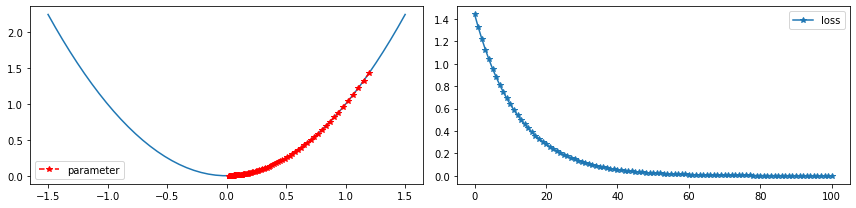

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

lr = 2e-2
epoch = int(1e2)
theta = 1.2

compute_loss = lambda theta : theta**2
compute_gradient = lambda theta : 2*theta
apply_gradient_descent = lambda theta, grad, lr: theta - lr * grad

theta_trace = [theta]
loss_trace = [compute_loss(theta)]
for i in range(epoch): 
    grad = compute_gradient(theta_trace[-1])
    theta = apply_gradient_descent(theta_trace[-1], grad, lr)
    theta_trace.append(theta)
    loss_trace.append(compute_loss(theta))  
    
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,3))

theta_fig = np.linspace(-1.5, 1.5)
loss_fig = compute_loss(theta_fig)
ax0.plot(theta_fig,loss_fig)
ax0.plot(theta_trace,loss_trace,'--*r',label='parameter')

ax1.plot(loss_trace,'-*',label="loss")

for ax in (ax0, ax1):
    ax.legend()

plt.tight_layout()
plt.show()

###### Polynomial Fit to Sine Curve (Numpy Implementation) [beginner_source/examples_tensor/polynomial_numpy.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/examples_tensor/polynomial_numpy.py)

99 1942.5981197543472
199 1357.8620988723726
299 950.6459714997519
399 666.8234472515073
499 468.84881983428795
599 330.65138961169055
699 234.11186628462443
799 166.62610469569785
899 119.4189117419541
999 86.37582610337255
1099 63.23296761101651
1199 47.01467134962145
1299 35.642761530587755
1399 27.664836288357098
1499 22.065150545580426
1599 18.132878187057905
1699 15.370270373477139
1799 13.428577985505335
1899 12.06331164944789
1999 11.10298121439451
Result: y = 0.04878583756373356 + 0.8443864408312384 x + -0.008416368779585175 x^2 + -0.09157308290467793 x^3


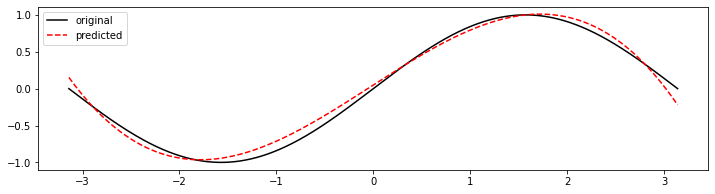

In [ ]:
# Code Source
# https://github.com/pytorch/tutorials/blob/main/beginner_source/examples_tensor/polynomial_numpy.py
"""
Warm-up: numpy
--------------

A third order polynomial, trained to predict :math:`y=\sin(x)` from :math:`-\pi`
to :math:`pi` by minimizing squared Euclidean distance.

This implementation uses numpy to manually compute the forward pass, loss, and
backward pass.

A numpy array is a generic n-dimensional array; it does not know anything about
deep learning or gradients or computational graphs, and is just a way to perform
generic numeric computations.
"""
import math
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

y_pred = a + b * x + c * x**2 + d * x**3

fig, ax = plt.subplots(figsize=(12,3))
ax.plot(x,y,"-k",label="original")
ax.plot(x,y_pred,"--r",label="predicted")
ax.legend()
plt.show()

###### Polynomial Fit to Sine Curve (PyTorch Implementation) [beginner_source/examples_tensor/polynomial_tensor.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/examples_tensor/polynomial_tensor.py)

99 3238.300537109375
199 2245.867431640625
299 1559.936279296875
399 1085.354248046875
499 756.6680908203125
599 528.8026733398438
699 370.6806335449219
799 260.8537292480469
899 184.50198364257812
999 131.3756866455078
1099 94.37876892089844
1199 68.59319305419922
1299 50.60741424560547
1399 38.052650451660156
1499 29.282575607299805
1599 23.151979446411133
1699 18.863677978515625
1799 15.862088203430176
1899 13.759873390197754
1999 12.286673545837402
Result: y = 0.058623336255550385 + 0.8372474908828735 x + -0.01011350192129612 x^2 + -0.09055762737989426 x^3


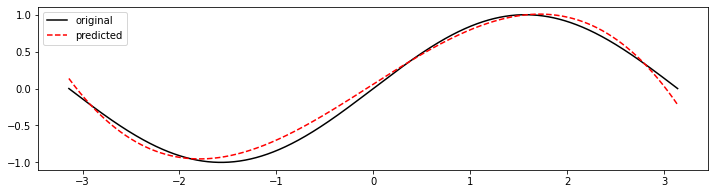

In [ ]:
# Code Source
# https://github.com/pytorch/tutorials/blob/main/beginner_source/examples_tensor/polynomial_tensor.py
"""
PyTorch: Tensors
----------------

A third order polynomial, trained to predict :math:`y=\sin(x)` from :math:`-\pi`
to :math:`pi` by minimizing squared Euclidean distance.

This implementation uses PyTorch tensors to manually compute the forward pass,
loss, and backward pass.

A PyTorch Tensor is basically the same as a numpy array: it does not know
anything about deep learning or computational graphs or gradients, and is just
a generic n-dimensional array to be used for arbitrary numeric computation.

The biggest difference between a numpy array and a PyTorch Tensor is that
a PyTorch Tensor can run on either CPU or GPU. To run operations on the GPU,
just cast the Tensor to a cuda datatype.
"""
import math
import matplotlib.pyplot as plt
import torch; torch.manual_seed(0)

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

y_pred = a + b * x + c * x**2 + d * x**3

fig, ax = plt.subplots(figsize=(12,3))
ax.plot(x,y,"-k",label="original")
ax.plot(x,y_pred,"--r",label="predicted")
ax.legend()
plt.show()

###### Polynomial Fit to Sine Curve (Linear Layer) [beginner_source/examples_nn/polynomial_nn.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/examples_nn/polynomial_nn.py)

In [ ]:
"""
PyTorch: nn
-----------

A third order polynomial, trained to predict :math:`y=\sin(x)` from :math:`-\pi`
to :math:`pi` by minimizing squared Euclidean distance.

This implementation uses the nn package from PyTorch to build the network.
PyTorch autograd makes it easy to define computational graphs and take gradients,
but raw autograd can be a bit too low-level for defining complex neural networks;
this is where the nn package can help. The nn package defines a set of Modules,
which you can think of as a neural network layer that produces output from
input and may have some trainable weights.
"""
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

###### Polynomial Fit to Sine Curve (Custom Module) [beginner_source/examples_nn/polynomial_module.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/examples_nn/polynomial_module.py)

In [ ]:
"""
PyTorch: Custom nn Modules
--------------------------

A third order polynomial, trained to predict :math:`y=\sin(x)` from :math:`-\pi`
to :math:`\pi` by minimizing squared Euclidean distance.

This implementation defines the model as a custom Module subclass. Whenever you
want a model more complex than a simple sequence of existing Modules you will
need to define your model this way.
"""
import torch
import math


class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined 
# with torch.nn.Parameter) which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

###***Chapter 4 Autograd***

###### Fundamentals of Autograd [beginner_source/introyt/autogradyt_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/introyt/autogradyt_tutorial.py) [english](https://www.youtube.com/watch?v=M0fX15_-xrY)

In [ ]:
# Code Source
# https://github.com/pytorch/tutorials/blob/main/beginner_source/introyt/autogradyt_tutorial.py
"""
The Fundamentals of Autograd
============================

Follow along with the video below or on 
`youtube <https://www.youtube.com/watch?v=M0fX15_-xrY>`.

PyTorch’s *Autograd* feature is part of what make PyTorch flexible and
fast for building machine learning projects. 
It allows for the rapid and
easy computation of multiple partial derivatives (also referred to as
*gradients)* over a complex computation. 
This operation is central to backpropagation-based neural network learning.

The power of autograd comes from the fact that it traces your
computation dynamically *at runtime,* meaning that if your model has
decision branches, or loops whose lengths are not known until runtime,
the computation will still be traced correctly, and you’ll get correct
gradients to drive learning. 
This, combined with the fact that your
models are built in Python, offers far more flexibility than frameworks
that rely on static analysis of a more rigidly-structured model for
computing gradients.

What Do We Need Autograd For?
-----------------------------
"""

################################################################################
# A machine learning model is a *function*, with inputs and outputs. 
# For this discussion, we’ll treat the inputs as an *i*-dimensional vector
# :math:`\vec{x}`, with elements :math:`x_{i}`. 
# We can then express the model, *M*, 
# as a vector-valued function of the input: :math:`\vec{y} = \vec{M}(\vec{x})`. 
# (We treat the value of M’s output as
# a vector because in general, a model may have any number of outputs.)
#
# Since we’ll mostly be discussing autograd in the context of training,
# our output of interest will be the model’s loss. 
# The *loss function* L(:math:`\vec{y}`) = L(:math:`\vec{M}`\ (:math:`\vec{x}`)) 
# is a single-valued scalar function of the model’s output. 
# This function expresses how far off our model’s prediction was 
# from a particular input’s *ideal* output. 
# *Note: After this point, we will often omit the vector sign 
# where it should be contextually clear - e.g.,* :math:`y`
# instead of :math:`\vec y`.
#
# In training a model, we want to minimize the loss. 
# In the idealized case of a perfect model, 
# that means adjusting its learning weights - that is,
# the adjustable parameters of the function - 
# such that loss is zero for all inputs. 
# In the real world, it means an iterative process of 
# nudging the learning weights  
# until we see that we get a tolerable loss for a wide variety of inputs.
#
# How do we decide how far and in which direction to nudge the weights? 
# We want to *minimize* the loss, which means making its first derivative
# with respect to the input equal to 0:
# :math:`\frac{\partial L}{\partial x} = 0`.
#
# Recall, though, that the loss is not *directly* derived from the input,
# but a function of the model’s output 
# (which is a function of the input directly), 
# :math:`\frac{\partial L}{\partial x}` =
# :math:`\frac{\partial {L({\vec y})}}{\partial x}`. 
# By the chain rule of differential calculus, we have
# :math:`\frac{\partial {L({\vec y})}}{\partial x}` =
# :math:`\frac{\partial L}{\partial y}\frac{\partial y}{\partial x}` =
# :math:`\frac{\partial L}{\partial y}\frac{\partial M(x)}{\partial x}`.
#
# :math:`\frac{\partial M(x)}{\partial x}` is where things get complex.
# The partial derivatives of the model’s outputs 
# with respect to its inputs, 
# if we were to expand the expression using the chain rule again,
# would involve many local partial derivatives 
# over every multiplied learning weight, every activation function, 
# and every other mathematical transformation in the model. 
# The full expression for each such partial derivative 
# is the sum of the products of the local gradient of *every
# possible path* through the computation graph 
# that ends with the variable whose gradient we are trying to measure.
#
# In particular, 
# the gradients over the learning weights are of interest to us - 
# they tell us *what direction to change each weight* 
# to get the loss function closer to zero.
#
# Since the number of such local derivatives (each corresponding to a
# separate path through the model’s computation graph) will tend to go up
# exponentially with the depth of a neural network, 
# so does the complexity in computing them. 
# This is where autograd comes in: 
# It tracks the history of every computation. 
# Every computed tensor in your PyTorch model 
# carries a history of its input tensors and the function used to create it. 
# Combined with the fact that PyTorch functions meant to act on tensors 
# each have a built-in implementation for computing their own derivatives, 
# this greatly speeds the computation of 
# the local derivatives needed for learning.
#
# A Simple Example
# ----------------
#
# That was a lot of theory - 
# but what does it look like to use autograd in practice?
#
# Let’s start with a straightforward example. 
# First, we’ll do some imports to let us graph our results:
################################################################################

import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

################################################################################
# Next, we’ll create 
# an input tensor full of evenly spaced values on the interval 
# :math:`[0, 2{\pi}]`, and specify ``requires_grad=True``. 
# (Like most functions that create tensors, ``torch.linspace()`` accepts an
# optional ``requires_grad`` option.) 
# Setting this flag means that in every computation that follows, 
# autograd will be accumulating the history of 
# the computation in the output tensors of that computation.
################################################################################

a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

################################################################################
# Next, we’ll perform a computation, and 
# plot its output in terms of its inputs:
################################################################################

b = torch.sin(a)
plt.plot(a.detach(), b.detach())

################################################################################
# Let’s have a closer look at the tensor ``b``. 
# When we print it, 
# we see an indicator that it is tracking its computation history:
################################################################################

print(b)

################################################################################
# This ``grad_fn`` gives us a hint that 
# when we execute the backpropagation step and compute gradients, 
# we’ll need to compute the derivative of :math:`sin(x)` 
# for all this tensor’s inputs.
# 
# Let’s perform some more computations:
################################################################################ 

c = 2 * b
print(c)

d = c + 1
print(d)

################################################################################
# Finally, let’s compute a single-element output. 
# When you call ``.backward()`` on a tensor with no arguments, 
# it expects the calling tensor to contain only a single element,
# as is the case when computing a loss function.
################################################################################

out = d.sum()
print(out)

################################################################################
# Each ``grad_fn`` stored with our tensors allows 
# you to walk the computation all the way back to its inputs 
# with its ``next_functions`` property. 
# We can see below that drilling down on this property on ``d``
# shows us the gradient functions for all the prior tensors. 
# Note that ``a.grad_fn`` is reported as ``None``, 
# indicating that this was an input to the function with no history of its own.
################################################################################

print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

################################################################################
# With all this machinery in place, 
# how do we get derivatives out? 
# You call the ``backward()`` method on the output, 
# and check the input’s ``grad`` property to inspect the gradients:
################################################################################

out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

################################################################################
# Recall the computation steps we took to get here:
# 
#    a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
#    b = torch.sin(a)
#    c = 2 * b
#    d = c + 1
#    out = d.sum()
# 
# Adding a constant, as we did to compute ``d``, does not change the derivative. 
# That leaves :math:`c = 2 * b = 2 * sin(a)`, 
# the derivative of which should be :math:`2 * cos(a)`. 
# Looking at the graph above, that’s just what we see.
# 
# Be aware that 
# only *leaf nodes* of the computation have their gradients computed. 
# If you tried, for example, ``print(c.grad)`` you’d get back ``None``. 
# In this simple example, only the input is a leaf node, 
# so only it has gradients computed.
################################################################################

################################################################################
# Autograd in Training
# 
# We’ve had a brief look at how autograd works, 
# but how does it look when it’s used for its intended purpose? 
# Let’s define a small model and examine how it changes 
# after a single training batch. 
# First, define a few constants, our model, 
# and some stand-ins for inputs and outputs:
################################################################################

BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()
        
        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100, 10)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x
    
some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

################################################################################
# One thing you might notice is that 
# we never specify ``requires_grad=True`` for the model’s layers. 
# Within a subclass of ``torch.nn.Module``, 
# it’s assumed that 
# we want to track gradients on the layers’ weights for learning.
# 
# If we look at the layers of the model, 
# we can examine the values of the weights, 
# and verify that no gradients have been computed yet:
################################################################################

print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

################################################################################
# Let’s see how this changes when we run through one training batch. 
# For a loss function, we’ll just use the square of the Euclidean distance
# between our ``prediction`` and the ``ideal_output``, 
# and we’ll use a basic stochastic gradient descent optimizer.
################################################################################

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

################################################################################
# Now, let’s call ``loss.backward()`` and see what happens:
################################################################################

loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

################################################################################
# We can see that the gradients have been computed for each learning weight, 
# but the weights remain unchanged, because we haven’t run the optimizer yet. 
# The optimizer is responsible for updating model weights
# based on the computed gradients.
################################################################################

optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

################################################################################
# You should see that ``layer2``\ ’s weights have changed.
# 
# One important thing about the process: 
# After calling ``optimizer.step()``, 
# you need to call ``optimizer.zero_grad()``, or
# else every time you run ``loss.backward()``, 
# the gradients on the learning weights will accumulate:
################################################################################

print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()
    
print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad()

print(model.layer2.weight.grad[0][0:10])

################################################################################
# After running the cell above, 
# you should see that after running ``loss.backward()`` multiple times, 
# the magnitudes of most of the gradients will be much larger. 
# Failing to zero the gradients before running your next training batch
# will cause the gradients to blow up in
# this manner, causing incorrect and unpredictable learning results.
################################################################################

################################################################################
# Turning Autograd Off and On
# 
# There are situations 
# where you will need fine-grained control over whether autograd is enabled. 
# There are multiple ways to do this,
# depending on the situation.
# 
# The simplest is to change the ``requires_grad`` flag on a tensor directly:
################################################################################

a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

################################################################################
# In the cell above, we see that 
# ``b1`` has a ``grad_fn`` (i.e., a traced computation history), 
# which is what we expect, since it was derived from a tensor, ``a``, 
# that had autograd turned on. 
# When we turn off autograd explicitly with ``a.requires_grad = False``,
#  computation history is no longer tracked, as we see when we compute ``b2``.
# 
# If you only need autograd turned off temporarily, 
# a better way is to use the ``torch.no_grad()``:
################################################################################

a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

################################################################################
# ``torch.no_grad()`` can also be used as a function or method decorator:
################################################################################

def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y

a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

################################################################################
# There’s a corresponding context manager, ``torch.enable_grad()``, 
# for turning autograd on when it isn’t already. 
# It may also be used as a decorator.
# 
# Finally, you may have a tensor that requires gradient tracking, 
# but you want a copy that does not.
# For this we have the ``Tensor`` object’s ``detach()`` method - 
# it creates a copy of the tensor that is *detached*
# from the computation history:
################################################################################

x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

################################################################################
# We did this above when we wanted to graph some of our tensors. 
# This is because ``matplotlib`` expects a NumPy array as input, 
# and the implicit conversion from a PyTorch tensor to a NumPy array 
# is not enabled for tensors with requires_grad=True. 
# Making a detached copy lets us move forward.
################################################################################

################################################################################
# Autograd and In-place Operations
# 
# In every example in this notebook so far, 
# we’ve used variables to capture the intermediate values of a computation. 
# Autograd needs these intermediate values to perform gradient computations. 
# *For this reason, you must be careful about using in-place operations 
# when using autograd.* 
# Doing so can destroy information you need to compute
# derivatives in the ``backward()`` call. 
# PyTorch will even stop you if
# you attempt an in-place operation on leaf variable that requires autograd, 
# as shown below.
# 
# .. note::
#     The following code cell throws a runtime error. This is expected.
#
#    a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
#    torch.sin_(a)
################################################################################

################################################################################
# Autograd Profiler
# 
# Autograd tracks every step of your computation in detail. 
# Such a computation history, combined with timing information, would make a
# handy profiler - and autograd has that feature baked in. 
# Here’s a quick example usage:
################################################################################

device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True
    
x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y
        
print(prf.key_averages().table(sort_by='self_cpu_time_total'))

################################################################################
# The profiler can also label individual sub-blocks of code, 
# break out the data by input tensor shape, 
# and export data as a Chrome tracing tools file. 
# For full details of the API, see the
# `documentation <https://pytorch.org/docs/stable/autograd.html#profiler>`.
################################################################################

################################################################################
# Advanced Topic: More Autograd Detail and the High-Level API
# 
# If you have a function with an n-dimensional input and m-dimensional output, 
# :math:`\vec{y}=f(\vec{x})`, the complete gradient is a matrix of
# the derivative of every output with respect to every input, 
# called the *Jacobian:*
# 
# .. math::
#
#      J
#      =
#      \left(\begin{array}{ccc}
#      \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
#      \vdots & \ddots & \vdots\\
#      \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
#      \end{array}\right)
# 
# If you have a second function, :math:`l=g\left(\vec{y}\right)` that
# takes m-dimensional input (that is, the same dimensionality as the
# output above), and returns a scalar output, you can express its
# gradients with respect to :math:`\vec{y}` as a column vector,
# :math:`v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}`
# - which is really just a one-column Jacobian.
# 
# More concretely, imagine the first function as your PyTorch model (with
# potentially many inputs and many outputs) and the second function as a
# loss function (with the model’s output as input, and the loss value as
# the scalar output).
# 
# If we multiply the first function’s Jacobian by the gradient of the
# second function, and apply the chain rule, we get:
# 
# .. math::
#
#    J^{T}\cdot v=\left(\begin{array}{ccc}
#    \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
#    \vdots & \ddots & \vdots\\
#    \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
#    \end{array}\right)\left(\begin{array}{c}
#    \frac{\partial l}{\partial y_{1}}\\
#    \vdots\\
#    \frac{\partial l}{\partial y_{m}}
#    \end{array}\right)=\left(\begin{array}{c}
#    \frac{\partial l}{\partial x_{1}}\\
#    \vdots\\
#    \frac{\partial l}{\partial x_{n}}
#    \end{array}\right)
# 
# Note: You could also use the equivalent operation :math:`v^{T}\cdot J`,
# and get back a row vector.
# 
# The resulting column vector is the *gradient of the second function with
# respect to the inputs of the first* - or in the case of our model and
# loss function, the gradient of the loss with respect to the model
# inputs.
# 
# **``torch.autograd`` is an engine for computing these products.** This
# is how we accumulate the gradients over the learning weights during the
# backward pass.
# 
# For this reason, the ``backward()`` call can *also* take an optional
# vector input. This vector represents a set of gradients over the tensor,
# which are multiplied by the Jacobian of the autograd-traced tensor that
# precedes it. Let’s try a specific example with a small vector:
################################################################################

x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

################################################################################
# If we tried to call ``y.backward()`` now, we’d get a runtime error and a
# message that gradients can only be *implicitly* computed for scalar
# outputs. For a multi-dimensional output, autograd expects us to provide
# gradients for those three outputs that it can multiply into the
# Jacobian:
################################################################################

v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float) # stand-in for gradients
y.backward(v)

print(x.grad)

################################################################################
# (Note that the output gradients are all related to powers of two - which
# we’d expect from a repeated doubling operation.)
################################################################################

################################################################################
# The High-Level API
# 
# There is an API on autograd that gives you direct access to important
# differential matrix and vector operations. In particular, it allows you
# to calculate the Jacobian and the *Hessian* matrices of a particular
# function for particular inputs. (The Hessian is like the Jacobian, but
# expresses all partial *second* derivatives.) It also provides methods
# for taking vector products with these matrices.
# 
# Let’s take the Jacobian of a simple function, evaluated for a 2
# single-element inputs:
################################################################################

def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

################################################################################
# If you look closely, the first output should equal :math:`2e^x` (since
# the derivative of :math:`e^x` is :math:`e^x`), and the second value
# should be 3.
# 
# You can, of course, do this with higher-order tensors:
################################################################################

inputs = (torch.rand(3), torch.rand(3)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

################################################################################
# The ``torch.autograd.functional.hessian()`` method works identically
# (assuming your function is twice differentiable), but returns a matrix
# of all second derivatives.
# 
# There is also a function to directly compute the vector-Jacobian
# product, if you provide the vector:
################################################################################

def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 1000:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

################################################################################
# The ``torch.autograd.functional.jvp()`` method performs the same matrix
# multiplication as ``vjp()`` with the operands reversed. The ``vhp()``
# and ``hvp()`` methods do the same for a vector-Hessian product.
# 
# For more information, including performance notes on the `docs for the
# functional API 
# <https://pytorch.org/docs/stable/autograd.html#functional-higher-level-api>`
################################################################################

###### Polynomial Fit to Sine Curve (Built-In Functions with Forward and Backward) [beginner_source/examples_autograd/polynomial_autograd.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/examples_autograd/polynomial_autograd.py)

99 3272.46044921875
199 2184.318603515625
299 1459.694091796875
399 976.9326782226562
499 655.1564331054688
599 440.5772399902344
699 297.4096984863281
799 201.8365020751953
899 137.99900817871094
999 95.33416748046875
1099 66.80167388916016
1199 47.70795822143555
1299 34.9218864440918
1399 26.353607177734375
1499 20.607515335083008
1599 16.751129150390625
1699 14.160844802856445
1799 12.419572830200195
1899 11.24796199798584
1999 10.45901870727539
Result: y = -0.024277467280626297 + 0.8242697715759277 x + 0.004188267979770899 x^2 + -0.08871166408061981 x^3


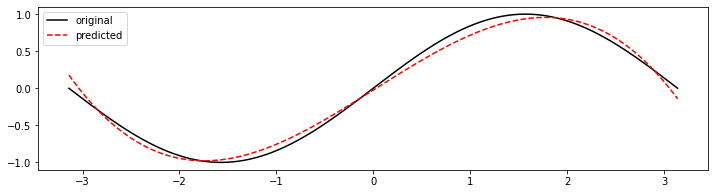

In [ ]:
# Code Source
# https://github.com/pytorch/tutorials/blob/main/beginner_source/examples_autograd/polynomial_autograd.py
"""
PyTorch: Tensors and autograd

A third order polynomial, trained to predict :math:`y=\sin(x)` from :math:`-\pi`
to :math:`\pi` by minimizing squared Euclidean distance.

This implementation computes the forward pass using operations on PyTorch
Tensors, and uses PyTorch autograd to compute gradients.

A PyTorch Tensor represents a node in a computational graph. If ``x`` is a
Tensor that has ``x.requires_grad=True`` then ``x.grad`` is another Tensor
holding the gradient of ``x`` with respect to some scalar value.
"""
import math
import matplotlib.pyplot as plt
import torch

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

with torch.no_grad():
    y_pred = a + b * x + c * x**2 + d * x**3

fig, ax = plt.subplots(figsize=(12,3))
ax.plot(x,y,"-k",label="original")
ax.plot(x,y_pred,"--r",label="predicted")
ax.legend()
plt.show()

###### Polynomial Fit to Sine Curve (Custom Functions with Forward and Backward) [beginner_source/examples_autograd/polynomial_custom_function.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/examples_autograd/polynomial_custom_function.py)

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03519439697266
499 50.97850799560547
599 37.403133392333984
699 28.206867218017578
799 21.97318458557129
899 17.7457275390625
999 14.877889633178711
1099 12.93176555633545
1199 11.610918998718262
1299 10.71425724029541
1399 10.10548210144043
1499 9.692106246948242
1599 9.411375045776367
1699 9.220745086669922
1799 9.091285705566406
1899 9.003360748291016
1999 8.943639755249023
Result: y = -5.394172664097141e-09 + -2.208526849746704 * P3(1.367587154632588e-09 + 0.2554861009120941 x)


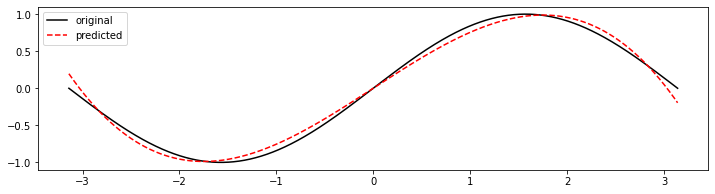

In [ ]:
# Code Source
# https://github.com/pytorch/tutorials/blob/main/beginner_source/examples_autograd/polynomial_custom_function.py
"""
PyTorch: Defining New autograd Functions

A third order polynomial, trained to predict :math:`y=\sin(x)` from :math:`-\pi`
to :math:`\pi` by minimizing squared Euclidean distance. Instead of writing the
polynomial as :math:`y=a+bx+cx^2+dx^3`, we write the polynomial as
:math:`y=a+b P_3(c+dx)` where :math:`P_3(x)=\\frac{1}{2}\\left(5x^3-3x\\right)` is
the `Legendre polynomial`_ of degree three.

.. _Legendre polynomial:
    https://en.wikipedia.org/wiki/Legendre_polynomials

This implementation computes the forward pass using operations on PyTorch
Tensors, and uses PyTorch autograd to compute gradients.

In this implementation we implement our own custom autograd function to perform
:math:`P_3'(x)`. By mathematics, :math:`P_3'(x)=\\frac{3}{2}\\left(5x^2-1\\right)`
"""

import math
import matplotlib.pyplot as plt
import torch


class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For this example, we need
# 4 weights: y = a + b * P3(c + d * x), these weights need to be initialized
# not too far from the correct result to ensure convergence.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

with torch.no_grad():
    y_pred = a + b * P3(c + d * x)

fig, ax = plt.subplots(figsize=(12,3))
ax.plot(x,y,"-k",label="original")
ax.plot(x,y_pred,"--r",label="predicted")
ax.legend()
plt.show()

###***Chapter 5 Optimization***

###### Optimizing Model Parameters [beginner_source/basics/optimization_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/basics/optimization_tutorial.py)

In [ ]:
# Source
# https://github.com/pytorch/tutorials/blob/main/beginner_source/basics/optimization_tutorial.py
"""
Optimizing Model Parameters
===========================

Now that we have a model and data it's time to train, 
validate and test our model by optimizing its parameters on
our data. Training a model is an iterative process; 
in each iteration the model makes a guess about the output, calculates
the error in its guess (*loss*), collects the derivatives of the error 
with respect to its parameters (as we saw in
the `previous section  <autograd_tutorial.html>`_), and 
**optimizes** these parameters using gradient descent. For a more
detailed walkthrough of this process, 
check out this video on 
`backpropagation from 3Blue1Brown 
<https://www.youtube.com/watch?v=tIeHLnjs5U8>`.

Prerequisite Code
-----------------
We load the code from the previous sections 
on `Datasets & DataLoaders <data_tutorial.html>`
and `Build Model  <buildmodel_tutorial.html>`.
"""

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()


################################################################################
# Hyperparameters
#
# Hyperparameters are adjustable parameters 
# that let you control the model optimization process.
# Different hyperparameter values 
# can impact model training and convergence rates
# (`read more 
# <https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html>`
# about hyperparameter tuning)
#
# We define the following hyperparameters for training:
#  - **Number of Epochs** - the number times to iterate over the dataset
#  - **Batch Size** - the number of data samples propagated 
#    through the network before the parameters are updated
#  - **Learning Rate** - 
#    how much to update models parameters at each batch/epoch. 
#    Smaller values yield slow learning speed, 
#    while large values may result in unpredictable behavior during training.
################################################################################

learning_rate = 1e-3
batch_size = 64
epochs = 5

################################################################################
# Optimization Loop
#
# Once we set our hyperparameters, 
# we can then train and optimize our model with an optimization loop. 
# Each iteration of the optimization loop is called an **epoch**.
#
# Each epoch consists of two main parts:
#  - **The Train Loop** - iterate over the training dataset and 
#    try to converge to optimal parameters.
#  - **The Validation/Test Loop** - iterate over the test dataset 
#    to check if model performance is improving.
#
# Let's briefly familiarize ourselves with some of the concepts 
# used in the training loop. 
# Jump ahead to see the :ref:`full-impl-label` of the optimization loop.
#
# Loss Function
# ~~~~~~~~~~~~~~~~~
#
# When presented with some training data, 
# our untrained network is likely not to give the correct answer. 
# **Loss function** measures the degree of dissimilarity 
# of obtained result to the target value,
# and it is the loss function that we want to minimize during training. 
# To calculate the loss we make a
# prediction using the inputs of our given data sample 
# and compare it against the true data label value.
#
# Common loss functions include 
# `nn.MSELoss <https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss>` 
# (Mean Square Error) for regression tasks, and
# `nn.NLLLoss <https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss>` 
# (Negative Log Likelihood) for classification.
# `nn.CrossEntropyLoss <https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss>` 
# combines ``nn.LogSoftmax`` and ``nn.NLLLoss``.
#
# We pass our model's output logits to ``nn.CrossEntropyLoss``, 
# which will normalize the logits and compute the prediction error.
################################################################################

# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

################################################################################
# Optimizer
#
# Optimization is the process of adjusting model parameters 
# to reduce model error in each training step. 
# **Optimization algorithms** define how this process is performed 
# (in this example we use Stochastic Gradient Descent).
# All optimization logic is encapsulated in  the ``optimizer`` object. 
# Here, we use the SGD optimizer; additionally, there are many 
# `different optimizers <https://pytorch.org/docs/stable/optim.html>`_
# available in PyTorch such as ADAM and RMSProp, 
# that work better for different kinds of models and data.
#
# We initialize the optimizer by registering the model's parameters 
# that need to be trained, and passing in the learning rate hyperparameter.
################################################################################

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

################################################################################
# Inside the training loop, optimization happens in three steps:
#  * Call ``optimizer.zero_grad()`` to reset the gradients of model parameters. 
# Gradients by default add up; to prevent double-counting, 
# we explicitly zero them at each iteration.
#  * Backpropagate the prediction loss with a call to ``loss.backward()``. 
# PyTorch deposits the gradients of the loss w.r.t. each parameter.
#  * Once we have our gradients, we call ``optimizer.step()`` 
# to adjust the parameters by the gradients collected in the backward pass.
################################################################################

################################################################################
# .. _full-impl-label:
#
# Full Implementation
# -----------------------
# We define ``train_loop`` that loops over our optimization code, and 
# ``test_loop`` that evaluates the model's performance against our test data.
################################################################################

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

################################################################################
# We initialize the loss function and optimizer, 
# and pass it to ``train_loop`` and ``test_loop``.
# Feel free to increase the number of epochs to track 
# the model's improving performance.
################################################################################

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

################################################################################
# Further Reading
# 
# - `Loss Functions <https://pytorch.org/docs/stable/nn.html#loss-functions>`
# - `torch.optim <https://pytorch.org/docs/stable/optim.html>`
# - `Warmstart Training a Model <https://pytorch.org/tutorials/recipes/recipes/warmstarting_model_using_parameters_from_a_different_model.html>`
################################################################################

###### Training with PyTorch [beginner_source/introyt/trainingyt.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/introyt/trainingyt.py) [english](https://www.youtube.com/watch?v=jF43_wj_DCQ)

In [ ]:
# Source
# https://github.com/pytorch/tutorials/blob/main/beginner_source/introyt/trainingyt.py
"""
Training with PyTorch
=====================

Follow along with the video below or on 
`youtube <https://www.youtube.com/watch?v=jF43_wj_DCQ>`.

Introduction
------------

In past videos, we’ve discussed and demonstrated:

- Building models with the neural network layers and functions of the torch.nn module
- The mechanics of automated gradient computation, which is central to
  gradient-based model training 
- Using TensorBoard to visualize training progress and other activities

In this video, we’ll be adding some new tools to your inventory:

- We’ll get familiar with the dataset and dataloader abstractions, and how
  they ease the process of feeding data to your model during a training loop 
- We’ll discuss specific loss functions and when to use them
- We’ll look at PyTorch optimizers, which implement algorithms to adjust
  model weights based on the outcome of a loss function

Finally, we’ll pull all of these together and see a full PyTorch
training loop in action.


Dataset and DataLoader
----------------------
 
The ``Dataset`` and ``DataLoader`` classes encapsulate the process of
pulling your data from storage and exposing it to your training loop in
batches.

The ``Dataset`` is responsible for accessing and processing single
instances of data.
 
The ``DataLoader`` pulls instances of data from the ``Dataset`` (either
automatically or with a sampler that you define), collects them in
batches, and returns them for consumption by your training loop. The
``DataLoader`` works with all kinds of datasets, regardless of the type
of data they contain.
 
For this tutorial, we’ll be using the Fashion-MNIST dataset provided by
TorchVision. We use ``torchvision.transforms.Normalize()`` to
zero-center and normalize the distribution of the image tile content,
and download both training and validation data splits.

""" 

import torch
import torchvision
import torchvision.transforms as transforms

# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime


transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Create datasets for training & validation, download if necessary
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

# Create data loaders for our datasets; shuffle for training, not for validation
training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True, num_workers=2)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False, num_workers=2)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Report split sizes
print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))


################################################################################
# As always, let’s visualize the data as a sanity check:
################################################################################

import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(4)))

################################################################################
# The Model
# ---------
# 
# The model we’ll use in this example is a variant of LeNet-5 - it should
# be familiar if you’ve watched the previous videos in this series.
################################################################################ 

import torch.nn as nn
import torch.nn.functional as F

# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

model = GarmentClassifier()

################################################################################
# Loss Function
# -------------
# 
# For this example, we’ll be using a cross-entropy loss. For demonstration
# purposes, we’ll create batches of dummy output and label values, run
# them through the loss function, and examine the result.
################################################################################

loss_fn = torch.nn.CrossEntropyLoss()

# NB: Loss functions expect data in batches, so we're creating batches of 4
# Represents the model's confidence in each of the 10 classes for a given input
dummy_outputs = torch.rand(4, 10)
# Represents the correct class among the 10 being tested
dummy_labels = torch.tensor([1, 5, 3, 7])
    
print(dummy_outputs)
print(dummy_labels)

loss = loss_fn(dummy_outputs, dummy_labels)
print('Total loss for this batch: {}'.format(loss.item()))

################################################################################
# Optimizer
# ---------
# 
# For this example, we’ll be using simple `stochastic gradient
# descent <https://pytorch.org/docs/stable/optim.html>`__ with momentum.
# 
# It can be instructive to try some variations on this optimization
# scheme:
# 
# - Learning rate determines the size of the steps the optimizer
#   takes. What does a different learning rate do to the your training
#   results, in terms of accuracy and convergence time?
# - Momentum nudges the optimizer in the direction of strongest gradient over
#   multiple steps. What does changing this value do to your results? 
# - Try some different optimization algorithms, such as averaged SGD, Adagrad, 
#   or Adam. How do your results differ?
################################################################################

# Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

################################################################################
# The Training Loop
# -----------------
# 
# Below, we have a function that performs one training epoch. It
# enumerates data from the DataLoader, and on each pass of the loop does
# the following:
# 
# - Gets a batch of training data from the DataLoader
# - Zeros the optimizer’s gradients 
# - Performs an inference - that is, gets predictions from the model 
#   for an input batch
# - Calculates the loss for 
#   that set of predictions vs. the labels on the dataset
# - Calculates the backward gradients over the learning weights
# - Tells the optimizer to perform one learning step - 
#   that is, adjust the model’s learning weights 
#   based on the observed gradients for this batch, 
#   according to the optimization algorithm we chose
# - It reports on the loss for every 1000 batches.
# - Finally, it reports the average per-batch loss for the last
#   1000 batches, for comparison with a validation run
################################################################################

def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.
    
    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data
        
        # Zero your gradients for every batch!
        optimizer.zero_grad()
        
        # Make predictions for this batch
        outputs = model(inputs)
        
        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()
        
        # Adjust learning weights
        optimizer.step()
        
        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.
            
    return last_loss

################################################################################
# Per-Epoch Activity
# ~~~~~~~~~~~~~~~~~~
# 
# There are a couple of things we’ll want to do once per epoch: 
#
# - Perform validation by checking our relative loss on a set of data that was 
#   not used for training, and report this 
# - Save a copy of the model
# 
# Here, we’ll do our reporting in TensorBoard. This will require going to
# the command line to start TensorBoard, and opening it in another browser
# tab.
################################################################################

# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 5

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))
    
    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)
    
    # We don't need gradients on to do reporting
    model.train(False)
    
    running_vloss = 0.0
    for i, vdata in enumerate(validation_loader):
        vinputs, vlabels = vdata
        voutputs = model(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss
    
    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))
    
    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()
    
    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)
    
    epoch_number += 1

################################################################################
# To load a saved version of the model:
# 
# ::
# 
#    saved_model = GarmentClassifier()
#    saved_model.load_state_dict(torch.load(PATH))
# 
# Once you’ve loaded the model, it’s ready for whatever you need it for -
# more training, inference, or analysis.
# 
# Note that if your model has constructor parameters that affect model
# structure, you’ll need to provide them and configure the model
# identically to the state in which it was saved.
# 
# Other Resources
# ---------------
# 
# -  Docs on the `data
#    utilities <https://pytorch.org/docs/stable/data.html>`__, including
#    Dataset and DataLoader, at pytorch.org
# -  A `note on the use of pinned memory 
#    <https://pytorch.org/docs/stable/notes/cuda.html#cuda-memory-pinning>`
#    for GPU training
# -  Documentation on the datasets available in
#    `TorchVision <https://pytorch.org/vision/stable/datasets.html>`,
#    `TorchText <https://pytorch.org/text/stable/datasets.html>`, and
#    `TorchAudio <https://pytorch.org/audio/stable/datasets.html>`
# -  Documentation on the `loss
#    functions <https://pytorch.org/docs/stable/nn.html#loss-functions>`
#    available in PyTorch
# -  Documentation on the `torch.optim
#    package <https://pytorch.org/docs/stable/optim.html>`, which
#    includes optimizers and related tools, such as learning rate
#    scheduling
# -  A detailed `tutorial on saving and loading
#    models <https://pytorch.org/tutorials/beginner/saving_loading_models.html>`
# -  The `Tutorials section of
#    pytorch.org <https://pytorch.org/tutorials/>` contains tutorials on
#    a broad variety of training tasks, including classification in
#    different domains, generative adversarial networks, reinforcement
#    learning, and more 
################################################################################

###### Polynomial Fit to Sine Curve (Optimizer) [beginner_source/examples_nn/polynomial_optim.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/examples_nn/polynomial_optim.py)

In [ ]:
"""
PyTorch: optim
--------------

A third order polynomial, trained to predict :math:`y=\sin(x)` from :math:`-\pi`
to :math:`pi` by minimizing squared Euclidean distance.

This implementation uses the nn package from PyTorch to build the network.

Rather than manually updating the weights of the model as we have been doing,
we use the optim package to define an Optimizer that will update the weights
for us. The optim package defines many optimization algorithms that are commonly
used for deep learning, including SGD+momentum, RMSProp, Adam, etc.
"""
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

###***Chapter 6 Linear Regression***

###### Linear Regression without Optimizor [한국어](https://www.youtube.com/watch?v=Pj1wOWWM8xM&list=PLXziV1DL41oiG39s82XHjPHbOIJKWdiNa&index=3)

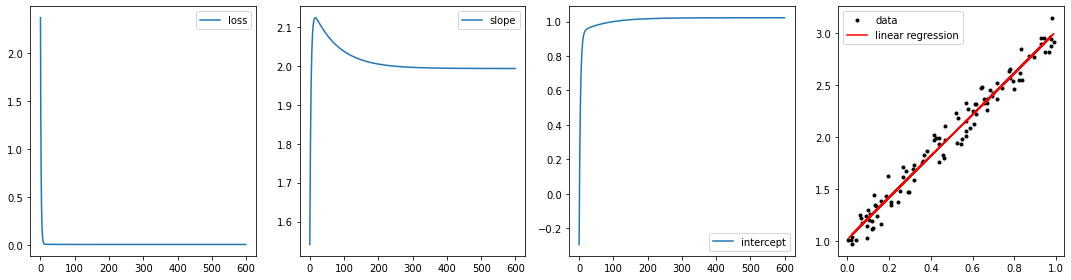

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import torch; torch.manual_seed(0)


def load_data():
    x = np.random.uniform(size=(100,1))
    y = 1 + 2*x + np.random.normal(scale=0.1,size=(100,1))
    
    inputs = torch.tensor(x, dtype=torch.float32) # (100, 1)
    targets = torch.tensor(y, dtype=torch.float32) # (100, 1)
        
    return inputs, targets


def initialize_weight():
    w = torch.randn((1,), requires_grad=True) # (1,)
    b = torch.randn((1,), requires_grad=True) # (1,)
    return w, b


def train(inputs, targets, w, b, epochs=600, lr=1e-1):
    w_trace = []
    b_trace = []
    loss_trace = []
    for i in range(epochs):
        preds = model(inputs, w, b) # (100, 1)
        loss = mse(preds, targets) # ()
        w_trace.append(w.item())
        b_trace.append(b.item())
        loss_trace.append(loss.item())

        loss.backward()
        with torch.no_grad():
        # without : with torch.no_grad():
        # RuntimeError: a leaf Variable that requires grad is being used 
        # in an in-place operation.
            w -= w.grad * lr # in-place operation
            b -= b.grad * lr # in-place operation
            w.grad.zero_()
            b.grad.zero_()
            
    return w, b, w_trace, b_trace, loss_trace 


def model(inputs, w, b):
    return inputs * w + b # (100, 1) * (1,) + (1,) = (100, 1)


def mse(preds, targets):
    return torch.sum((preds-targets)**2) / targets.numel()


def main():
    inputs, targets = load_data()
    
    w, b = initialize_weight()
    
    w, b, w_trace, b_trace, loss_trace = train(inputs, targets, w, b) 

    preds = model(inputs, w, b)

    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4,figsize=(15,4))
    ax0.plot(loss_trace,label="loss")
    ax1.plot(w_trace,label="slope")
    ax2.plot(b_trace,label="intercept")
    ax3.plot(inputs,targets,'k.',label="data")
    ax3.plot(inputs,preds.detach().numpy(),'r-',label="linear regression")
    for ax in (ax0, ax1, ax2, ax3):
        ax.legend()
    plt.tight_layout()
    plt.show()
    
    
if __name__ == "__main__":
    main()

###### Linear Regression with Optimizor

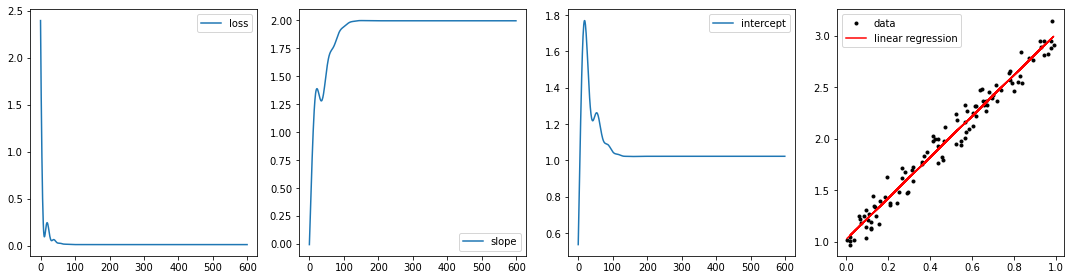

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import torch; torch.manual_seed(0)


def load_data():
    x = np.random.uniform(size=(100,1))
    y = 1 + 2*x + np.random.normal(scale=0.1,size=(100,1))
    
    inputs = torch.tensor(x, dtype=torch.float32) # (100, 1)
    targets = torch.tensor(y, dtype=torch.float32) # (100, 1)
        
    return inputs, targets


def train(inputs, targets, model, loss_fn, optimizor, epochs=600):
    w_trace = []
    b_trace = []
    loss_trace = []
    for epoch in range(epochs):
        preds = model(inputs)
        loss = loss_fn(preds,targets)
        w_trace.append(model.weight.item())
        b_trace.append(model.bias.item())
        loss_trace.append(loss.item())
 
        loss.backward()

        optimizor.step()
        optimizor.zero_grad()
            
    return w_trace, b_trace, loss_trace 


def main():
    inputs, targets = load_data()
    
    model = torch.nn.Linear(in_features=1,out_features=1)
    loss_fn = torch.nn.MSELoss()
    optimizor = torch.optim.Adam(model.parameters(), lr=1e-1)
    
    w_trace, b_trace, loss_trace = train(inputs, targets, model, loss_fn, optimizor) 
    
    preds = model(inputs)

    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4,figsize=(15,4))
    ax0.plot(loss_trace,label="loss")
    ax1.plot(w_trace,label="slope")
    ax2.plot(b_trace,label="intercept")
    ax3.plot(inputs,targets,'k.',label="data")
    ax3.plot(inputs,preds.detach().numpy(),'r-',label="linear regression")
    for ax in (ax0, ax1, ax2, ax3):
        ax.legend()
    plt.tight_layout()
    plt.show()
    
    
if __name__ == "__main__":
    main()

######Linear Regression without DataLoader

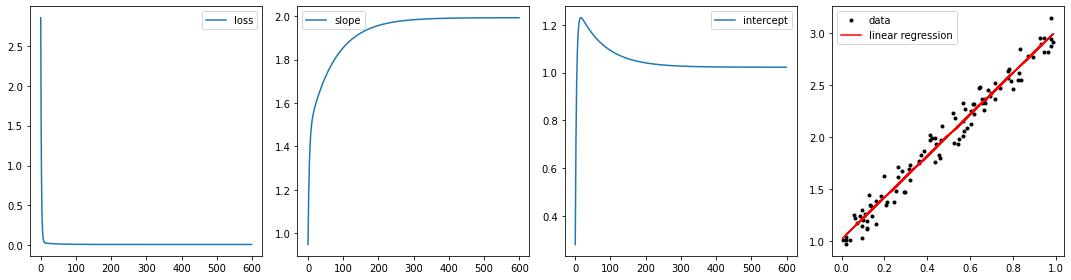

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import torch
import torch.nn as nn
import torch.nn.functional as F

def load_data():
    x = np.random.uniform(size=(100,1))
    y = 1 + 2*x + np.random.normal(scale=0.1,size=(100,1))
    
    inputs = torch.tensor(x, dtype=torch.float32) # (100, 1)
    targets = torch.tensor(y, dtype=torch.float32) # (100, 1)
        
    return inputs, targets

class Model(nn.Module):        
        
    def __init__(self, inputs, targets):
        super().__init__()
        self.inputs = inputs
        self.targets = targets
        
        self.linear = nn.Linear(in_features=1, out_features=1)
        self.loss = F.mse_loss
            
    def fit(self, epochs, lr, opt_func=torch.optim.SGD):
        opt = opt_func(self.parameters(), lr)

        w_trace = []
        b_trace = []
        loss_trace = []
        for i in range(epochs):
            preds = self(self.inputs) # 1. Generate predictions
            loss = self.loss(preds, self.targets) # 2. Calculate loss
            loss.backward() # 3. Compute gradients
            opt.step() # 4. Update parameters using gradients
            opt.zero_grad() # 5. Reset the gradients to zero

            w_trace.append(self.linear.weight.item())
            b_trace.append(self.linear.bias.item())
            loss_trace.append(loss.item())

        return {"w_trace": w_trace, "b_trace": b_trace, "loss_trace": loss_trace}
    
    def forward(self, xb):
        xb = xb.view((-1, 1))
        return self.linear(xb)
    
def main():
    inputs, targets = load_data() 
    
    model = Model(inputs, targets)
    history = model.fit(epochs=600, lr=1e-1, opt_func=torch.optim.SGD)

    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4,figsize=(15,4))
    ax0.plot(history["loss_trace"],label="loss")
    ax1.plot(history["w_trace"],label="slope")
    ax2.plot(history["b_trace"],label="intercept")
    ax3.plot(inputs,targets,'k.',label="data")
    ax3.plot(inputs,model(inputs).detach().numpy(),'r-',label="linear regression")
    for ax in (ax0, ax1, ax2, ax3):
        ax.legend()
    plt.tight_layout()
    plt.show()

    
if __name__ == "__main__":
    main()

######Linear Regression with DataLoader

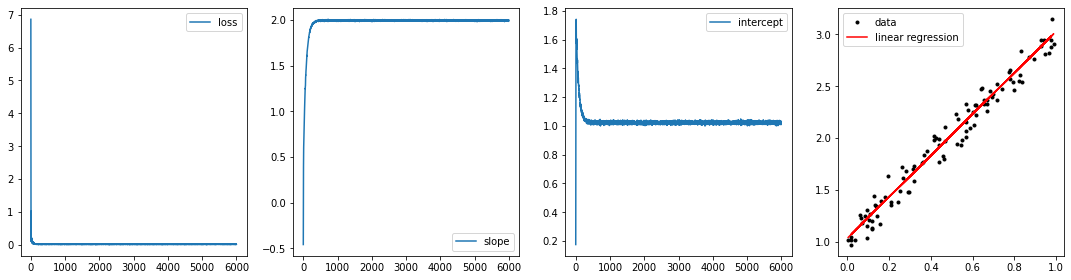

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

def load_data():
    x = np.random.uniform(size=(100,1))
    y = 1 + 2*x + np.random.normal(scale=0.1,size=(100,1))
    
    inputs = torch.tensor(x, dtype=torch.float32) # (100, 1)
    targets = torch.tensor(y, dtype=torch.float32) # (100, 1)
    
    dataset = TensorDataset(inputs, targets)
    
    batch_size = 10
    dataloader = DataLoader(dataset, batch_size, shuffle=True)
        
    return inputs, targets, dataloader

class Model(nn.Module):        
        
    def __init__(self, dataloader):
        super().__init__()
        self.dataloader = dataloader
        
        self.linear = nn.Linear(in_features=1, out_features=1)
        self.loss = F.mse_loss
            
    def fit(self, epochs, lr, opt_func=torch.optim.SGD):
        opt = opt_func(self.parameters(), lr)

        w_trace = []
        b_trace = []
        loss_trace = []
        for i in range(epochs):
            for inputs, targets in self.dataloader:
                preds = self(inputs) # 1. Generate predictions
                loss = self.loss(preds, targets) # 2. Calculate loss
                loss.backward() # 3. Compute gradients
                opt.step() # 4. Update parameters using gradients
                opt.zero_grad() # 5. Reset the gradients to zero

                w_trace.append(self.linear.weight.item())
                b_trace.append(self.linear.bias.item())
                loss_trace.append(loss.item())

        return {"w_trace": w_trace, "b_trace": b_trace, "loss_trace": loss_trace}
    
    def forward(self, xb):
        xb = xb.view((-1, 1))
        return self.linear(xb)
    
def main():
    inputs, targets, dataloader = load_data() 
    
    model = Model(dataloader)
    history = model.fit(epochs=600, lr=1e-1, opt_func=torch.optim.SGD)

    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4,figsize=(15,4))
    ax0.plot(history["loss_trace"],label="loss")
    ax1.plot(history["w_trace"],label="slope")
    ax2.plot(history["b_trace"],label="intercept")
    ax3.plot(inputs,targets,'k.',label="data")
    ax3.plot(inputs,model(inputs).detach().numpy(),'r-',label="linear regression")
    for ax in (ax0, ax1, ax2, ax3):
        ax.legend()
    plt.tight_layout()
    plt.show()
    
if __name__ == "__main__":
    main()

######Linear Regression with Multiple Outputs

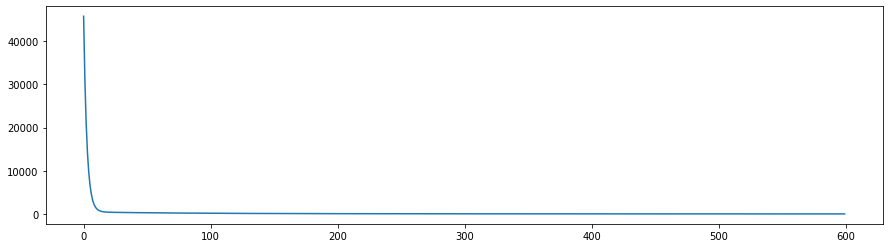

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import torch

def load_data():
    inputs = np.array([[73, 67, 43], 
                       [91, 88, 64], 
                       [87, 134, 58], 
                       [102, 43, 37], 
                       [69, 96, 70]], dtype=np.float32) # (5, 3)
    targets = np.array([[56, 70],
                        [81, 101],
                        [119, 133],
                        [22, 37],
                        [103, 119]], dtype=np.float32) # (5, 2)
    
    inputs = torch.from_numpy(inputs)
    targets = torch.from_numpy(targets)
    
    return inputs, targets

def model(x, w, b):
    return x @ w.t() + b # (5, 3) @ (3, 2) + (2,) = (5, 2)

def mse(preds, targets):
    return torch.sum((preds-targets)**2) / targets.numel()

def main():
    # load data
    inputs, targets = load_data()
    
    # weight initialization
    w = torch.randn((2, 3), requires_grad=True) # (2, 3)
    b = torch.randn((2,), requires_grad=True) # (2,)
    
    # train
    loss_trace = []
    for i in range(600):
        preds = model(inputs, w, b) # (5, 2)
        loss = mse(preds, targets) # ()
        loss_trace.append(loss.item())
        
        loss.backward()
        with torch.no_grad():
            w -= w.grad * 1e-5
            b -= b.grad * 1e-5
            w.grad.zero_()
            b.grad.zero_()

    fig, ax = plt.subplots(figsize=(15,4))
    ax.plot(loss_trace)
    plt.show()
    
if __name__ == "__main__":
    main()

######Linear Regression with SPY and WMT

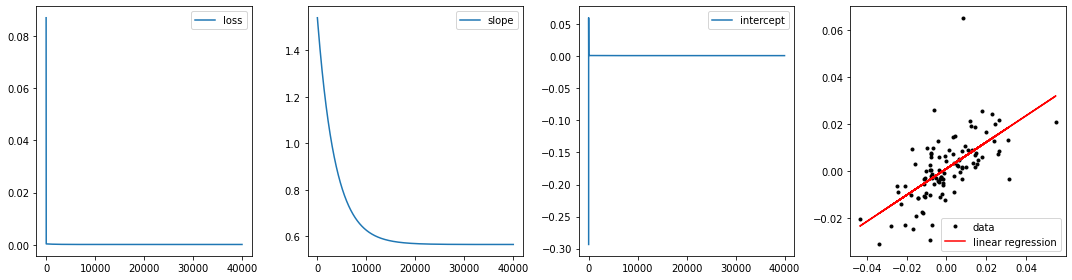

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import pandas as pd
import torch; torch.manual_seed(0)
import yfinance as yf


def load_data():
    df = yf.Ticker('SPY').history(period='max')
    df['return'] = df['Close'].pct_change()
    x = np.array(df['return'][-100:]).reshape((-1,1))

    dg = yf.Ticker('WMT').history(period='max')
    dg['return'] = dg['Close'].pct_change()
    y = np.array(dg['return'][-100:]).reshape((-1,1))
    
    inputs = torch.tensor(x, dtype=torch.float32) # (100, 1)
    targets = torch.tensor(y, dtype=torch.float32) # (100, 1)
        
    return inputs, targets


def initialize_weight():
    w = torch.randn((1,1), requires_grad=True) # (1,1)
    b = torch.randn((1,1), requires_grad=True) # (1,1)
    return w, b


def train(inputs, targets, w, b, epochs=40_000, lr=6e-1):
    w_trace = []
    b_trace = []
    loss_trace = []
    for _ in range(epochs):
        preds = model(inputs, w, b) # (100, 1)
        loss = mse(preds, targets) # ()
        w_trace.append(w.item())
        b_trace.append(b.item())
        loss_trace.append(loss.item())

        loss.backward()
        with torch.no_grad():
            w -= w.grad * lr
            b -= b.grad * lr
            w.grad.zero_()
            b.grad.zero_()
            
    return w, b, w_trace, b_trace, loss_trace 


def model(inputs, w, b):
    return inputs * w + b # (100, 1) * (1,1) + (1,1) = (100, 1)


def mse(preds, targets):
    return torch.sum((preds-targets)**2) / targets.numel()


def main():
    inputs, targets = load_data()
    
    w, b = initialize_weight()
    
    w, b, w_trace, b_trace, loss_trace = train(inputs, targets, w, b) 

    preds = model(inputs, w, b)

    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4,figsize=(15,4))
    ax0.plot(loss_trace,label="loss")
    ax1.plot(w_trace,label="slope")
    ax2.plot(b_trace,label="intercept")
    ax3.plot(inputs,targets,'k.',label="data")
    ax3.plot(inputs,preds.detach().numpy(),'r-',label="linear regression")
    for ax in (ax0, ax1, ax2, ax3):
        ax.legend()
    plt.tight_layout()
    plt.show()
    
    
if __name__ == "__main__":
    main()

###***Chapter 7 CNN***

###### Multi-Layer Perceptron [beginner_source/basics/buildmodel_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/basics/buildmodel_tutorial.py)

In [ ]:
"""
Build the Neural Network
===================

Neural networks comprise of layers/modules that perform operations on data.
The `torch.nn <https://pytorch.org/docs/stable/nn.html>` namespace 
provides all the building blocks you need to
build your own neural network. 
Every module in PyTorch subclasses the 
`nn.Module <https://pytorch.org/docs/stable/generated/torch.nn.Module.html>`.
A neural network is a module itself that consists of other modules (layers). 
This nested structure allows for
building and managing complex architectures easily.

In the following sections, 
we'll build a neural network to classify images in the FashionMNIST dataset.
"""

import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


################################################################################
# Get Device for Training
# 
# We want to be able to train our model on a hardware accelerator like the GPU,
# if it is available. Let's check to see if
# `torch.cuda <https://pytorch.org/docs/stable/notes/cuda.html>` is available, 
# else we continue to use the CPU.
################################################################################

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

################################################################################
# Define the Class
# -------------------------
# We define our neural network by subclassing ``nn.Module``, and
# initialize the neural network layers in ``__init__``. Every ``nn.Module`` subclass implements
# the operations on input data in the ``forward`` method.
################################################################################

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

################################################################################
# We create an instance of ``NeuralNetwork``, and move it to the ``device``, and print
# its structure.
################################################################################

model = NeuralNetwork().to(device)
print(model)


################################################################################
# To use the model, we pass it the input data. This executes the model's ``forward``,
# along with some `background operations <https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866>`_.
# Do not call ``model.forward()`` directly!
#
# Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output.
# We get the prediction probabilities by passing it through an instance of the ``nn.Softmax`` module.
################################################################################

X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

################################################################################
# Model Layers
# 
#
# Let's break down the layers in the FashionMNIST model. To illustrate it, we
# will take a sample minibatch of 3 images of size 28x28 and see what happens to it as
# we pass it through the network.
################################################################################

input_image = torch.rand(3,28,28)
print(input_image.size())

################################################################################
# nn.Flatten
# 
# We initialize the `nn.Flatten  <https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html>`_
# layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values (
# the minibatch dimension (at dim=0) is maintained).
################################################################################

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

################################################################################
# nn.Linear
# 
# The `linear layer <https://pytorch.org/docs/stable/generated/torch.nn.Linear.html>`_
# is a module that applies a linear transformation on the input using its stored weights and biases.
################################################################################

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

################################################################################
# nn.ReLU
# 
# Non-linear activations are what create the complex mappings between the model's inputs and outputs.
# They are applied after linear transformations to introduce *nonlinearity*, helping neural networks
# learn a wide variety of phenomena.
#
# In this model, we use `nn.ReLU <https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html>`_ between our
# linear layers, but there's other activations to introduce non-linearity in your model.
################################################################################

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

################################################################################
# nn.Sequential
# 
# `nn.Sequential <https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html>`_ is an ordered
# container of modules. The data is passed through all the modules in the same order as defined. You can use
# sequential containers to put together a quick network like ``seq_modules``.
################################################################################

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

################################################################################
# nn.Softmax
# 
# The last linear layer of the neural network returns `logits` - raw values in [-\infty, \infty] - which are passed to the
# `nn.Softmax <https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html>`_ module. The logits are scaled to values
# [0, 1] representing the model's predicted probabilities for each class. ``dim`` parameter indicates the dimension along
# which the values must sum to 1.
################################################################################

softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)


################################################################################
# Model Parameters
# -------------------------
# Many layers inside a neural network are *parameterized*, i.e. have associated weights
# and biases that are optimized during training. Subclassing ``nn.Module`` automatically
# tracks all fields defined inside your model object, and makes all parameters
# accessible using your model's ``parameters()`` or ``named_parameters()`` methods.
#
# In this example, we iterate over each parameter, and print its size and a preview of its values.
################################################################################

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

################################################################################
# Further Reading
# 
# - `torch.nn API <https://pytorch.org/docs/stable/nn.html>`_
################################################################################

###### CNN Basics [beginner_source/blitz/neural_networks_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/blitz/neural_networks_tutorial.py)

In [ ]:
"""
Neural Networks
===============

Neural networks can be constructed using the ``torch.nn`` package.

Now that you had a glimpse of ``autograd``, ``nn`` depends on
``autograd`` to define models and differentiate them.
An ``nn.Module`` contains layers, and a method ``forward(input)`` that
returns the ``output``.

For example, look at this network that classifies digit images:

.. figure:: /_static/img/mnist.png
   :alt: convnet

   convnet

It is a simple feed-forward network. It takes the input, feeds it
through several layers one after the other, and then finally gives the
output.

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or
  weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:
  ``weight = weight - learning_rate * gradient``

Define the network
------------------

Let’s define this network:
"""
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

################################################################################
# You just have to define the ``forward`` function, and the ``backward``
# function (where gradients are computed) is automatically defined for you
# using ``autograd``.
# You can use any of the Tensor operations in the ``forward`` function.
#
# The learnable parameters of a model are returned by ``net.parameters()``
################################################################################

params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

################################################################################
# Let's try a random 32x32 input.
# Note: expected input size of this net (LeNet) is 32x32. To use this net on
# the MNIST dataset, please resize the images from the dataset to 32x32.
################################################################################

input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

################################################################################
# Zero the gradient buffers of all parameters and backprops with random
# gradients:
################################################################################

net.zero_grad()
out.backward(torch.randn(1, 10))

################################################################################
# .. note::
#
#     ``torch.nn`` only supports mini-batches. The entire ``torch.nn``
#     package only supports inputs that are a mini-batch of samples, and not
#     a single sample.
#
#     For example, ``nn.Conv2d`` will take in a 4D Tensor of
#     ``nSamples x nChannels x Height x Width``.
#
#     If you have a single sample, just use ``input.unsqueeze(0)`` to add
#     a fake batch dimension.
#
# Before proceeding further, let's recap all the classes you’ve seen so far.
#
# **Recap:**
#   -  ``torch.Tensor`` - A *multi-dimensional array* with support for autograd
#      operations like ``backward()``. Also *holds the gradient* w.r.t. the
#      tensor.
#   -  ``nn.Module`` - Neural network module. *Convenient way of
#      encapsulating parameters*, with helpers for moving them to GPU,
#      exporting, loading, etc.
#   -  ``nn.Parameter`` - A kind of Tensor, that is *automatically
#      registered as a parameter when assigned as an attribute to a*
#      ``Module``.
#   -  ``autograd.Function`` - Implements *forward and backward definitions
#      of an autograd operation*. Every ``Tensor`` operation creates at
#      least a single ``Function`` node that connects to functions that
#      created a ``Tensor`` and *encodes its history*.
#
# **At this point, we covered:**
#   -  Defining a neural network
#   -  Processing inputs and calling backward
#
# **Still Left:**
#   -  Computing the loss
#   -  Updating the weights of the network
#
# Loss Function
# -------------
# A loss function takes the (output, target) pair of inputs, and computes a
# value that estimates how far away the output is from the target.
#
# There are several different
# `loss functions <https://pytorch.org/docs/nn.html#loss-functions>`_ under the
# nn package .
# A simple loss is: ``nn.MSELoss`` which computes the mean-squared error
# between the output and the target.
#
# For example:
################################################################################

output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

################################################################################
# Now, if you follow ``loss`` in the backward direction, using its
# ``.grad_fn`` attribute, you will see a graph of computations that looks
# like this:
#
# ::
#
#     input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
#           -> flatten -> linear -> relu -> linear -> relu -> linear
#           -> MSELoss
#           -> loss
#
# So, when we call ``loss.backward()``, the whole graph is differentiated
# w.r.t. the neural net parameters, and all Tensors in the graph that have
# ``requires_grad=True`` will have their ``.grad`` Tensor accumulated with the
# gradient.
#
# For illustration, let us follow a few steps backward:
################################################################################

print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

################################################################################
# Backprop
# 
# To backpropagate the error all we have to do is to ``loss.backward()``.
# You need to clear the existing gradients though, else gradients will be
# accumulated to existing gradients.
#
# Now we shall call ``loss.backward()``, and have a look at conv1's bias
# gradients before and after the backward.
################################################################################

net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

################################################################################
# Now, we have seen how to use loss functions.
#
# **Read Later:**
#
#   The neural network package contains various modules and loss functions
#   that form the building blocks of deep neural networks. A full list with
#   documentation is `here <https://pytorch.org/docs/nn>`_.
#
# **The only thing left to learn is:**
#
#   - Updating the weights of the network
#
# Update the weights
# ------------------
# The simplest update rule used in practice is the Stochastic Gradient
# Descent (SGD):
#
#      ``weight = weight - learning_rate * gradient``
#
# We can implement this using simple Python code:
#
# .. code:: python
#
#     learning_rate = 0.01
#     for f in net.parameters():
#         f.data.sub_(f.grad.data * learning_rate)
#
# However, as you use neural networks, you want to use various different
# update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc.
# To enable this, we built a small package: ``torch.optim`` that
# implements all these methods. Using it is very simple:
################################################################################

import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

################################################################################
# .. Note::
#
#       Observe how gradient buffers had to be manually set to zero using
#       ``optimizer.zero_grad()``. This is because gradients are accumulated
#       as explained in the `Backprop`_ section.
################################################################################

###### CNN - CIFAR10 [beginner_source/introyt/introyt1_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/introyt/introyt1_tutorial.py) [english](https://www.youtube.com/watch?v=IC0_FRiX-sw)

<img src="https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg">

Sorce [LeNet-5 - A Classic CNN Architecture](https://www.datasciencecentral.com/lenet-5-a-classic-cnn-architecture/)

In [ ]:
"""
Introduction to PyTorch

Follow along with the video below or on 
`youtube <https://www.youtube.com/watch?v=IC0_FRiX-sw>`.
"""

import torch

################################################################################
# Let’s see a few basic tensor manipulations. 
# First, just a few of the ways to create tensors:
################################################################################ 

z = torch.zeros(5, 3)
print(z)
print(z.dtype)

################################################################################
# Above, we create a 5x3 matrix filled with zeros, 
# and query its datatype to find out that 
# the zeros are 32-bit floating point numbers, which is the default PyTorch.
# 
# What if you wanted integers instead? 
# You can always override the default:
################################################################################

i = torch.ones((5, 3), dtype=torch.int16)
print(i)

################################################################################
# You can see that when we do change the default, 
# the tensor helpfully reports this when printed.
# 
# It’s common to initialize learning weights randomly, 
# often with a specific seed for the PRNG for reproducibility of results:
################################################################################

torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3) # repeats values of r1 because of re-seed

################################################################################
# PyTorch tensors perform arithmetic operations intuitively. 
# Tensors of similar shapes may be added, multiplied, etc. 
# Operations with scalars are distributed over the tensor:
################################################################################ 

ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# uncomment this line to get a runtime error
# r3 = r1 + r2

################################################################################
# Here’s a small sample of the mathematical operations available:
################################################################################

r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

################################################################################
# There’s a good deal more to know about the power of PyTorch tensors,
# including how to set them up for parallel computations on GPU - 
# we’ll be going into more depth in another video.
# 
# PyTorch Models
#
# Follow along with the video beginning at `10:00 
# <https://www.youtube.com/watch?v=IC0_FRiX-sw&t=600s>`.
#
# Let’s talk about how we can express models in PyTorch
################################################################################

import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

################################################################################
# .. figure:: /_static/img/mnist.png
#    :alt: le-net-5 diagram
#
# *Figure: LeNet-5*
# 
# Above is a diagram of LeNet-5, 
# one of the earliest convolutional neural nets, and 
# one of the drivers of the explosion in Deep Learning. 
# It was built to read small images of handwritten numbers (the MNIST dataset),
# and correctly classify which digit was represented in the image.
# 
# Here’s the abridged version of how it works:
# 
# -  Layer C1 is a convolutional layer, meaning that  
#    it scans the input image for features it learned during training.
#    It outputs a map of where it saw each of its learned features in the image.
#    This “activation map” is downsampled in layer S2.
# -  Layer C3 is another convolutional layer, 
#    this time scanning C1’s activation map for *combinations* of features. 
#    It also puts out an activation map describing 
#    the spatial locations of these feature combinations, 
#    which is downsampled in layer S4.
# -  Finally, the fully-connected layers at the end, F5, F6, and OUTPUT,
#    are a *classifier* that takes the final activation map, and
#    classifies it into one of ten bins representing the 10 digits.
# 
# How do we express this simple neural network in code?
################################################################################

class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white)
        # 6 output channels
        # 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


################################################################################
# Looking over this code, you should be able to spot 
# some structural similarities with the diagram above.
# 
# This demonstrates the structure of a typical PyTorch model: 
#
# -  It inherits from ``torch.nn.Module`` 
#    - modules may be nested -  
#    in fact, even the ``Conv2d`` and ``Linear`` layer classes inherit 
#    from ``torch.nn.Module``.
# -  A model will have an ``__init__()`` function, 
#    where it instantiates its layers, and 
#    loads any data artifacts it might need 
#    (e.g., an NLP model might load a vocabulary).
# -  A model will have a ``forward()`` function. 
#    This is where the actual computation happens: 
#    An input is passed through the network layers and various functions 
#    to generate an output.
# -  Other than that, 
#    you can build out your model class like any other Python class, 
#    adding whatever properties and methods you need to 
#    support your model’s computation.
# 
# Let’s instantiate this object and run a sample input through it.
################################################################################

net = LeNet()
print(net)                         # what does the object tell us about itself?

input = torch.rand(1, 1, 32, 32)   # stand-in for a 32x32 black & white image
print('\nImage batch shape:')
print(input.shape)

output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

################################################################################
# There are a few important things happening above:
# 
# First, we instantiate the ``LeNet`` class, and we print the ``net`` object.  
# A subclass of ``torch.nn.Module`` will report 
# the layers it has created and their shapes and parameters. 
# This can provide a handy overview of a model 
# if you want to get the gist of its processing.
# 
# Below that, 
# we create a dummy input representing a 32x32 image with 1 color channel. 
# Normally, you would load an image tile and 
# convert it to a tensor of this shape.
# 
# You may have noticed 
# an extra dimension to our tensor - the *batch dimension.* 
# PyTorch models assume they are working on *batches* of data
# - for example, 
# a batch of 16 of our image tiles would have the shape ``(16, 1, 32, 32)``. 
# Since we’re only using one image, 
# we create a batch of 1 with shape ``(1, 1, 32, 32)``.
# 
# We ask the model for an inference by calling it like a function:
# ``net(input)``. 
# The output of this call represents 
# the model’s confidence that the input represents a particular digit. 
# (Since this instance of the model hasn’t learned anything yet, 
# we shouldn’t expect to see any signal in the output.) 
# Looking at the shape of ``output``, 
# we can see that it also has a batch dimension, 
# the size of which should always match the input batch dimension. 
# If we had passed in an input batch of 16 instances, 
# ``output`` would have a shape of ``(16, 10)``.
################################################################################

################################################################################
# Datasets and Dataloaders
#
# Follow along with the video beginning at 
# `14:00 <https://www.youtube.com/watch?v=IC0_FRiX-sw&t=840s>`.
#
# Below, we’re going to demonstrate using one of the ready-to-download,
# open-access datasets from TorchVision, 
# how to transform the images for consumption by your model, and 
# how to use the DataLoader to feed batches of data to your model.
#
# The first thing we need to do is 
# transform our incoming images into a PyTorch tensor.
################################################################################

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

################################################################################
# Here, we specify two transformations for our input:
#
# -  ``transforms.ToTensor()`` 
#    converts images loaded by Pillow into PyTorch tensors.
# -  ``transforms.Normalize()`` 
#    adjusts the values of the tensor so that 
#    their average is zero and their standard deviation is 0.5. 
#    Most activation functions have their strongest gradients around x = 0, so
#    centering our data there can speed learning.
# 
# There are many more transforms available, including 
# cropping, centering,, rotation, and reflection.
# 
# Next, we’ll create an instance of the CIFAR10 dataset. 
# This is a set of 32x32 color image tiles representing 10 classes of objects: 
# 6 of animals (bird, cat, deer, dog, frog, horse) and 
# 4 of vehicles (airplane, automobile, ship, truck):
################################################################################

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

################################################################################
# .. note::
#      When you run the cell above, it may take a little time  
#      for the dataset to download.
# 
# This is an example of creating a dataset object in PyTorch. 
# Downloadable datasets (like CIFAR-10 above) are 
# subclasses of ``torch.utils.data.Dataset``. 
# ``Dataset`` classes in PyTorch include the downloadable datasets 
# in TorchVision, Torchtext, and TorchAudio, as well as  
# utility dataset classes such as ``torchvision.datasets.ImageFolder``,
# which will read a folder of labeled images. 
# You can also create your own subclasses of ``Dataset``.
# 
# When we instantiate our dataset, we need to tell it a few things:
#
# -  The filesystem path to where we want the data to go. 
# -  Whether or not we are using this set for training; 
#    most datasets will be split into training and test subsets.
# -  Whether we would like to download the dataset if we haven’t already.
# -  The transformations we want to apply to the data.
# 
# Once your dataset is ready, you can give it to the ``DataLoader``:
################################################################################

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

################################################################################
# A ``Dataset`` subclass wraps access to the data, and 
# is specialized to the type of data it’s serving. 
# The ``DataLoader`` knows *nothing* about the data, but 
# organizes the input tensors served by the ``Dataset`` 
# into batches with the parameters you specify.
# 
# In the example above, 
# we’ve asked a ``DataLoader`` to give us batches of 4 images from ``trainset``, 
# randomizing their order (``shuffle=True``),
# and we told it to spin up two workers to load data from disk.
# 
# It’s good practice to visualize the batches your ``DataLoader`` serves:
################################################################################

import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

################################################################################
# Running the above cell should show you a strip of four images, 
# and the correct label for each.
################################################################################

################################################################################
# Training Your PyTorch Model
#
# Follow along with the video beginning at 
# `17:10 <https://www.youtube.com/watch?v=IC0_FRiX-sw&t=1030s>`.
#
# Let’s put all the pieces together, and train a model:
################################################################################

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

################################################################################
# First, we’ll need training and test datasets. 
# If you haven’t already, run the cell below 
# to make sure the dataset is downloaded. (It may take a minute.)
################################################################################

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

################################################################################
# We’ll run our check on the output from ``DataLoader``:
################################################################################

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

################################################################################
# This is the model we’ll train. 
# If it looks familiar, that’s because it’s a variant of LeNet 
# - discussed earlier in this video - adapted for 3-color images.
################################################################################ 

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

################################################################################
# The last ingredients we need are a loss function and an optimizer:
################################################################################

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

################################################################################
# The loss function, as discussed earlier in this video, is a measure of
# how far from our ideal output the model’s prediction was. 
# Cross-entropy loss is 
# a typical loss function for classification models like ours.
# 
# The **optimizer** is what drives the learning. 
# Here we have created an optimizer that implements 
# *stochastic gradient descent,* 
# one of the more straightforward optimization algorithms. 
# Besides parameters of the algorithm, 
# like the learning rate (``lr``) and momentum, 
# we also pass in ``net.parameters()``, 
# which is a collection of all the learning weights in the model 
# - which is what the optimizer adjusts.
# 
# Finally, all of this is assembled into the training loop. 
# Go ahead and run this cell, 
# as it will likely take a few minutes to execute:
################################################################################ 

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

################################################################################
# Here, we are doing only **2 training epochs** (line 1) 
# - that is, two passes over the training dataset. 
# Each pass has an inner loop that **iterates over the training data** (line 4), 
# serving batches of transformed input images and their correct labels.
# 
# **Zeroing the gradients** (line 9) is an important step. 
# Gradients are accumulated over a batch; 
# if we do not reset them for every batch, they will keep accumulating, 
# which will provide incorrect gradient values, making learning impossible.
# 
# In line 12, we **ask the model for its predictions** on this batch. 
# In the following line (13), we compute the loss 
# - the difference between
# ``outputs`` (the model prediction) and ``labels`` (the correct output).
# 
# In line 14, we do the ``backward()`` pass, 
# and calculate the gradients that will direct the learning.
# 
# In line 15, the optimizer performs one learning step 
# - it uses the gradients from the ``backward()`` call 
# to nudge the learning weights 
# in the direction it thinks will reduce the loss.
# 
# The remainder of the loop does some light reporting on the epoch number,
# how many training instances have been completed, and 
# what the collected loss is over the training loop.
# 
# **When you run the cell above,** you should see something like this:
# 
# ::
# 
#    [1,  2000] loss: 2.235
#    [1,  4000] loss: 1.940
#    [1,  6000] loss: 1.713
#    [1,  8000] loss: 1.573
#    [1, 10000] loss: 1.507
#    [1, 12000] loss: 1.442
#    [2,  2000] loss: 1.378
#    [2,  4000] loss: 1.364
#    [2,  6000] loss: 1.349
#    [2,  8000] loss: 1.319
#    [2, 10000] loss: 1.284
#    [2, 12000] loss: 1.267
#    Finished Training
# 
# Note that the loss is monotonically descending, 
# indicating that our model is continuing to 
# improve its performance on the training dataset.
# 
# As a final step, 
# we should check that the model is actually doing *general* learning, 
# and not simply “memorizing” the dataset. 
# This is called **overfitting,** and 
# usually indicates that the dataset is 
# too small (not enough examples for general learning), or that 
# the model has more learning parameters than it needs 
# to correctly model the dataset.
# 
# This is the reason datasets are split into training and test subsets -
# to test the generality of the model, 
# we ask it to make predictions on data it hasn’t trained on:
################################################################################ 

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

################################################################################
# If you followed along, 
# you should see that the model is roughly 50% accurate at this point. 
# That’s not exactly state-of-the-art, but it’s
# far better than the 10% accuracy we’d expect from a random output. 
# This demonstrates that some general learning did happen in the model.
################################################################################

###### CNN - CIFAR10 [beginner_source/blitz/cifar10_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/blitz/cifar10_tutorial.py)

In [ ]:
"""
Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
ImageNet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Load and normalize CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.
"""
import torch
import torchvision
import torchvision.transforms as transforms

################################################################################
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].
################################################################################

################################################################################
# .. note::
#     If running on Windows and you get a BrokenPipeError, try setting
#     the num_worker of torch.utils.data.DataLoader() to 0.
################################################################################

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

################################################################################
# Let us show some of the training images, for fun.
################################################################################

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

################################################################################
# 2. Define a Convolutional Neural Network
# 
# Copy the neural network from the Neural Networks section before and modify it to
# take 3-channel images (instead of 1-channel images as it was defined).
################################################################################

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

################################################################################
# 3. Define a Loss function and optimizer
# 
# Let's use a Classification Cross-Entropy loss and SGD with momentum.
################################################################################

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

################################################################################
# 4. Train the network
#
# This is when things start to get interesting.
# We simply have to loop over our data iterator, and feed the inputs to the
# network and optimize.
################################################################################

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

################################################################################
# Let's quickly save our trained model:
################################################################################

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

################################################################################
# See `here <https://pytorch.org/docs/stable/notes/serialization.html>`_
# for more details on saving PyTorch models.
#
# 5. Test the network on the test data
#
# We have trained the network for 2 passes over the training dataset.
# But we need to check if the network has learnt anything at all.
#
# We will check this by predicting the class label that the neural network
# outputs, and checking it against the ground-truth. If the prediction is
# correct, we add the sample to the list of correct predictions.
#
# Okay, first step. Let us display an image from the test set to get familiar.
################################################################################

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

################################################################################
# Next, let's load back in our saved model (note: saving and re-loading the model
# wasn't necessary here, we only did it to illustrate how to do so):
################################################################################

net = Net()
net.load_state_dict(torch.load(PATH))

################################################################################
# Okay, now let us see what the neural network thinks these examples above are:
################################################################################

outputs = net(images)

################################################################################
# The outputs are energies for the 10 classes.
# The higher the energy for a class, the more the network
# thinks that the image is of the particular class.
# So, let's get the index of the highest energy:
################################################################################

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

################################################################################
# The results seem pretty good.
#
# Let us look at how the network performs on the whole dataset.
################################################################################

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

################################################################################
# That looks way better than chance, which is 10% accuracy (randomly picking
# a class out of 10 classes).
# Seems like the network learnt something.
#
# Hmmm, what are the classes that performed well, and the classes that did
# not perform well:
################################################################################

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

################################################################################
# Okay, so what next?
#
# How do we run these neural networks on the GPU?
#
# Training on GPU
# ----------------
# Just like how you transfer a Tensor onto the GPU, you transfer the neural
# net onto the GPU.
#
# Let's first define our device as the first visible cuda device if we have
# CUDA available:
################################################################################

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

################################################################################
# The rest of this section assumes that ``device`` is a CUDA device.
#
# Then these methods will recursively go over all modules and convert their
# parameters and buffers to CUDA tensors:
#
# .. code:: python
#
#     net.to(device)
#
#
# Remember that you will have to send the inputs and targets at every step
# to the GPU too:
#
# .. code:: python
#
#         inputs, labels = data[0].to(device), data[1].to(device)
#
# Why don't I notice MASSIVE speedup compared to CPU? Because your network
# is really small.
#
# **Exercise:** Try increasing the width of your network (argument 2 of
# the first ``nn.Conv2d``, and argument 1 of the second ``nn.Conv2d`` –
# they need to be the same number), see what kind of speedup you get.
#
# **Goals achieved**:
#
# - Understanding PyTorch's Tensor library and neural networks at a high level.
# - Train a small neural network to classify images
#
# Training on multiple GPUs
# -------------------------
# If you want to see even more MASSIVE speedup using all of your GPUs,
# please check out :doc:`data_parallel_tutorial`.
#
# Where do I go next?
# -------------------
#
# -  :doc:`Train neural nets to play video games </intermediate/reinforcement_q_learning>`
# -  `Train a state-of-the-art ResNet network on imagenet`_
# -  `Train a face generator using Generative Adversarial Networks`_
# -  `Train a word-level language model using Recurrent LSTM networks`_
# -  `More examples`_
# -  `More tutorials`_
# -  `Discuss PyTorch on the Forums`_
# -  `Chat with other users on Slack`_
#
# .. _Train a state-of-the-art ResNet network on imagenet: https://github.com/pytorch/examples/tree/master/imagenet
# .. _Train a face generator using Generative Adversarial Networks: https://github.com/pytorch/examples/tree/master/dcgan
# .. _Train a word-level language model using Recurrent LSTM networks: https://github.com/pytorch/examples/tree/master/word_language_model
# .. _More examples: https://github.com/pytorch/examples
# .. _More tutorials: https://github.com/pytorch/tutorials
# .. _Discuss PyTorch on the Forums: https://discuss.pytorch.org/
# .. _Chat with other users on Slack: https://pytorch.slack.com/messages/beginner/
################################################################################

###***Chapter 8 PCA to VAE***

###### PCA

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Epoch [0/10], Train Loss: 29.7318, Test Loss: 3.8384 *


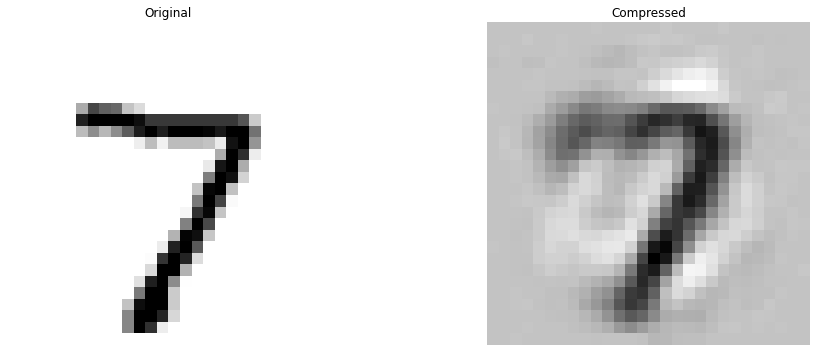

In [ ]:
import matplotlib.pyplot as plt
import torch; torch.manual_seed(0) 
from torch import nn, optim
from torchvision import datasets, models, transforms


def get_data():
    train_dataset = datasets.MNIST(root='../data', train=True, transform=transforms.ToTensor(), download=True)
    test_dataset = datasets.MNIST(root='../data', train=False, transform=transforms.ToTensor())

    batch_size = 64

    train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
    test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)
    return train_loader, test_loader 


class PCA_Class(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Linear(784, 20)
        self.decoder = nn.Linear(20, 784)
  
    def forward(self, x): # (64,1,28,28) or (64,28,28)
        out = x.view(x.size(0), -1) # (64,784)
        out = self.encoder(out) # (64,20)
        out = self.decoder(out) # (64,784)
        out = out.view(x.size()) # (64,1,28,28) or (64,28,28)
        return out
  
    def get_codes(self, x): # (64,1,28,28) or (64,28,28)
        out = x.view(x.size(0), -1) # (64,784)
        out = self.encoder(out) # (64,20)
        return out # (64,20)
    
    
def train(model, Loss, optimizer, num_epochs, train_loader, test_loader, device):
    train_loss_arr = []
    test_loss_arr = []

    best_test_loss = 99999999
    early_stop, early_stop_max = 0., 100.
    for epoch in range(num_epochs):
        
        epoch_loss = 0.
        for batch_X, _ in train_loader:
            batch_X = batch_X.to(device)
            optimizer.zero_grad()
            # Forward Pass
            model.train()
            outputs = model(batch_X)
            train_loss = Loss(outputs, batch_X)
            epoch_loss += train_loss.data
            # Backward and optimize
            train_loss.backward()
            optimizer.step()
        train_loss_arr.append(epoch_loss / len(train_loader.dataset))

        if epoch % 10 == 0:
            model.eval()
            test_loss = 0.
            for batch_X, _ in test_loader:
                batch_X = batch_X.to(device)
                # Forward Pass
                outputs = model(batch_X)
                batch_loss = Loss(outputs, batch_X)
                test_loss += batch_loss.data
            test_loss_arr.append(test_loss)

            if best_test_loss > test_loss:
                best_test_loss = test_loss
                early_stop = 0
                print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f} *'.format(epoch, num_epochs, epoch_loss, test_loss))
            else:
                early_stop += 1
                print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'.format(epoch, num_epochs, epoch_loss, test_loss))   

        if early_stop >= early_stop_max:
            break


def main():
    num_epochs = 10
    learning_rate = 0.01
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    train_loader, test_loader = get_data()
    
    AE = PCA_Class().to(device)
    AE_loss = nn.MSELoss()
    AE_optimizer = optim.Adam(AE.parameters(), lr=learning_rate)

    train(AE, AE_loss, AE_optimizer, num_epochs, train_loader, test_loader, device)

    for imgs, labels in test_loader:
        for img in imgs:
            
            fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,5))
    
            ax0.set_title("Original")
            ax0.imshow(img.squeeze(),cmap='binary')
    
            ax1.set_title("Compressed")
            img = img.to(device) 
            AE_img = AE(img).detach().cpu().numpy().reshape((28,28))
            ax1.imshow(AE_img,cmap='binary')

            for ax in (ax0, ax1):
                ax.axis('off')
    
            plt.tight_layout()
            plt.show()

            break
        break
    

if __name__ == "__main__":
    main()

###### AE - Linear and Conv2d [Auto Encoder (Pytorch)](https://chioni.github.io/posts/ae/)

Epoch [0/10], Train Loss: 0.8858, Test Loss: 0.2948 *
Epoch [0/10], Train Loss: 0.6430, Test Loss: 0.1168 *


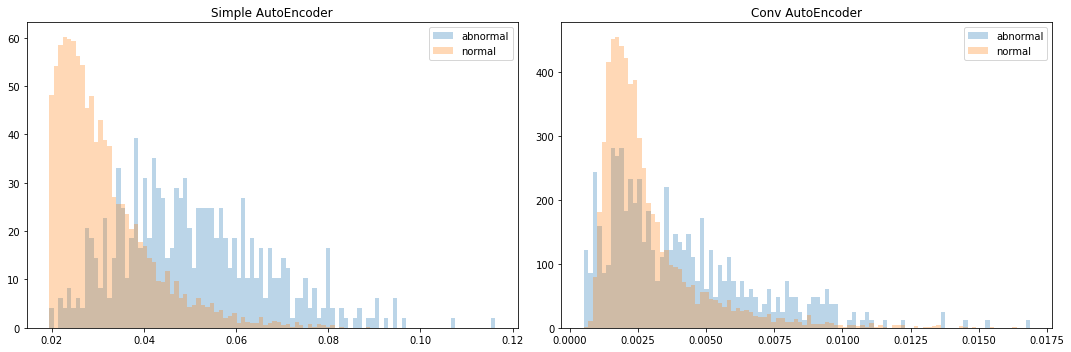

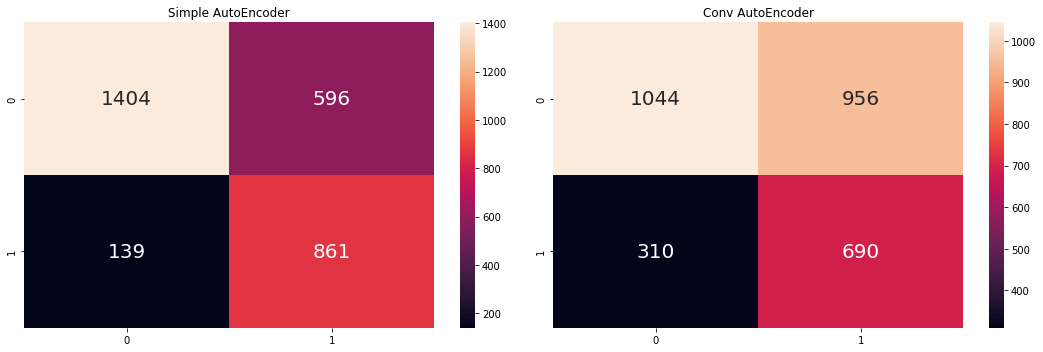

In [ ]:
# Source
# https://chioni.github.io/posts/ae/
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch; torch.manual_seed(0) 
import torch.nn.functional as F
from random import sample
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from torch import nn, optim
from torchvision import datasets, models, transforms


def get_data():
    train_dataset = datasets.MNIST(root='../data', train=True, transform=transforms.ToTensor(), download=True)
    test_dataset = datasets.MNIST(root='../data', train=False, transform=transforms.ToTensor())

    total_dataset = torch.utils.data.ConcatDataset([train_dataset, test_dataset])


    # 데이터 중에서 5인 것과 아닌 것을 구별하자
    normal_dataset = sample([total_dataset.__getitem__(idx) for idx in range(len(total_dataset)) 
                      if total_dataset.__getitem__(idx)[1] == 5], 6000)

    anomal_dataset = sample([total_dataset.__getitem__(idx) for idx in range(len(total_dataset))
                       if total_dataset.__getitem__(idx)[1] != 5], 1500)


    # 모델을 학습할 때 완전히 5인 것만 학습하지 않고 다른 라벨도 조금 섞어줘서 semi-supervised하게 모델을 학습해주자
    train_size, test_size = 5000, 500

    train_dataset = normal_dataset[:train_size]
    normal_train = train_dataset 
    anomal_train = anomal_dataset[:test_size]
    train_dataset.extend(anomal_train)

    test_dataset = normal_dataset[train_size:]
    normal_test = test_dataset 
    anomal_test = anomal_dataset[test_size:]
    test_dataset.extend(anomal_test)

    batch_size = 512

    train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
    test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)
    return train_loader, test_loader, normal_train, anomal_train, normal_test, anomal_test  


class AutoEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2):
        super().__init__()

        self.encoder = nn.Sequential(
          nn.Linear(input_dim, hidden_dim1),
          nn.ReLU(),
          nn.Linear(hidden_dim1, hidden_dim2),
          nn.ReLU()
        )

        self.decoder = nn.Sequential(
          nn.Linear(hidden_dim2, hidden_dim1),
          nn.ReLU(),
          nn.Linear(hidden_dim1, input_dim),
          nn.ReLU()
        )
  
    def forward(self, x):
        out = x.view(x.size(0), -1)
        out = self.encoder(out)
        out = self.decoder(out)
        out = out.view(x.size())
        return out
  
    def get_codes(self, x):
        return self.encoder(x)

    
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
          nn.Conv2d(1, 3, kernel_size = 5),
          nn.ReLU(),
          nn.Conv2d(3, 5, kernel_size = 5),
          nn.ReLU()
        )

        self.decoder = nn.Sequential(
          nn.ConvTranspose2d(5, 3, kernel_size = 5),
          nn.ReLU(),
          nn.ConvTranspose2d(3, 1, kernel_size = 5),
          nn.ReLU()
        )
    
    def forward(self, x):
        out = self.encoder(x)
        out = self.decoder(out)
        return out

    def get_codes(self, x):
        return self.encoder(x)
    
    
def train(model, Loss, optimizer, num_epochs, train_loader, test_loader, device):
    train_loss_arr = []
    test_loss_arr = []

    best_test_loss = 99999999
    early_stop, early_stop_max = 0., 100.
    for epoch in range(num_epochs):
        
        epoch_loss = 0.
        for batch_X, _ in train_loader:
            batch_X = batch_X.to(device)
            optimizer.zero_grad()
            # Forward Pass
            model.train()
            outputs = model(batch_X)
            train_loss = Loss(outputs, batch_X)
            epoch_loss += train_loss.data
            # Backward and optimize
            train_loss.backward()
            optimizer.step()
        train_loss_arr.append(epoch_loss / len(train_loader.dataset))

        if epoch % 10 == 0:
            model.eval()
            test_loss = 0.
            for batch_X, _ in test_loader:
                batch_X = batch_X.to(device)
                # Forward Pass
                outputs = model(batch_X)
                batch_loss = Loss(outputs, batch_X)
                test_loss += batch_loss.data
            test_loss_arr.append(test_loss)

            if best_test_loss > test_loss:
                best_test_loss = test_loss
                early_stop = 0
                print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f} *'.format(epoch, num_epochs, epoch_loss, test_loss))
            else:
                early_stop += 1
                print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'.format(epoch, num_epochs, epoch_loss, test_loss))   

        if early_stop >= early_stop_max:
            break


def main():
    num_epochs = 10
    learning_rate = 0.01
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    train_loader, test_loader, normal_train, anomal_train, normal_test, anomal_test = get_data()
    
    AE = AutoEncoder(28 * 28, 64, 32).to(device)
    AE_loss = nn.MSELoss()
    AE_optimizer = optim.Adam(AE.parameters(), lr=learning_rate)

    CAE = ConvAutoEncoder().to(device)
    CAE_loss = nn.MSELoss()
    CAE_optimizer = optim.Adam(CAE.parameters(), lr=learning_rate)

    train(AE, AE_loss, AE_optimizer, num_epochs, train_loader, test_loader, device)
    train(CAE, CAE_loss, CAE_optimizer, num_epochs, train_loader, test_loader, device)
    
    AE_normal, AE_anomal = [], []
    CAE_normal,CAE_anomal = [], []
    for X, _ in normal_train:
        X = X.to(device)
        # Forward Pass
        AE_output = AE(X)
        CAE_output = CAE(X.view((1,1,28,28)))
        if _ == 5: 
            AE_normal.append(AE_loss(AE_output, X).item())
            CAE_normal.append(CAE_loss(CAE_output.view(1,28,28), X).item())
        else: 
            AE_anomal.append(AE_loss(AE_output, X).item())
            CAE_anomal.append(CAE_loss(CAE_output.view(1,28,28), X).item())
            
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,5))
    
    ax0.set_title("Simple AutoEncoder")
    _, bins, _ = ax0.hist(AE_anomal, bins=100, density=True, label='abnormal', alpha=0.3)
    ax0.hist(AE_normal, bins=bins, density=True, label='normal', alpha=0.3)
    
    ax1.set_title("Conv AutoEncoder")
    _, bins, _ = ax1.hist(CAE_anomal, bins=100, density=True, label='abnormal', alpha=0.3)
    ax1.hist(CAE_normal, bins=bins, density=True, label='normal', alpha=0.3)
    
    for ax in (ax0, ax1):
        ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    y_true = []
    AE_y_pred, CAE_y_pred = [],[]
    for X, y in normal_test + anomal_test:
        X = X.to(device)
        # Forward Pass
        AE_output, CAE_output = AE(X), CAE(X.view((1,1,28,28)))
        if y == 5: 
            y_true.append(1)
        else: 
            y_true.append(0)
            
        if AE_loss(AE_output, X).item() < 0.04: 
            AE_y_pred.append(1)
        else: 
            AE_y_pred.append(0)
            
        if CAE_loss(CAE_output.view(1,28,28), X).item() < 0.003: 
            CAE_y_pred.append(1)
        else: 
            CAE_y_pred.append(0)  
    
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,5))
    
    ax0.set_title("Simple AutoEncoder")
    cm_AE = confusion_matrix(y_true, AE_y_pred, labels=[0, 1])
    sns.heatmap(cm_AE, annot=True, ax=ax0, fmt='d', annot_kws={"fontsize":20})

    ax1.set_title("Conv AutoEncoder")
    cm_CAE = confusion_matrix(y_true, CAE_y_pred, labels=[0, 1])
    sns.heatmap(cm_CAE, annot=True, ax=ax1, fmt='d', annot_kws={"fontsize":20})
    
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()

###### VAE [examples/blob/main/vae/main.py](https://github.com/pytorch/examples/blob/main/vae/main.py) [한국어 from AE to VAE 2022 11 03](https://www.youtube.com/watch?v=kUWj4rIoEkA&list=PLXziV1DL41oh1ruw4rplU04-rcz55zsrc&index=18) 

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image

################################################################################
# [How to call module written with argparse in iPython notebook](https://stackoverflow.com/questions/30656777/how-to-call-module-written-with-argparse-in-ipython-notebook)
# If all arguments have a default value, 
# then adding this to the top of the notebook should be enough:
#     import sys
#     sys.argv = ['']
################################################################################

import sys
sys.argv = ['']

################################################################################
# I need a directory called "results" to save image
################################################################################

import os
os.makedirs("results",exist_ok=True)

parser = argparse.ArgumentParser(description='VAE MNIST Example')
parser.add_argument('--batch-size', type=int, default=128, metavar='N',
                    help='input batch size for training (default: 128)')
parser.add_argument('--epochs', type=int, default=10, metavar='N',
                    help='number of epochs to train (default: 10)')
parser.add_argument('--no-cuda', action='store_true', default=False,
                    help='disables CUDA training')
parser.add_argument('--no-mps', action='store_true', default=False,
                        help='disables macOS GPU training')
parser.add_argument('--seed', type=int, default=1, metavar='S',
                    help='random seed (default: 1)')
parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                    help='how many batches to wait before logging training status')
args = parser.parse_args()
args.cuda = not args.no_cuda and torch.cuda.is_available()
use_mps = not args.no_mps and torch.backends.mps.is_available()

torch.manual_seed(args.seed)

if args.cuda:
    device = torch.device("cuda")
elif use_mps:
    device = torch.device("mps")
else:
    device = torch.device("cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if args.cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=args.batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=args.batch_size, shuffle=False, **kwargs)


class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(784, 400)
        self.fc21 = nn.Linear(400, 20)
        self.fc22 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, 784)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)


# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD


def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))


def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(args.batch_size, 1, 28, 28)[:n]])
                save_image(comparison.cpu(),
                         'results/reconstruction_' + str(epoch) + '.png', nrow=n)

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

if __name__ == "__main__":
    for epoch in range(1, args.epochs + 1):
        train(epoch)
        test(epoch)
        with torch.no_grad():
            sample = torch.randn(64, 20).to(device)
            sample = model.decode(sample).cpu()
            save_image(sample.view(64, 1, 28, 28),
                       'results/sample_' + str(epoch) + '.png')

Train Epoch: 1 [0/60000 (0%)]	Loss: 550.513916
Train Epoch: 1 [1280/60000 (2%)]	Loss: 310.610535
Train Epoch: 1 [2560/60000 (4%)]	Loss: 240.650162
Train Epoch: 1 [3840/60000 (6%)]	Loss: 219.223282
Train Epoch: 1 [5120/60000 (9%)]	Loss: 215.092834
Train Epoch: 1 [6400/60000 (11%)]	Loss: 208.450150
Train Epoch: 1 [7680/60000 (13%)]	Loss: 203.374252
Train Epoch: 1 [8960/60000 (15%)]	Loss: 193.761414
Train Epoch: 1 [10240/60000 (17%)]	Loss: 194.701691
Train Epoch: 1 [11520/60000 (19%)]	Loss: 192.943787
Train Epoch: 1 [12800/60000 (21%)]	Loss: 179.935974
Train Epoch: 1 [14080/60000 (23%)]	Loss: 174.059189
Train Epoch: 1 [15360/60000 (26%)]	Loss: 182.615845
Train Epoch: 1 [16640/60000 (28%)]	Loss: 168.166260
Train Epoch: 1 [17920/60000 (30%)]	Loss: 166.474884
Train Epoch: 1 [19200/60000 (32%)]	Loss: 161.468369
Train Epoch: 1 [20480/60000 (34%)]	Loss: 162.560242
Train Epoch: 1 [21760/60000 (36%)]	Loss: 151.492172
Train Epoch: 1 [23040/60000 (38%)]	Loss: 157.339233
Train Epoch: 1 [24320/60000 

###***Chapter 9 GAN***

###### DCGAN - CelebA [beginner_source/dcgan_faces_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/dcgan_faces_tutorial.py)

In [ ]:
# -*- coding: utf-8 -*-
"""
DCGAN Tutorial
==============

**Author**: `Nathan Inkawhich <https://github.com/inkawhich>`__

"""


######################################################################
# Introduction
# ------------
# 
# This tutorial will give an introduction to DCGANs through an example. We
# will train a generative adversarial network (GAN) to generate new
# celebrities after showing it pictures of many real celebrities. Most of
# the code here is from the dcgan implementation in
# `pytorch/examples <https://github.com/pytorch/examples>`__, and this
# document will give a thorough explanation of the implementation and shed
# light on how and why this model works. But don’t worry, no prior
# knowledge of GANs is required, but it may require a first-timer to spend
# some time reasoning about what is actually happening under the hood.
# Also, for the sake of time it will help to have a GPU, or two. Lets
# start from the beginning.
# 
# Generative Adversarial Networks
# -------------------------------
# 
# What is a GAN?
# ~~~~~~~~~~~~~~
# 
# GANs are a framework for teaching a DL model to capture the training
# data’s distribution so we can generate new data from that same
# distribution. GANs were invented by Ian Goodfellow in 2014 and first
# described in the paper `Generative Adversarial
# Nets <https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf>`__.
# They are made of two distinct models, a *generator* and a
# *discriminator*. The job of the generator is to spawn ‘fake’ images that
# look like the training images. The job of the discriminator is to look
# at an image and output whether or not it is a real training image or a
# fake image from the generator. During training, the generator is
# constantly trying to outsmart the discriminator by generating better and
# better fakes, while the discriminator is working to become a better
# detective and correctly classify the real and fake images. The
# equilibrium of this game is when the generator is generating perfect
# fakes that look as if they came directly from the training data, and the
# discriminator is left to always guess at 50% confidence that the
# generator output is real or fake.
# 
# Now, lets define some notation to be used throughout tutorial starting
# with the discriminator. Let :math:`x` be data representing an image.
# :math:`D(x)` is the discriminator network which outputs the (scalar)
# probability that :math:`x` came from training data rather than the
# generator. Here, since we are dealing with images, the input to
# :math:`D(x)` is an image of CHW size 3x64x64. Intuitively, :math:`D(x)`
# should be HIGH when :math:`x` comes from training data and LOW when
# :math:`x` comes from the generator. :math:`D(x)` can also be thought of
# as a traditional binary classifier.
# 
# For the generator’s notation, let :math:`z` be a latent space vector
# sampled from a standard normal distribution. :math:`G(z)` represents the
# generator function which maps the latent vector :math:`z` to data-space.
# The goal of :math:`G` is to estimate the distribution that the training
# data comes from (:math:`p_{data}`) so it can generate fake samples from
# that estimated distribution (:math:`p_g`).
# 
# So, :math:`D(G(z))` is the probability (scalar) that the output of the
# generator :math:`G` is a real image. As described in `Goodfellow’s
# paper <https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf>`__,
# :math:`D` and :math:`G` play a minimax game in which :math:`D` tries to
# maximize the probability it correctly classifies reals and fakes
# (:math:`logD(x)`), and :math:`G` tries to minimize the probability that
# :math:`D` will predict its outputs are fake (:math:`log(1-D(G(z)))`).
# From the paper, the GAN loss function is
# 
# .. math:: \underset{G}{\text{min}} \underset{D}{\text{max}}V(D,G) = \mathbb{E}_{x\sim p_{data}(x)}\big[logD(x)\big] + \mathbb{E}_{z\sim p_{z}(z)}\big[log(1-D(G(z)))\big]
# 
# In theory, the solution to this minimax game is where
# :math:`p_g = p_{data}`, and the discriminator guesses randomly if the
# inputs are real or fake. However, the convergence theory of GANs is
# still being actively researched and in reality models do not always
# train to this point.
# 
# What is a DCGAN?
# ~~~~~~~~~~~~~~~~
# 
# A DCGAN is a direct extension of the GAN described above, except that it
# explicitly uses convolutional and convolutional-transpose layers in the
# discriminator and generator, respectively. It was first described by
# Radford et. al. in the paper `Unsupervised Representation Learning With
# Deep Convolutional Generative Adversarial
# Networks <https://arxiv.org/pdf/1511.06434.pdf>`__. The discriminator
# is made up of strided
# `convolution <https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d>`__
# layers, `batch
# norm <https://pytorch.org/docs/stable/nn.html#torch.nn.BatchNorm2d>`__
# layers, and
# `LeakyReLU <https://pytorch.org/docs/stable/nn.html#torch.nn.LeakyReLU>`__
# activations. The input is a 3x64x64 input image and the output is a
# scalar probability that the input is from the real data distribution.
# The generator is comprised of
# `convolutional-transpose <https://pytorch.org/docs/stable/nn.html#torch.nn.ConvTranspose2d>`__
# layers, batch norm layers, and
# `ReLU <https://pytorch.org/docs/stable/nn.html#relu>`__ activations. The
# input is a latent vector, :math:`z`, that is drawn from a standard
# normal distribution and the output is a 3x64x64 RGB image. The strided
# conv-transpose layers allow the latent vector to be transformed into a
# volume with the same shape as an image. In the paper, the authors also
# give some tips about how to setup the optimizers, how to calculate the
# loss functions, and how to initialize the model weights, all of which
# will be explained in the coming sections.
# 

from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)


######################################################################
# Inputs
# ------
# 
# Let’s define some inputs for the run:
# 
# -  **dataroot** - the path to the root of the dataset folder. We will
#    talk more about the dataset in the next section
# -  **workers** - the number of worker threads for loading the data with
#    the DataLoader
# -  **batch_size** - the batch size used in training. The DCGAN paper
#    uses a batch size of 128
# -  **image_size** - the spatial size of the images used for training.
#    This implementation defaults to 64x64. If another size is desired,
#    the structures of D and G must be changed. See
#    `here <https://github.com/pytorch/examples/issues/70>`__ for more
#    details
# -  **nc** - number of color channels in the input images. For color
#    images this is 3
# -  **nz** - length of latent vector
# -  **ngf** - relates to the depth of feature maps carried through the
#    generator
# -  **ndf** - sets the depth of feature maps propagated through the
#    discriminator
# -  **num_epochs** - number of training epochs to run. Training for
#    longer will probably lead to better results but will also take much
#    longer
# -  **lr** - learning rate for training. As described in the DCGAN paper,
#    this number should be 0.0002
# -  **beta1** - beta1 hyperparameter for Adam optimizers. As described in
#    paper, this number should be 0.5
# -  **ngpu** - number of GPUs available. If this is 0, code will run in
#    CPU mode. If this number is greater than 0 it will run on that number
#    of GPUs
# 

# Root directory for dataset
dataroot = "data/celeba"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1


######################################################################
# Data
# ----
# 
# In this tutorial we will use the `Celeb-A Faces
# dataset <http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html>`__ which can
# be downloaded at the linked site, or in `Google
# Drive <https://drive.google.com/drive/folders/0B7EVK8r0v71pTUZsaXdaSnZBZzg>`__.
# The dataset will download as a file named *img_align_celeba.zip*. Once
# downloaded, create a directory named *celeba* and extract the zip file
# into that directory. Then, set the *dataroot* input for this notebook to
# the *celeba* directory you just created. The resulting directory
# structure should be:
# 
# ::
# 
#    /path/to/celeba
#        -> img_align_celeba  
#            -> 188242.jpg
#            -> 173822.jpg
#            -> 284702.jpg
#            -> 537394.jpg
#               ...
# 
# This is an important step because we will be using the ImageFolder
# dataset class, which requires there to be subdirectories in the
# dataset’s root folder. Now, we can create the dataset, create the
# dataloader, set the device to run on, and finally visualize some of the
# training data.
# 

# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))



######################################################################
# Implementation
# --------------
# 
# With our input parameters set and the dataset prepared, we can now get
# into the implementation. We will start with the weight initialization
# strategy, then talk about the generator, discriminator, loss functions,
# and training loop in detail.
# 
# Weight Initialization
# ~~~~~~~~~~~~~~~~~~~~~
# 
# From the DCGAN paper, the authors specify that all model weights shall
# be randomly initialized from a Normal distribution with mean=0,
# stdev=0.02. The ``weights_init`` function takes an initialized model as
# input and reinitializes all convolutional, convolutional-transpose, and
# batch normalization layers to meet this criteria. This function is
# applied to the models immediately after initialization.
# 

# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)


######################################################################
# Generator
# ~~~~~~~~~
# 
# The generator, :math:`G`, is designed to map the latent space vector
# (:math:`z`) to data-space. Since our data are images, converting
# :math:`z` to data-space means ultimately creating a RGB image with the
# same size as the training images (i.e. 3x64x64). In practice, this is
# accomplished through a series of strided two dimensional convolutional
# transpose layers, each paired with a 2d batch norm layer and a relu
# activation. The output of the generator is fed through a tanh function
# to return it to the input data range of :math:`[-1,1]`. It is worth
# noting the existence of the batch norm functions after the
# conv-transpose layers, as this is a critical contribution of the DCGAN
# paper. These layers help with the flow of gradients during training. An
# image of the generator from the DCGAN paper is shown below.
#
# .. figure:: /_static/img/dcgan_generator.png
#    :alt: dcgan_generator
#
# Notice, how the inputs we set in the input section (*nz*, *ngf*, and
# *nc*) influence the generator architecture in code. *nz* is the length
# of the z input vector, *ngf* relates to the size of the feature maps
# that are propagated through the generator, and *nc* is the number of
# channels in the output image (set to 3 for RGB images). Below is the
# code for the generator.
# 

# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)


######################################################################
# Now, we can instantiate the generator and apply the ``weights_init``
# function. Check out the printed model to see how the generator object is
# structured.
# 

# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.02.
netG.apply(weights_init)

# Print the model
print(netG)


######################################################################
# Discriminator
# ~~~~~~~~~~~~~
# 
# As mentioned, the discriminator, :math:`D`, is a binary classification
# network that takes an image as input and outputs a scalar probability
# that the input image is real (as opposed to fake). Here, :math:`D` takes
# a 3x64x64 input image, processes it through a series of Conv2d,
# BatchNorm2d, and LeakyReLU layers, and outputs the final probability
# through a Sigmoid activation function. This architecture can be extended
# with more layers if necessary for the problem, but there is significance
# to the use of the strided convolution, BatchNorm, and LeakyReLUs. The
# DCGAN paper mentions it is a good practice to use strided convolution
# rather than pooling to downsample because it lets the network learn its
# own pooling function. Also batch norm and leaky relu functions promote
# healthy gradient flow which is critical for the learning process of both
# :math:`G` and :math:`D`.
# 

#########################################################################
# Discriminator Code

class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


######################################################################
# Now, as with the generator, we can create the discriminator, apply the
# ``weights_init`` function, and print the model’s structure.
# 

# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))
    
# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)

# Print the model
print(netD)


######################################################################
# Loss Functions and Optimizers
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 
# With :math:`D` and :math:`G` setup, we can specify how they learn
# through the loss functions and optimizers. We will use the Binary Cross
# Entropy loss
# (`BCELoss <https://pytorch.org/docs/stable/nn.html#torch.nn.BCELoss>`__)
# function which is defined in PyTorch as:
# 
# .. math:: \ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad l_n = - \left[ y_n \cdot \log x_n + (1 - y_n) \cdot \log (1 - x_n) \right]
# 
# Notice how this function provides the calculation of both log components
# in the objective function (i.e. :math:`log(D(x))` and
# :math:`log(1-D(G(z)))`). We can specify what part of the BCE equation to
# use with the :math:`y` input. This is accomplished in the training loop
# which is coming up soon, but it is important to understand how we can
# choose which component we wish to calculate just by changing :math:`y`
# (i.e. GT labels).
# 
# Next, we define our real label as 1 and the fake label as 0. These
# labels will be used when calculating the losses of :math:`D` and
# :math:`G`, and this is also the convention used in the original GAN
# paper. Finally, we set up two separate optimizers, one for :math:`D` and
# one for :math:`G`. As specified in the DCGAN paper, both are Adam
# optimizers with learning rate 0.0002 and Beta1 = 0.5. For keeping track
# of the generator’s learning progression, we will generate a fixed batch
# of latent vectors that are drawn from a Gaussian distribution
# (i.e. fixed_noise) . In the training loop, we will periodically input
# this fixed_noise into :math:`G`, and over the iterations we will see
# images form out of the noise.
# 

# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))


######################################################################
# Training
# ~~~~~~~~
# 
# Finally, now that we have all of the parts of the GAN framework defined,
# we can train it. Be mindful that training GANs is somewhat of an art
# form, as incorrect hyperparameter settings lead to mode collapse with
# little explanation of what went wrong. Here, we will closely follow
# Algorithm 1 from Goodfellow’s paper, while abiding by some of the best
# practices shown in `ganhacks <https://github.com/soumith/ganhacks>`__.
# Namely, we will “construct different mini-batches for real and fake”
# images, and also adjust G’s objective function to maximize
# :math:`logD(G(z))`. Training is split up into two main parts. Part 1
# updates the Discriminator and Part 2 updates the Generator.
# 
# **Part 1 - Train the Discriminator**
# 
# Recall, the goal of training the discriminator is to maximize the
# probability of correctly classifying a given input as real or fake. In
# terms of Goodfellow, we wish to “update the discriminator by ascending
# its stochastic gradient”. Practically, we want to maximize
# :math:`log(D(x)) + log(1-D(G(z)))`. Due to the separate mini-batch
# suggestion from ganhacks, we will calculate this in two steps. First, we
# will construct a batch of real samples from the training set, forward
# pass through :math:`D`, calculate the loss (:math:`log(D(x))`), then
# calculate the gradients in a backward pass. Secondly, we will construct
# a batch of fake samples with the current generator, forward pass this
# batch through :math:`D`, calculate the loss (:math:`log(1-D(G(z)))`),
# and *accumulate* the gradients with a backward pass. Now, with the
# gradients accumulated from both the all-real and all-fake batches, we
# call a step of the Discriminator’s optimizer.
# 
# **Part 2 - Train the Generator**
# 
# As stated in the original paper, we want to train the Generator by
# minimizing :math:`log(1-D(G(z)))` in an effort to generate better fakes.
# As mentioned, this was shown by Goodfellow to not provide sufficient
# gradients, especially early in the learning process. As a fix, we
# instead wish to maximize :math:`log(D(G(z)))`. In the code we accomplish
# this by: classifying the Generator output from Part 1 with the
# Discriminator, computing G’s loss *using real labels as GT*, computing
# G’s gradients in a backward pass, and finally updating G’s parameters
# with an optimizer step. It may seem counter-intuitive to use the real
# labels as GT labels for the loss function, but this allows us to use the
# :math:`log(x)` part of the BCELoss (rather than the :math:`log(1-x)`
# part) which is exactly what we want.
# 
# Finally, we will do some statistic reporting and at the end of each
# epoch we will push our fixed_noise batch through the generator to
# visually track the progress of G’s training. The training statistics
# reported are:
# 
# -  **Loss_D** - discriminator loss calculated as the sum of losses for
#    the all real and all fake batches (:math:`log(D(x)) + log(1 - D(G(z)))`).
# -  **Loss_G** - generator loss calculated as :math:`log(D(G(z)))`
# -  **D(x)** - the average output (across the batch) of the discriminator
#    for the all real batch. This should start close to 1 then
#    theoretically converge to 0.5 when G gets better. Think about why
#    this is.
# -  **D(G(z))** - average discriminator outputs for the all fake batch.
#    The first number is before D is updated and the second number is
#    after D is updated. These numbers should start near 0 and converge to
#    0.5 as G gets better. Think about why this is.
# 
# **Note:** This step might take a while, depending on how many epochs you
# run and if you removed some data from the dataset.
# 

# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):
        
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()
        
        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
        
        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())
        
        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))
            
        iters += 1


######################################################################
# Results
# -------
# 
# Finally, lets check out how we did. Here, we will look at three
# different results. First, we will see how D and G’s losses changed
# during training. Second, we will visualize G’s output on the fixed_noise
# batch for every epoch. And third, we will look at a batch of real data
# next to a batch of fake data from G.
# 
# **Loss versus training iteration**
# 
# Below is a plot of D & G’s losses versus training iterations.
# 

plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


######################################################################
# **Visualization of G’s progression**
# 
# Remember how we saved the generator’s output on the fixed_noise batch
# after every epoch of training. Now, we can visualize the training
# progression of G with an animation. Press the play button to start the
# animation.
# 

#%%capture
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())


######################################################################
# **Real Images vs. Fake Images**
# 
# Finally, lets take a look at some real images and fake images side by
# side.
# 

# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()


######################################################################
# Where to Go Next
# ----------------
# 
# We have reached the end of our journey, but there are several places you
# could go from here. You could:
# 
# -  Train for longer to see how good the results get
# -  Modify this model to take a different dataset and possibly change the
#    size of the images and the model architecture
# -  Check out some other cool GAN projects
#    `here <https://github.com/nashory/gans-awesome-applications>`__
# -  Create GANs that generate
#    `music <https://www.deepmind.com/blog/wavenet-a-generative-model-for-raw-audio/>`__
# 


###### DCGAN [examples/blob/main/dcgan/main.py](https://github.com/pytorch/examples/blob/main/dcgan/main.py)

In [ ]:
from __future__ import print_function
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils


parser = argparse.ArgumentParser()
parser.add_argument('--dataset', required=True, help='cifar10 | lsun | mnist |imagenet | folder | lfw | fake')
parser.add_argument('--dataroot', required=False, help='path to dataset')
parser.add_argument('--workers', type=int, help='number of data loading workers', default=2)
parser.add_argument('--batchSize', type=int, default=64, help='input batch size')
parser.add_argument('--imageSize', type=int, default=64, help='the height / width of the input image to network')
parser.add_argument('--nz', type=int, default=100, help='size of the latent z vector')
parser.add_argument('--ngf', type=int, default=64)
parser.add_argument('--ndf', type=int, default=64)
parser.add_argument('--niter', type=int, default=25, help='number of epochs to train for')
parser.add_argument('--lr', type=float, default=0.0002, help='learning rate, default=0.0002')
parser.add_argument('--beta1', type=float, default=0.5, help='beta1 for adam. default=0.5')
parser.add_argument('--cuda', action='store_true', default=False, help='enables cuda')
parser.add_argument('--dry-run', action='store_true', help='check a single training cycle works')
parser.add_argument('--ngpu', type=int, default=1, help='number of GPUs to use')
parser.add_argument('--netG', default='', help="path to netG (to continue training)")
parser.add_argument('--netD', default='', help="path to netD (to continue training)")
parser.add_argument('--outf', default='.', help='folder to output images and model checkpoints')
parser.add_argument('--manualSeed', type=int, help='manual seed')
parser.add_argument('--classes', default='bedroom', help='comma separated list of classes for the lsun data set')
parser.add_argument('--mps', action='store_true', default=False, help='enables macOS GPU training')

opt = parser.parse_args()
print(opt)

try:
    os.makedirs(opt.outf)
except OSError:
    pass

if opt.manualSeed is None:
    opt.manualSeed = random.randint(1, 10000)
print("Random Seed: ", opt.manualSeed)
random.seed(opt.manualSeed)
torch.manual_seed(opt.manualSeed)

cudnn.benchmark = True

if torch.cuda.is_available() and not opt.cuda:
    print("WARNING: You have a CUDA device, so you should probably run with --cuda")

if torch.backends.mps.is_available() and not opt.mps:
    print("WARNING: You have mps device, to enable macOS GPU run with --mps")
  
if opt.dataroot is None and str(opt.dataset).lower() != 'fake':
    raise ValueError("`dataroot` parameter is required for dataset \"%s\"" % opt.dataset)

if opt.dataset in ['imagenet', 'folder', 'lfw']:
    # folder dataset
    dataset = dset.ImageFolder(root=opt.dataroot,
                               transform=transforms.Compose([
                                   transforms.Resize(opt.imageSize),
                                   transforms.CenterCrop(opt.imageSize),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                               ]))
    nc=3
elif opt.dataset == 'lsun':
    classes = [ c + '_train' for c in opt.classes.split(',')]
    dataset = dset.LSUN(root=opt.dataroot, classes=classes,
                        transform=transforms.Compose([
                            transforms.Resize(opt.imageSize),
                            transforms.CenterCrop(opt.imageSize),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                        ]))
    nc=3
elif opt.dataset == 'cifar10':
    dataset = dset.CIFAR10(root=opt.dataroot, download=True,
                           transform=transforms.Compose([
                               transforms.Resize(opt.imageSize),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
    nc=3

elif opt.dataset == 'mnist':
        dataset = dset.MNIST(root=opt.dataroot, download=True,
                           transform=transforms.Compose([
                               transforms.Resize(opt.imageSize),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                           ]))
        nc=1

elif opt.dataset == 'fake':
    dataset = dset.FakeData(image_size=(3, opt.imageSize, opt.imageSize),
                            transform=transforms.ToTensor())
    nc=3

assert dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size=opt.batchSize,
                                         shuffle=True, num_workers=int(opt.workers))
use_mps = opt.mps and torch.backends.mps.is_available()
if opt.cuda:
    device = torch.device("cuda:0")
elif use_mps:
    device = torch.device("mps")
else:
    device = torch.device("cpu")

ngpu = int(opt.ngpu)
nz = int(opt.nz)
ngf = int(opt.ngf)
ndf = int(opt.ndf)


# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        torch.nn.init.normal_(m.weight, 1.0, 0.02)
        torch.nn.init.zeros_(m.bias)


class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(     nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2,     ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(    ngf,      nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        if input.is_cuda and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.ngpu))
        else:
            output = self.main(input)
        return output


netG = Generator(ngpu).to(device)
netG.apply(weights_init)
if opt.netG != '':
    netG.load_state_dict(torch.load(opt.netG))
print(netG)


class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        if input.is_cuda and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.ngpu))
        else:
            output = self.main(input)

        return output.view(-1, 1).squeeze(1)


netD = Discriminator(ngpu).to(device)
netD.apply(weights_init)
if opt.netD != '':
    netD.load_state_dict(torch.load(opt.netD))
print(netD)

criterion = nn.BCELoss()

fixed_noise = torch.randn(opt.batchSize, nz, 1, 1, device=device)
real_label = 1
fake_label = 0

# setup optimizer
optimizerD = optim.Adam(netD.parameters(), lr=opt.lr, betas=(opt.beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=opt.lr, betas=(opt.beta1, 0.999))

if opt.dry_run:
    opt.niter = 1

for epoch in range(opt.niter):
    for i, data in enumerate(dataloader, 0):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        real_cpu = data[0].to(device)
        batch_size = real_cpu.size(0)
        label = torch.full((batch_size,), real_label,
                           dtype=real_cpu.dtype, device=device)

        output = netD(real_cpu)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        # train with fake
        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        output = netD(fake)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
              % (epoch, opt.niter, i, len(dataloader),
                 errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
        if i % 100 == 0:
            vutils.save_image(real_cpu,
                    '%s/real_samples.png' % opt.outf,
                    normalize=True)
            fake = netG(fixed_noise)
            vutils.save_image(fake.detach(),
                    '%s/fake_samples_epoch_%03d.png' % (opt.outf, epoch),
                    normalize=True)

        if opt.dry_run:
            break
    # do checkpointing
    torch.save(netG.state_dict(), '%s/netG_epoch_%d.pth' % (opt.outf, epoch))
    torch.save(netD.state_dict(), '%s/netD_epoch_%d.pth' % (opt.outf, epoch))

###***Chapter 10 RNN***

###### Three Important Layers: Linear, Conv2D, LSTM [beginner_source/introyt/modelsyt_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/introyt/modelsyt_tutorial.py) [english](https://www.youtube.com/watch?v=OSqIP-mOWOI)

In [ ]:
"""
Building Models with PyTorch
============================

Follow along with the video below or on 
`youtube <https://www.youtube.com/watch?v=OSqIP-mOWOI>`.

``torch.nn.Module`` and ``torch.nn.Parameter``
----------------------------------------------

In this video, we’ll be discussing some of the tools PyTorch makes
available for building deep learning networks.

Except for ``Parameter``, the classes we discuss in this video are all
subclasses of ``torch.nn.Module``. This is the PyTorch base class meant
to encapsulate behaviors specific to PyTorch Models and their
components.

One important behavior of ``torch.nn.Module`` is registering parameters.
If a particular ``Module`` subclass has learning weights, these weights
are expressed as instances of ``torch.nn.Parameter``. The ``Parameter``
class is a subclass of ``torch.Tensor``, with the special behavior that
when they are assigned as attributes of a ``Module``, they are added to
the list of that modules parameters. These parameters may be accessed
through the ``parameters()`` method on the ``Module`` class.

As a simple example, here’s a very simple model with two linear layers
and an activation function. We’ll create an instance of it and ask it to
report on its parameters:
"""

import torch

class TinyModel(torch.nn.Module):
    
    def __init__(self):
        super(TinyModel, self).__init__()
        
        self.linear1 = torch.nn.Linear(100, 200)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(200, 10)
        self.softmax = torch.nn.Softmax()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x

tinymodel = TinyModel()

print('The model:')
print(tinymodel)

print('\n\nJust one layer:')
print(tinymodel.linear2)

print('\n\nModel params:')
for param in tinymodel.parameters():
    print(param)

print('\n\nLayer params:')
for param in tinymodel.linear2.parameters():
    print(param)


################################################################################
# This shows the fundamental structure of a PyTorch model: there is an
# ``__init__()`` method that defines the layers and other components of a
# model, and a ``forward()`` method where the computation gets done. Note
# that we can print the model, or any of its submodules, to learn about
# its structure.
# 
# Common Layer Types
# ------------------
# 
# Linear Layers
# ~~~~~~~~~~~~~
# 
# The most basic type of neural network layer is a *linear* or *fully
# connected* layer. This is a layer where every input influences every
# output of the layer to a degree specified by the layer’s weights. If a
# model has *m* inputs and *n* outputs, the weights will be an *m* x *n*
# matrix. For example:
################################################################################ 

lin = torch.nn.Linear(3, 2)
x = torch.rand(1, 3)
print('Input:')
print(x)

print('\n\nWeight and Bias parameters:')
for param in lin.parameters():
    print(param)

y = lin(x)
print('\n\nOutput:')
print(y)

################################################################################
# If you do the matrix multiplication of ``x`` by the linear layer’s
# weights, and add the biases, you’ll find that you get the output vector
# ``y``.
# 
# One other important feature to note: When we checked the weights of our
# layer with ``lin.weight``, it reported itself as a ``Parameter`` (which
# is a subclass of ``Tensor``), and let us know that it’s tracking
# gradients with autograd. This is a default behavior for ``Parameter``
# that differs from ``Tensor``.
# 
# Linear layers are used widely in deep learning models. One of the most
# common places you’ll see them is in classifier models, which will
# usually have one or more linear layers at the end, where the last layer
# will have *n* outputs, where *n* is the number of classes the classifier
# addresses.
# 
# Convolutional Layers
# ~~~~~~~~~~~~~~~~~~~~
# 
# *Convolutional* layers are built to handle data with a high degree of
# spatial correlation. They are very commonly used in computer vision,
# where they detect close groupings of features which the compose into
# higher-level features. They pop up in other contexts too - for example,
# in NLP applications, where a word’s immediate context (that is, the
# other words nearby in the sequence) can affect the meaning of a
# sentence.
# 
# We saw convolutional layers in action in LeNet5 in an earlier video:
################################################################################

import torch.functional as F


class LeNet(torch.nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = torch.nn.Conv2d(1, 6, 5)
        self.conv2 = torch.nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = torch.nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

################################################################################
# Let’s break down what’s happening in the convolutional layers of this
# model. Starting with ``conv1``:
# 
# -  LeNet5 is meant to take in a 1x32x32 black & white image. **The first
#    argument to a convolutional layer’s constructor is the number of
#    input channels.** Here, it is 1. If we were building this model to
#    look at 3-color channels, it would be 3.
# -  A convolutional layer is like a window that scans over the image,
#    looking for a pattern it recognizes. These patterns are called
#    *features,* and one of the parameters of a convolutional layer is the
#    number of features we would like it to learn. **This is the second
#    argument to the constructor is the number of output features.** Here,
#    we’re asking our layer to learn 6 features.
# -  Just above, I likened the convolutional layer to a window - but how
#    big is the window? **The third argument is the window or kernel
#    size.** Here, the “5” means we’ve chosen a 5x5 kernel. (If you want a
#    kernel with height different from width, you can specify a tuple for
#    this argument - e.g., ``(3, 5)`` to get a 3x5 convolution kernel.)
# 
# The output of a convolutional layer is an *activation map* - a spatial
# representation of the presence of features in the input tensor.
# ``conv1`` will give us an output tensor of 6x28x28; 6 is the number of
# features, and 28 is the height and width of our map. (The 28 comes from
# the fact that when scanning a 5-pixel window over a 32-pixel row, there
# are only 28 valid positions.)
# 
# We then pass the output of the convolution through a ReLU activation
# function (more on activation functions later), then through a max
# pooling layer. The max pooling layer takes features near each other in
# the activation map and groups them together. It does this by reducing
# the tensor, merging every 2x2 group of cells in the output into a single
# cell, and assigning that cell the maximum value of the 4 cells that went
# into it. This gives us a lower-resolution version of the activation map,
# with dimensions 6x14x14.
# 
# Our next convolutional layer, ``conv2``, expects 6 input channels
# (corresponding to the 6 features sought by the first layer), has 16
# output channels, and a 3x3 kernel. It puts out a 16x12x12 activation
# map, which is again reduced by a max pooling layer to 16x6x6. Prior to
# passing this output to the linear layers, it is reshaped to a 16 \* 6 \*
# 6 = 576-element vector for consumption by the next layer.
# 
# There are convolutional layers for addressing 1D, 2D, and 3D tensors.
# There are also many more optional arguments for a conv layer
# constructor, including stride length(e.g., only scanning every second or
# every third position) in the input, padding (so you can scan out to the
# edges of the input), and more. See the
# `documentation <https://pytorch.org/docs/stable/nn.html#convolution-layers>`__
# for more information.
# 
# Recurrent Layers
# ~~~~~~~~~~~~~~~~
# 
# *Recurrent neural networks* (or *RNNs)* are used for sequential data -
# anything from time-series measurements from a scientific instrument to
# natural language sentences to DNA nucleotides. An RNN does this by
# maintaining a *hidden state* that acts as a sort of memory for what it
# has seen in the sequence so far.
# 
# The internal structure of an RNN layer - or its variants, the LSTM (long
# short-term memory) and GRU (gated recurrent unit) - is moderately
# complex and beyond the scope of this video, but we’ll show you what one
# looks like in action with an LSTM-based part-of-speech tagger (a type of
# classifier that tells you if a word is a noun, verb, etc.):
################################################################################ 

class LSTMTagger(torch.nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = torch.nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = torch.nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = torch.nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

################################################################################
# The constructor has four arguments:
# 
# -  ``vocab_size`` is the number of words in the input vocabulary. Each
#    word is a one-hot vector (or unit vector) in a
#    ``vocab_size``-dimensional space.
# -  ``tagset_size`` is the number of tags in the output set.
# -  ``embedding_dim`` is the size of the *embedding* space for the
#    vocabulary. An embedding maps a vocabulary onto a low-dimensional
#    space, where words with similar meanings are close together in the
#    space.
# -  ``hidden_dim`` is the size of the LSTM’s memory.
# 
# The input will be a sentence with the words represented as indices of
# one-hot vectors. The embedding layer will then map these down to an
# ``embedding_dim``-dimensional space. The LSTM takes this sequence of
# embeddings and iterates over it, fielding an output vector of length
# ``hidden_dim``. The final linear layer acts as a classifier; applying
# ``log_softmax()`` to the output of the final layer converts the output
# into a normalized set of estimated probabilities that a given word maps
# to a given tag.
# 
# If you’d like to see this network in action, check out the `Sequence
# Models and LSTM
# Networks <https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html>`__
# tutorial on pytorch.org.
# 
# Transformers
# ~~~~~~~~~~~~
# 
# *Transformers* are multi-purpose networks that have taken over the state
# of the art in NLP with models like BERT. A discussion of transformer
# architecture is beyond the scope of this video, but PyTorch has a
# ``Transformer`` class that allows you to define the overall parameters
# of a transformer model - the number of attention heads, the number of
# encoder & decoder layers, dropout and activation functions, etc. (You
# can even build the BERT model from this single class, with the right
# parameters!) The ``torch.nn.Transformer`` class also has classes to
# encapsulate the individual components (``TransformerEncoder``,
# ``TransformerDecoder``) and subcomponents (``TransformerEncoderLayer``,
# ``TransformerDecoderLayer``). For details, check out the
# `documentation <https://pytorch.org/docs/stable/nn.html#transformer-layers>`__
# on transformer classes, and the relevant
# `tutorial <https://pytorch.org/tutorials/beginner/transformer_tutorial.html>`__
# on pytorch.org.
# 
# Other Layers and Functions
# --------------------------
# 
# Data Manipulation Layers
# ~~~~~~~~~~~~~~~~~~~~~~~~
# 
# There are other layer types that perform important functions in models,
# but don’t participate in the learning process themselves.
# 
# **Max pooling** (and its twin, min pooling) reduce a tensor by combining
# cells, and assigning the maximum value of the input cells to the output
# cell (we saw this). For example:
################################################################################

my_tensor = torch.rand(1, 6, 6)
print(my_tensor)

maxpool_layer = torch.nn.MaxPool2d(3)
print(maxpool_layer(my_tensor))

################################################################################
# If you look closely at the values above, you’ll see that each of the
# values in the maxpooled output is the maximum value of each quadrant of
# the 6x6 input.
# 
# **Normalization layers** re-center and normalize the output of one layer
# before feeding it to another. Centering the and scaling the intermediate
# tensors has a number of beneficial effects, such as letting you use
# higher learning rates without exploding/vanishing gradients.
################################################################################ 

my_tensor = torch.rand(1, 4, 4) * 20 + 5
print(my_tensor)

print(my_tensor.mean())

norm_layer = torch.nn.BatchNorm1d(4)
normed_tensor = norm_layer(my_tensor)
print(normed_tensor)

print(normed_tensor.mean())

################################################################################
# Running the cell above, we’ve added a large scaling factor and offset to
# an input tensor; you should see the input tensor’s ``mean()`` somewhere
# in the neighborhood of 15. After running it through the normalization
# layer, you can see that the values are smaller, and grouped around zero
# - in fact, the mean should be very small (> 1e-8).
# 
# This is beneficial because many activation functions (discussed below)
# have their strongest gradients near 0, but sometimes suffer from
# vanishing or exploding gradients for inputs that drive them far away
# from zero. Keeping the data centered around the area of steepest
# gradient will tend to mean faster, better learning and higher feasible
# learning rates.
# 
# **Dropout layers** are a tool for encouraging *sparse representations*
# in your model - that is, pushing it to do inference with less data.
# 
# Dropout layers work by randomly setting parts of the input tensor
# *during training* - dropout layers are always turned off for inference.
# This forces the model to learn against this masked or reduced dataset.
# For example:
################################################################################

my_tensor = torch.rand(1, 4, 4)

dropout = torch.nn.Dropout(p=0.4)
print(dropout(my_tensor))
print(dropout(my_tensor))

################################################################################
# Above, you can see the effect of dropout on a sample tensor. You can use
# the optional ``p`` argument to set the probability of an individual
# weight dropping out; if you don’t it defaults to 0.5.
# 
# Activation Functions
# ~~~~~~~~~~~~~~~~~~~~
# 
# Activation functions make deep learning possible. A neural network is
# really a program - with many parameters - that *simulates a mathematical
# function*. If all we did was multiple tensors by layer weights
# repeatedly, we could only simulate *linear functions;* further, there
# would be no point to having many layers, as the whole network would
# reduce could be reduced to a single matrix multiplication. Inserting
# *non-linear* activation functions between layers is what allows a deep
# learning model to simulate any function, rather than just linear ones.
# 
# ``torch.nn.Module`` has objects encapsulating all of the major
# activation functions including ReLU and its many variants, Tanh,
# Hardtanh, sigmoid, and more. It also includes other functions, such as
# Softmax, that are most useful at the output stage of a model.
# 
# Loss Functions
# ~~~~~~~~~~~~~~
# 
# Loss functions tell us how far a model’s prediction is from the correct
# answer. PyTorch contains a variety of loss functions, including common
# MSE (mean squared error = L2 norm), Cross Entropy Loss and Negative
# Likelihood Loss (useful for classifiers), and others.
################################################################################ 

###### Classifying Names with a Character-Level RNN [intermediate_source/char_rnn_classification_tutorial.py](https://github.com/pytorch/tutorials/blob/main/intermediate_source/char_rnn_classification_tutorial.py)

In [ ]:
"""
NLP From Scratch: Classifying Names with a Character-Level RNN
**************************************************************
**Author**: `Sean Robertson <https://github.com/spro/practical-pytorch>`_

We will be building and training a basic character-level RNN to classify
words. This tutorial, along with the following two, show how to do
preprocess data for NLP modeling "from scratch", in particular not using
many of the convenience functions of `torchtext`, so you can see how
preprocessing for NLP modeling works at a low level.

A character-level RNN reads words as a series of characters -
outputting a prediction and "hidden state" at each step, feeding its
previous hidden state into each next step. We take the final prediction
to be the output, i.e. which class the word belongs to.

Specifically, we'll train on a few thousand surnames from 18 languages
of origin, and predict which language a name is from based on the
spelling:

::

    $ python predict.py Hinton
    (-0.47) Scottish
    (-1.52) English
    (-3.57) Irish

    $ python predict.py Schmidhuber
    (-0.19) German
    (-2.48) Czech
    (-2.68) Dutch


**Recommended Reading:**

I assume you have at least installed PyTorch, know Python, and
understand Tensors:

-  https://pytorch.org/ For installation instructions
-  :doc:`/beginner/deep_learning_60min_blitz` to get started with PyTorch in general
-  :doc:`/beginner/pytorch_with_examples` for a wide and deep overview
-  :doc:`/beginner/former_torchies_tutorial` if you are former Lua Torch user

It would also be useful to know about RNNs and how they work:

-  `The Unreasonable Effectiveness of Recurrent Neural
   Networks <https://karpathy.github.io/2015/05/21/rnn-effectiveness/>`__
   shows a bunch of real life examples
-  `Understanding LSTM
   Networks <https://colah.github.io/posts/2015-08-Understanding-LSTMs/>`__
   is about LSTMs specifically but also informative about RNNs in
   general

Preparing the Data
==================

.. Note::
   Download the data from
   `here <https://download.pytorch.org/tutorial/data.zip>`_
   and extract it to the current directory.

Included in the ``data/names`` directory are 18 text files named as
"[Language].txt". Each file contains a bunch of names, one name per
line, mostly romanized (but we still need to convert from Unicode to
ASCII).

We'll end up with a dictionary of lists of names per language,
``{language: [names ...]}``. The generic variables "category" and "line"
(for language and name in our case) are used for later extensibility.
"""
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)


######################################################################
# Now we have ``category_lines``, a dictionary mapping each category
# (language) to a list of lines (names). We also kept track of
# ``all_categories`` (just a list of languages) and ``n_categories`` for
# later reference.
#

print(category_lines['Italian'][:5])


######################################################################
# Turning Names into Tensors
# --------------------------
#
# Now that we have all the names organized, we need to turn them into
# Tensors to make any use of them.
#
# To represent a single letter, we use a "one-hot vector" of size
# ``<1 x n_letters>``. A one-hot vector is filled with 0s except for a 1
# at index of the current letter, e.g. ``"b" = <0 1 0 0 0 ...>``.
#
# To make a word we join a bunch of those into a 2D matrix
# ``<line_length x 1 x n_letters>``.
#
# That extra 1 dimension is because PyTorch assumes everything is in
# batches - we're just using a batch size of 1 here.
#

import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())


######################################################################
# Creating the Network
# ====================
#
# Before autograd, creating a recurrent neural network in Torch involved
# cloning the parameters of a layer over several timesteps. The layers
# held hidden state and gradients which are now entirely handled by the
# graph itself. This means you can implement a RNN in a very "pure" way,
# as regular feed-forward layers.
#
# This RNN module (mostly copied from `the PyTorch for Torch users
# tutorial <https://pytorch.org/tutorials/beginner/former_torchies/
# nn_tutorial.html#example-2-recurrent-net>`__)
# is just 2 linear layers which operate on an input and hidden state, with
# a LogSoftmax layer after the output.
#
# .. figure:: https://i.imgur.com/Z2xbySO.png
#    :alt:
#
#

import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)


######################################################################
# To run a step of this network we need to pass an input (in our case, the
# Tensor for the current letter) and a previous hidden state (which we
# initialize as zeros at first). We'll get back the output (probability of
# each language) and a next hidden state (which we keep for the next
# step).
#

input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)


######################################################################
# For the sake of efficiency we don't want to be creating a new Tensor for
# every step, so we will use ``lineToTensor`` instead of
# ``letterToTensor`` and use slices. This could be further optimized by
# pre-computing batches of Tensors.
#

input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)


######################################################################
# As you can see the output is a ``<1 x n_categories>`` Tensor, where
# every item is the likelihood of that category (higher is more likely).
#


######################################################################
#
# Training
# ========
# Preparing for Training
# ----------------------
#
# Before going into training we should make a few helper functions. The
# first is to interpret the output of the network, which we know to be a
# likelihood of each category. We can use ``Tensor.topk`` to get the index
# of the greatest value:
#

def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))


######################################################################
# We will also want a quick way to get a training example (a name and its
# language):
#

import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)


######################################################################
# Training the Network
# --------------------
#
# Now all it takes to train this network is show it a bunch of examples,
# have it make guesses, and tell it if it's wrong.
#
# For the loss function ``nn.NLLLoss`` is appropriate, since the last
# layer of the RNN is ``nn.LogSoftmax``.
#

criterion = nn.NLLLoss()


######################################################################
# Each loop of training will:
#
# -  Create input and target tensors
# -  Create a zeroed initial hidden state
# -  Read each letter in and
#
#    -  Keep hidden state for next letter
#
# -  Compare final output to target
# -  Back-propagate
# -  Return the output and loss
#

learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()


######################################################################
# Now we just have to run that with a bunch of examples. Since the
# ``train`` function returns both the output and loss we can print its
# guesses and also keep track of loss for plotting. Since there are 1000s
# of examples we print only every ``print_every`` examples, and take an
# average of the loss.
#

import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0


######################################################################
# Plotting the Results
# --------------------
#
# Plotting the historical loss from ``all_losses`` shows the network
# learning:
#

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)


######################################################################
# Evaluating the Results
# ======================
#
# To see how well the network performs on different categories, we will
# create a confusion matrix, indicating for every actual language (rows)
# which language the network guesses (columns). To calculate the confusion
# matrix a bunch of samples are run through the network with
# ``evaluate()``, which is the same as ``train()`` minus the backprop.
#

# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()


######################################################################
# You can pick out bright spots off the main axis that show which
# languages it guesses incorrectly, e.g. Chinese for Korean, and Spanish
# for Italian. It seems to do very well with Greek, and very poorly with
# English (perhaps because of overlap with other languages).
#


######################################################################
# Running on User Input
# ---------------------
#

def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


######################################################################
# The final versions of the scripts `in the Practical PyTorch
# repo <https://github.com/spro/practical-pytorch/tree/master/char-rnn-classification>`__
# split the above code into a few files:
#
# -  ``data.py`` (loads files)
# -  ``model.py`` (defines the RNN)
# -  ``train.py`` (runs training)
# -  ``predict.py`` (runs ``predict()`` with command line arguments)
# -  ``server.py`` (serve prediction as a JSON API with bottle.py)
#
# Run ``train.py`` to train and save the network.
#
# Run ``predict.py`` with a name to view predictions:
#
# ::
#
#     $ python predict.py Hazaki
#     (-0.42) Japanese
#     (-1.39) Polish
#     (-3.51) Czech
#
# Run ``server.py`` and visit http://localhost:5533/Yourname to get JSON
# output of predictions.
#


######################################################################
# Exercises
# =========
#
# -  Try with a different dataset of line -> category, for example:
#
#    -  Any word -> language
#    -  First name -> gender
#    -  Character name -> writer
#    -  Page title -> blog or subreddit
#
# -  Get better results with a bigger and/or better shaped network
#
#    -  Add more linear layers
#    -  Try the ``nn.LSTM`` and ``nn.GRU`` layers
#    -  Combine multiple of these RNNs as a higher level network
#

###### Generating Names with a Character-Level RNN [intermediate_source/char_rnn_generation_tutorial.py](https://github.com/pytorch/tutorials/blob/main/intermediate_source/char_rnn_generation_tutorial.py)

In [ ]:
"""
NLP From Scratch: Generating Names with a Character-Level RNN
*************************************************************
**Author**: `Sean Robertson <https://github.com/spro/practical-pytorch>`_

This is our second of three tutorials on "NLP From Scratch".
In the `first tutorial </intermediate/char_rnn_classification_tutorial>`
we used a RNN to classify names into their language of origin. This time
we'll turn around and generate names from languages.

::

    > python sample.py Russian RUS
    Rovakov
    Uantov
    Shavakov

    > python sample.py German GER
    Gerren
    Ereng
    Rosher

    > python sample.py Spanish SPA
    Salla
    Parer
    Allan

    > python sample.py Chinese CHI
    Chan
    Hang
    Iun

We are still hand-crafting a small RNN with a few linear layers. The big
difference is instead of predicting a category after reading in all the
letters of a name, we input a category and output one letter at a time.
Recurrently predicting characters to form language (this could also be
done with words or other higher order constructs) is often referred to
as a "language model".

**Recommended Reading:**

I assume you have at least installed PyTorch, know Python, and
understand Tensors:

-  https://pytorch.org/ For installation instructions
-  :doc:`/beginner/deep_learning_60min_blitz` to get started with PyTorch in general
-  :doc:`/beginner/pytorch_with_examples` for a wide and deep overview
-  :doc:`/beginner/former_torchies_tutorial` if you are former Lua Torch user

It would also be useful to know about RNNs and how they work:

-  `The Unreasonable Effectiveness of Recurrent Neural
   Networks <https://karpathy.github.io/2015/05/21/rnn-effectiveness/>`__
   shows a bunch of real life examples
-  `Understanding LSTM
   Networks <https://colah.github.io/posts/2015-08-Understanding-LSTMs/>`__
   is about LSTMs specifically but also informative about RNNs in
   general

I also suggest the previous tutorial, :doc:`/intermediate/char_rnn_classification_tutorial`


Preparing the Data
==================

.. Note::
   Download the data from
   `here <https://download.pytorch.org/tutorial/data.zip>`_
   and extract it to the current directory.

See the last tutorial for more detail of this process. In short, there
are a bunch of plain text files ``data/names/[Language].txt`` with a
name per line. We split lines into an array, convert Unicode to ASCII,
and end up with a dictionary ``{language: [names ...]}``.

"""
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1 # Plus EOS marker

def findFiles(path): return glob.glob(path)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# Read a file and split into lines
def readLines(filename):
    with open(filename, encoding='utf-8') as some_file:
        return [unicodeToAscii(line.strip()) for line in some_file]

# Build the category_lines dictionary, a list of lines per category
category_lines = {}
all_categories = []
for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

if n_categories == 0:
    raise RuntimeError('Data not found. Make sure that you downloaded data '
        'from https://download.pytorch.org/tutorial/data.zip and extract it to '
        'the current directory.')

print('# categories:', n_categories, all_categories)
print(unicodeToAscii("O'Néàl"))


######################################################################
# Creating the Network
# ====================
#
# This network extends `the last tutorial's RNN <#Creating-the-Network>`__
# with an extra argument for the category tensor, which is concatenated
# along with the others. The category tensor is a one-hot vector just like
# the letter input.
#
# We will interpret the output as the probability of the next letter. When
# sampling, the most likely output letter is used as the next input
# letter.
#
# I added a second linear layer ``o2o`` (after combining hidden and
# output) to give it more muscle to work with. There's also a dropout
# layer, which `randomly zeros parts of its
# input <https://arxiv.org/abs/1207.0580>`__ with a given probability
# (here 0.1) and is usually used to fuzz inputs to prevent overfitting.
# Here we're using it towards the end of the network to purposely add some
# chaos and increase sampling variety.
#
# .. figure:: https://i.imgur.com/jzVrf7f.png
#    :alt:
#
#

import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size

        self.i2h = nn.Linear(n_categories + input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(n_categories + input_size + hidden_size, output_size)
        self.o2o = nn.Linear(hidden_size + output_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, category, input, hidden):
        input_combined = torch.cat((category, input, hidden), 1)
        hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)
        output_combined = torch.cat((hidden, output), 1)
        output = self.o2o(output_combined)
        output = self.dropout(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)


######################################################################
# Training
# =========
# Preparing for Training
# ----------------------
#
# First of all, helper functions to get random pairs of (category, line):
#

import random

# Random item from a list
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

# Get a random category and random line from that category
def randomTrainingPair():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    return category, line


######################################################################
# For each timestep (that is, for each letter in a training word) the
# inputs of the network will be
# ``(category, current letter, hidden state)`` and the outputs will be
# ``(next letter, next hidden state)``. So for each training set, we'll
# need the category, a set of input letters, and a set of output/target
# letters.
#
# Since we are predicting the next letter from the current letter for each
# timestep, the letter pairs are groups of consecutive letters from the
# line - e.g. for ``"ABCD<EOS>"`` we would create ("A", "B"), ("B", "C"),
# ("C", "D"), ("D", "EOS").
#
# .. figure:: https://i.imgur.com/JH58tXY.png
#    :alt:
#
# The category tensor is a `one-hot
# tensor <https://en.wikipedia.org/wiki/One-hot>`__ of size
# ``<1 x n_categories>``. When training we feed it to the network at every
# timestep - this is a design choice, it could have been included as part
# of initial hidden state or some other strategy.
#

# One-hot vector for category
def categoryTensor(category):
    li = all_categories.index(category)
    tensor = torch.zeros(1, n_categories)
    tensor[0][li] = 1
    return tensor

# One-hot matrix of first to last letters (not including EOS) for input
def inputTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

# LongTensor of second letter to end (EOS) for target
def targetTensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1) # EOS
    return torch.LongTensor(letter_indexes)


######################################################################
# For convenience during training we'll make a ``randomTrainingExample``
# function that fetches a random (category, line) pair and turns them into
# the required (category, input, target) tensors.
#

# Make category, input, and target tensors from a random category, line pair
def randomTrainingExample():
    category, line = randomTrainingPair()
    category_tensor = categoryTensor(category)
    input_line_tensor = inputTensor(line)
    target_line_tensor = targetTensor(line)
    return category_tensor, input_line_tensor, target_line_tensor


######################################################################
# Training the Network
# --------------------
#
# In contrast to classification, where only the last output is used, we
# are making a prediction at every step, so we are calculating loss at
# every step.
#
# The magic of autograd allows you to simply sum these losses at each step
# and call backward at the end.
#

criterion = nn.NLLLoss()

learning_rate = 0.0005

def train(category_tensor, input_line_tensor, target_line_tensor):
    target_line_tensor.unsqueeze_(-1)
    hidden = rnn.initHidden()

    rnn.zero_grad()

    loss = 0

    for i in range(input_line_tensor.size(0)):
        output, hidden = rnn(category_tensor, input_line_tensor[i], hidden)
        l = criterion(output, target_line_tensor[i])
        loss += l

    loss.backward()

    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item() / input_line_tensor.size(0)


######################################################################
# To keep track of how long training takes I am adding a
# ``timeSince(timestamp)`` function which returns a human readable string:
#

import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


######################################################################
# Training is business as usual - call train a bunch of times and wait a
# few minutes, printing the current time and loss every ``print_every``
# examples, and keeping store of an average loss per ``plot_every`` examples
# in ``all_losses`` for plotting later.
#

rnn = RNN(n_letters, 128, n_letters)

n_iters = 100000
print_every = 5000
plot_every = 500
all_losses = []
total_loss = 0 # Reset every plot_every iters

start = time.time()

for iter in range(1, n_iters + 1):
    output, loss = train(*randomTrainingExample())
    total_loss += loss

    if iter % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), iter, iter / n_iters * 100, loss))

    if iter % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0


######################################################################
# Plotting the Losses
# -------------------
#
# Plotting the historical loss from all\_losses shows the network
# learning:
#

import matplotlib.pyplot as plt

plt.figure()
plt.plot(all_losses)


######################################################################
# Sampling the Network
# ====================
#
# To sample we give the network a letter and ask what the next one is,
# feed that in as the next letter, and repeat until the EOS token.
#
# -  Create tensors for input category, starting letter, and empty hidden
#    state
# -  Create a string ``output_name`` with the starting letter
# -  Up to a maximum output length,
#
#    -  Feed the current letter to the network
#    -  Get the next letter from highest output, and next hidden state
#    -  If the letter is EOS, stop here
#    -  If a regular letter, add to ``output_name`` and continue
#
# -  Return the final name
#
# .. Note::
#    Rather than having to give it a starting letter, another
#    strategy would have been to include a "start of string" token in
#    training and have the network choose its own starting letter.
#

max_length = 20

# Sample from a category and starting letter
def sample(category, start_letter='A'):
    with torch.no_grad():  # no need to track history in sampling
        category_tensor = categoryTensor(category)
        input = inputTensor(start_letter)
        hidden = rnn.initHidden()

        output_name = start_letter

        for i in range(max_length):
            output, hidden = rnn(category_tensor, input[0], hidden)
            topv, topi = output.topk(1)
            topi = topi[0][0]
            if topi == n_letters - 1:
                break
            else:
                letter = all_letters[topi]
                output_name += letter
            input = inputTensor(letter)

        return output_name

# Get multiple samples from one category and multiple starting letters
def samples(category, start_letters='ABC'):
    for start_letter in start_letters:
        print(sample(category, start_letter))

samples('Russian', 'RUS')

samples('German', 'GER')

samples('Spanish', 'SPA')

samples('Chinese', 'CHI')


######################################################################
# Exercises
# =========
#
# -  Try with a different dataset of category -> line, for example:
#
#    -  Fictional series -> Character name
#    -  Part of speech -> Word
#    -  Country -> City
#
# -  Use a "start of sentence" token so that sampling can be done without
#    choosing a start letter
# -  Get better results with a bigger and/or better shaped network
#
#    -  Try the nn.LSTM and nn.GRU layers
#    -  Combine multiple of these RNNs as a higher level network
#

###### Translation with a Sequence to Sequence Network and Attention [intermediate_source/seq2seq_translation_tutorial.py](https://github.com/pytorch/tutorials/blob/main/intermediate_source/seq2seq_translation_tutorial.py)

In [ ]:
"""
NLP From Scratch: Translation with a Sequence to Sequence Network and Attention
*******************************************************************************
**Author**: `Sean Robertson <https://github.com/spro/practical-pytorch>`_

This is the third and final tutorial on doing "NLP From Scratch", where we
write our own classes and functions to preprocess the data to do our NLP
modeling tasks. We hope after you complete this tutorial that you'll proceed to
learn how `torchtext` can handle much of this preprocessing for you in the
three tutorials immediately following this one.

In this project we will be teaching a neural network to translate from
French to English.

::

    [KEY: > input, = target, < output]

    > il est en train de peindre un tableau .
    = he is painting a picture .
    < he is painting a picture .

    > pourquoi ne pas essayer ce vin delicieux ?
    = why not try that delicious wine ?
    < why not try that delicious wine ?

    > elle n est pas poete mais romanciere .
    = she is not a poet but a novelist .
    < she not not a poet but a novelist .

    > vous etes trop maigre .
    = you re too skinny .
    < you re all alone .

... to varying degrees of success.

This is made possible by the simple but powerful idea of the `sequence
to sequence network <https://arxiv.org/abs/1409.3215>`__, in which two
recurrent neural networks work together to transform one sequence to
another. An encoder network condenses an input sequence into a vector,
and a decoder network unfolds that vector into a new sequence.

.. figure:: /_static/img/seq-seq-images/seq2seq.png
   :alt:

To improve upon this model we'll use an `attention
mechanism <https://arxiv.org/abs/1409.0473>`__, which lets the decoder
learn to focus over a specific range of the input sequence.

**Recommended Reading:**

I assume you have at least installed PyTorch, know Python, and
understand Tensors:

-  https://pytorch.org/ For installation instructions
-  :doc:`/beginner/deep_learning_60min_blitz` to get started with PyTorch in general
-  :doc:`/beginner/pytorch_with_examples` for a wide and deep overview
-  :doc:`/beginner/former_torchies_tutorial` if you are former Lua Torch user


It would also be useful to know about Sequence to Sequence networks and
how they work:

-  `Learning Phrase Representations using RNN Encoder-Decoder for
   Statistical Machine Translation <https://arxiv.org/abs/1406.1078>`__
-  `Sequence to Sequence Learning with Neural
   Networks <https://arxiv.org/abs/1409.3215>`__
-  `Neural Machine Translation by Jointly Learning to Align and
   Translate <https://arxiv.org/abs/1409.0473>`__
-  `A Neural Conversational Model <https://arxiv.org/abs/1506.05869>`__

You will also find the previous tutorials on
:doc:`/intermediate/char_rnn_classification_tutorial`
and :doc:`/intermediate/char_rnn_generation_tutorial`
helpful as those concepts are very similar to the Encoder and Decoder
models, respectively.

**Requirements**
"""
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

######################################################################
# Loading data files
# ==================
#
# The data for this project is a set of many thousands of English to
# French translation pairs.
#
# `This question on Open Data Stack
# Exchange <https://opendata.stackexchange.com/questions/3888/dataset-of-sentences-translated-into-many-languages>`__
# pointed me to the open translation site https://tatoeba.org/ which has
# downloads available at https://tatoeba.org/eng/downloads - and better
# yet, someone did the extra work of splitting language pairs into
# individual text files here: https://www.manythings.org/anki/
#
# The English to French pairs are too big to include in the repo, so
# download to ``data/eng-fra.txt`` before continuing. The file is a tab
# separated list of translation pairs:
#
# ::
#
#     I am cold.    J'ai froid.
#
# .. Note::
#    Download the data from
#    `here <https://download.pytorch.org/tutorial/data.zip>`_
#    and extract it to the current directory.

######################################################################
# Similar to the character encoding used in the character-level RNN
# tutorials, we will be representing each word in a language as a one-hot
# vector, or giant vector of zeros except for a single one (at the index
# of the word). Compared to the dozens of characters that might exist in a
# language, there are many many more words, so the encoding vector is much
# larger. We will however cheat a bit and trim the data to only use a few
# thousand words per language.
#
# .. figure:: /_static/img/seq-seq-images/word-encoding.png
#    :alt:
#
#


######################################################################
# We'll need a unique index per word to use as the inputs and targets of
# the networks later. To keep track of all this we will use a helper class
# called ``Lang`` which has word → index (``word2index``) and index → word
# (``index2word``) dictionaries, as well as a count of each word
# ``word2count`` which will be used to replace rare words later.
#

SOS_token = 0
EOS_token = 1


class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1


######################################################################
# The files are all in Unicode, to simplify we will turn Unicode
# characters to ASCII, make everything lowercase, and trim most
# punctuation.
#

# Turn a Unicode string to plain ASCII, thanks to
# https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters


def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s


######################################################################
# To read the data file we will split the file into lines, and then split
# lines into pairs. The files are all English → Other Language, so if we
# want to translate from Other Language → English I added the ``reverse``
# flag to reverse the pairs.
#

def readLangs(lang1, lang2, reverse=False):
    print("Reading lines...")

    # Read the file and split into lines
    lines = open('data/%s-%s.txt' % (lang1, lang2), encoding='utf-8').\
        read().strip().split('\n')

    # Split every line into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs


######################################################################
# Since there are a *lot* of example sentences and we want to train
# something quickly, we'll trim the data set to only relatively short and
# simple sentences. Here the maximum length is 10 words (that includes
# ending punctuation) and we're filtering to sentences that translate to
# the form "I am" or "He is" etc. (accounting for apostrophes replaced
# earlier).
#

MAX_LENGTH = 10

eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)


def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH and \
        p[1].startswith(eng_prefixes)


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]


######################################################################
# The full process for preparing the data is:
#
# -  Read text file and split into lines, split lines into pairs
# -  Normalize text, filter by length and content
# -  Make word lists from sentences in pairs
#

def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs


input_lang, output_lang, pairs = prepareData('eng', 'fra', True)
print(random.choice(pairs))


######################################################################
# The Seq2Seq Model
# =================
#
# A Recurrent Neural Network, or RNN, is a network that operates on a
# sequence and uses its own output as input for subsequent steps.
#
# A `Sequence to Sequence network <https://arxiv.org/abs/1409.3215>`__, or
# seq2seq network, or `Encoder Decoder
# network <https://arxiv.org/pdf/1406.1078v3.pdf>`__, is a model
# consisting of two RNNs called the encoder and decoder. The encoder reads
# an input sequence and outputs a single vector, and the decoder reads
# that vector to produce an output sequence.
#
# .. figure:: /_static/img/seq-seq-images/seq2seq.png
#    :alt:
#
# Unlike sequence prediction with a single RNN, where every input
# corresponds to an output, the seq2seq model frees us from sequence
# length and order, which makes it ideal for translation between two
# languages.
#
# Consider the sentence "Je ne suis pas le chat noir" → "I am not the
# black cat". Most of the words in the input sentence have a direct
# translation in the output sentence, but are in slightly different
# orders, e.g. "chat noir" and "black cat". Because of the "ne/pas"
# construction there is also one more word in the input sentence. It would
# be difficult to produce a correct translation directly from the sequence
# of input words.
#
# With a seq2seq model the encoder creates a single vector which, in the
# ideal case, encodes the "meaning" of the input sequence into a single
# vector — a single point in some N dimensional space of sentences.
#


######################################################################
# The Encoder
# -----------
#
# The encoder of a seq2seq network is a RNN that outputs some value for
# every word from the input sentence. For every input word the encoder
# outputs a vector and a hidden state, and uses the hidden state for the
# next input word.
#
# .. figure:: /_static/img/seq-seq-images/encoder-network.png
#    :alt:
#
#

class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

######################################################################
# The Decoder
# -----------
#
# The decoder is another RNN that takes the encoder output vector(s) and
# outputs a sequence of words to create the translation.
#


######################################################################
# Simple Decoder
# ^^^^^^^^^^^^^^
#
# In the simplest seq2seq decoder we use only last output of the encoder.
# This last output is sometimes called the *context vector* as it encodes
# context from the entire sequence. This context vector is used as the
# initial hidden state of the decoder.
#
# At every step of decoding, the decoder is given an input token and
# hidden state. The initial input token is the start-of-string ``<SOS>``
# token, and the first hidden state is the context vector (the encoder's
# last hidden state).
#
# .. figure:: /_static/img/seq-seq-images/decoder-network.png
#    :alt:
#
#

class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

######################################################################
# I encourage you to train and observe the results of this model, but to
# save space we'll be going straight for the gold and introducing the
# Attention Mechanism.
#


######################################################################
# Attention Decoder
# ^^^^^^^^^^^^^^^^^
#
# If only the context vector is passed between the encoder and decoder,
# that single vector carries the burden of encoding the entire sentence.
#
# Attention allows the decoder network to "focus" on a different part of
# the encoder's outputs for every step of the decoder's own outputs. First
# we calculate a set of *attention weights*. These will be multiplied by
# the encoder output vectors to create a weighted combination. The result
# (called ``attn_applied`` in the code) should contain information about
# that specific part of the input sequence, and thus help the decoder
# choose the right output words.
#
# .. figure:: https://i.imgur.com/1152PYf.png
#    :alt:
#
# Calculating the attention weights is done with another feed-forward
# layer ``attn``, using the decoder's input and hidden state as inputs.
# Because there are sentences of all sizes in the training data, to
# actually create and train this layer we have to choose a maximum
# sentence length (input length, for encoder outputs) that it can apply
# to. Sentences of the maximum length will use all the attention weights,
# while shorter sentences will only use the first few.
#
# .. figure:: /_static/img/seq-seq-images/attention-decoder-network.png
#    :alt:
#
#

class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)


######################################################################
# .. note:: There are other forms of attention that work around the length
#   limitation by using a relative position approach. Read about "local
#   attention" in `Effective Approaches to Attention-based Neural Machine
#   Translation <https://arxiv.org/abs/1508.04025>`__.
#
# Training
# ========
#
# Preparing Training Data
# -----------------------
#
# To train, for each pair we will need an input tensor (indexes of the
# words in the input sentence) and target tensor (indexes of the words in
# the target sentence). While creating these vectors we will append the
# EOS token to both sequences.
#

def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)


######################################################################
# Training the Model
# ------------------
#
# To train we run the input sentence through the encoder, and keep track
# of every output and the latest hidden state. Then the decoder is given
# the ``<SOS>`` token as its first input, and the last hidden state of the
# encoder as its first hidden state.
#
# "Teacher forcing" is the concept of using the real target outputs as
# each next input, instead of using the decoder's guess as the next input.
# Using teacher forcing causes it to converge faster but `when the trained
# network is exploited, it may exhibit
# instability <http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.378.4095&rep=rep1&type=pdf>`__.
#
# You can observe outputs of teacher-forced networks that read with
# coherent grammar but wander far from the correct translation -
# intuitively it has learned to represent the output grammar and can "pick
# up" the meaning once the teacher tells it the first few words, but it
# has not properly learned how to create the sentence from the translation
# in the first place.
#
# Because of the freedom PyTorch's autograd gives us, we can randomly
# choose to use teacher forcing or not with a simple if statement. Turn
# ``teacher_forcing_ratio`` up to use more of it.
#

teacher_forcing_ratio = 0.5


def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length


######################################################################
# This is a helper function to print time elapsed and estimated time
# remaining given the current time and progress %.
#

import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))


######################################################################
# The whole training process looks like this:
#
# -  Start a timer
# -  Initialize optimizers and criterion
# -  Create set of training pairs
# -  Start empty losses array for plotting
#
# Then we call ``train`` many times and occasionally print the progress (%
# of examples, time so far, estimated time) and average loss.
#

def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)


######################################################################
# Plotting results
# ----------------
#
# Plotting is done with matplotlib, using the array of loss values
# ``plot_losses`` saved while training.
#

import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)


######################################################################
# Evaluation
# ==========
#
# Evaluation is mostly the same as training, but there are no targets so
# we simply feed the decoder's predictions back to itself for each step.
# Every time it predicts a word we add it to the output string, and if it
# predicts the EOS token we stop there. We also store the decoder's
# attention outputs for display later.
#

def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]


######################################################################
# We can evaluate random sentences from the training set and print out the
# input, target, and output to make some subjective quality judgements:
#

def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')


######################################################################
# Training and Evaluating
# =======================
#
# With all these helper functions in place (it looks like extra work, but
# it makes it easier to run multiple experiments) we can actually
# initialize a network and start training.
#
# Remember that the input sentences were heavily filtered. For this small
# dataset we can use relatively small networks of 256 hidden nodes and a
# single GRU layer. After about 40 minutes on a MacBook CPU we'll get some
# reasonable results.
#
# .. Note::
#    If you run this notebook you can train, interrupt the kernel,
#    evaluate, and continue training later. Comment out the lines where the
#    encoder and decoder are initialized and run ``trainIters`` again.
#

hidden_size = 256
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, 75000, print_every=5000)

######################################################################
#

evaluateRandomly(encoder1, attn_decoder1)


######################################################################
# Visualizing Attention
# ---------------------
#
# A useful property of the attention mechanism is its highly interpretable
# outputs. Because it is used to weight specific encoder outputs of the
# input sequence, we can imagine looking where the network is focused most
# at each time step.
#
# You could simply run ``plt.matshow(attentions)`` to see attention output
# displayed as a matrix, with the columns being input steps and rows being
# output steps:
#

output_words, attentions = evaluate(
    encoder1, attn_decoder1, "je suis trop froid .")
plt.matshow(attentions.numpy())


######################################################################
# For a better viewing experience we will do the extra work of adding axes
# and labels:
#

def showAttention(input_sentence, output_words, attentions):
    # Set up figure with colorbar
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.numpy(), cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + input_sentence.split(' ') +
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_words)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def evaluateAndShowAttention(input_sentence):
    output_words, attentions = evaluate(
        encoder1, attn_decoder1, input_sentence)
    print('input =', input_sentence)
    print('output =', ' '.join(output_words))
    showAttention(input_sentence, output_words, attentions)


evaluateAndShowAttention("elle a cinq ans de moins que moi .")

evaluateAndShowAttention("elle est trop petit .")

evaluateAndShowAttention("je ne crains pas de mourir .")

evaluateAndShowAttention("c est un jeune directeur plein de talent .")


######################################################################
# Exercises
# =========
#
# -  Try with a different dataset
#
#    -  Another language pair
#    -  Human → Machine (e.g. IOT commands)
#    -  Chat → Response
#    -  Question → Answer
#
# -  Replace the embeddings with pre-trained word embeddings such as word2vec or
#    GloVe
# -  Try with more layers, more hidden units, and more sentences. Compare
#    the training time and results.
# -  If you use a translation file where pairs have two of the same phrase
#    (``I am test \t I am test``), you can use this as an autoencoder. Try
#    this:
#
#    -  Train as an autoencoder
#    -  Save only the Encoder network
#    -  Train a new Decoder for translation from there
#

###***Chapter 11 Transfer Learning***

###### Transfer Learning using ResNet-18 [beginner_source/blitz/autograd_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/blitz/autograd_tutorial.py)

<img src="https://miro.medium.com/max/640/1*ovNMgv2yulRn6mnpzOSkUg.webp">

Source [The 10 Deep Learning Methods AI Practitioners Need to Apply](https://data-notes.co/the-10-deep-learning-methods-ai-practitioners-need-to-apply-885259f402c1)



<img src="https://i.imgur.com/XwcnU5x.png">

Sorce [Transfer Learning with ResNet in PyTorch](https://www.pluralsight.com/guides/introduction-to-resnet)

In [ ]:
# Code Source
# https://github.com/pytorch/tutorials/blob/main/beginner_source/blitz/autograd_tutorial.py
"""
A Gentle Introduction to ``torch.autograd``
---------------------------------
``torch.autograd`` is PyTorch’s automatic differentiation engine 
that powers neural network training. 
In this section, you will get a conceptual understanding of 
how autograd helps a neural network train.

Background
~~~~~~~~~~
Neural networks (NNs) are a collection of nested functions 
that are executed on some input data.  
These functions are defined by *parameters* (consisting of weights and biases), 
which in PyTorch are stored in tensors.

Training a NN happens in two steps:

**Forward Propagation**: In forward prop, the NN makes its best guess
about the correct output. 
It runs the input data through each of its functions to make this guess.

**Backward Propagation**: In backprop, 
the NN adjusts its parameters proportionate to the error in its guess. 
It does this by traversing backwards from the output, 
collecting the derivatives of the error with
respect to the parameters of the functions (*gradients*), 
and optimizing the parameters using gradient descent. 
For a more detailed walkthrough of backprop, check out this `video from
3Blue1Brown <https://www.youtube.com/watch?v=tIeHLnjs5U8>`.

Usage in PyTorch
~~~~~~~~~~~~~~~~
Let's take a look at a single training step.
For this example, we load a pretrained resnet18 model from ``torchvision``.
We create a random data tensor to represent a single image with 3 channels, 
and height & width of 64,
and its corresponding ``label`` initialized to some random values. 
Label in pretrained models has shape (1,1000).

.. note::
    This tutorial work only on CPU and will not work on GPU 
    (even if tensor are moved to CUDA).
"""

import torch
from torchvision.models import resnet18, ResNet18_Weights

model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

################################################################################
# Next, we run the input data through the model 
# through each of its layers to make a prediction.
# This is the **forward pass**.
################################################################################

prediction = model(data) # forward pass

################################################################################
# We use the model's prediction and the corresponding label 
# to calculate the error (``loss``).
# The next step is to backpropagate this error through the network.
# Backward propagation is kicked off 
# when we call ``.backward()`` on the error tensor.
# Autograd then calculates and stores the gradients for each model parameter 
# in the parameter's ``.grad`` attribute.
################################################################################

loss = (prediction - labels).sum()
loss.backward() # backward pass

################################################################################
# Next, we load an optimizer, 
# in this case SGD with a learning rate of 0.01 and 
# `momentum 
# <https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d>`
# of 0.9.
# We register all the parameters of the model in the optimizer.
################################################################################

optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

################################################################################
# Finally, we call ``.step()`` to initiate gradient descent. 
# The optimizer adjusts each parameter by its gradient stored in ``.grad``.
################################################################################

optim.step() #gradient descent

################################################################################
# At this point, you have everything you need to train your neural network.
# The below sections detail the workings of autograd - feel free to skip them.
################################################################################

################################################################################
# Differentiation in Autograd
# 
# Let's take a look at how ``autograd`` collects gradients. 
# We create two tensors ``a`` and ``b`` with ``requires_grad=True``. 
# This signals to ``autograd`` that every operation on them should be tracked.
################################################################################

import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

################################################################################
# We create another tensor ``Q`` from ``a`` and ``b``.
#
# .. math::
#    Q = 3a^3 - b^2
################################################################################

Q = 3*a**3 - b**2

################################################################################
# Let's assume ``a`` and ``b`` to be parameters of an NN, 
# and ``Q`` to be the error. 
# In NN training, we want gradients of the error w.r.t. parameters, i.e.
#
# .. math::
#    \frac{\partial Q}{\partial a} = 9a^2
#
# .. math::
#    \frac{\partial Q}{\partial b} = -2b
#
# When we call ``.backward()`` on ``Q``, 
# autograd calculates these gradients
# and stores them in the respective tensors' ``.grad`` attribute.
#
# We need to explicitly pass a ``gradient`` argument in ``Q.backward()`` 
# because it is a vector.
# ``gradient`` is a tensor of the same shape as ``Q``, 
# and it represents the gradient of Q w.r.t. itself, i.e.
#
# .. math::
#    \frac{dQ}{dQ} = 1
#
# Equivalently, 
# we can also aggregate Q into a scalar and call backward implicitly, 
# like ``Q.sum().backward()``.
################################################################################

external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

################################################################################
# Gradients are now deposited in ``a.grad`` and ``b.grad``
################################################################################

# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

################################################################################
# Optional Reading - Vector Calculus using ``autograd``
#
# Mathematically, 
# if you have a vector valued function :math:`\vec{y}=f(\vec{x})`, 
# then the gradient of :math:`\vec{y}` with
# respect to :math:`\vec{x}` is a Jacobian matrix :math:`J`:
#
# .. math::
#
#      J
#      =
#       \left(\begin{array}{cc}
#       \frac{\partial \bf{y}}{\partial x_{1}} &
#       ... &
#       \frac{\partial \bf{y}}{\partial x_{n}}
#       \end{array}\right)
#      =
#      \left(\begin{array}{ccc}
#       \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
#       \vdots & \ddots & \vdots\\
#       \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
#       \end{array}\right)
#
# Generally speaking, 
# ``torch.autograd`` is an engine for computing vector-Jacobian product. 
# That is, given any vector :math:`\vec{v}`, compute the product
# :math:`J^{T}\cdot \vec{v}`
#
# If :math:`\vec{v}` happens to be the gradient of a scalar function 
# :math:`l=g\left(\vec{y}\right)`:
#
# .. math::
#
#   \vec{v}
#    =
#    \left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}
#
# then by the chain rule, the vector-Jacobian product would be the
# gradient of :math:`l` with respect to :math:`\vec{x}`:
#
# .. math::
#
#
#      J^{T}\cdot \vec{v}=\left(\begin{array}{ccc}
#       \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
#       \vdots & \ddots & \vdots\\
#       \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
#       \end{array}\right)\left(\begin{array}{c}
#       \frac{\partial l}{\partial y_{1}}\\
#       \vdots\\
#       \frac{\partial l}{\partial y_{m}}
#       \end{array}\right)=\left(\begin{array}{c}
#       \frac{\partial l}{\partial x_{1}}\\
#       \vdots\\
#       \frac{\partial l}{\partial x_{n}}
#       \end{array}\right)
#
# This characteristic of vector-Jacobian product is 
# what we use in the above example;
# ``external_grad`` represents :math:`\vec{v}`.
################################################################################

################################################################################
# Computational Graph
#
# Conceptually, autograd keeps a record of data (tensors) & 
# all executed operations (along with the resulting new tensors) 
# in a directed acyclic graph (DAG) consisting of `Function 
# <https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function>`
# objects. 
# In this DAG, leaves are the input tensors, roots are the output tensors. 
# By tracing this graph from roots to leaves, 
# you can automatically compute the gradients using the chain rule.
#
# In a forward pass, autograd does two things simultaneously:
#
# - run the requested operation to compute a resulting tensor, and
# - maintain the operation’s *gradient function* in the DAG.
#
# The backward pass kicks off when ``.backward()`` is called on the DAG root. 
# ``autograd`` then:
#
# - computes the gradients from each ``.grad_fn``,
# - accumulates them in the respective tensor’s ``.grad`` attribute, and
# - using the chain rule, propagates all the way to the leaf tensors.
#
# Below is a visual representation of the DAG in our example. 
# In the graph, the arrows are in the direction of the forward pass. 
# The nodes represent 
# the backward functions of each operation in the forward pass. 
# The leaf nodes in blue represent our leaf tensors ``a`` and ``b``.
#
# .. figure:: /_static/img/dag_autograd.png
#
# .. note::
#   **DAGs are dynamic in PyTorch**
#   An important thing to note is that the graph is recreated from scratch; 
#   after each ``.backward()`` call, autograd starts populating a new graph. 
#   This is exactly what allows you to use control flow statements in your model;
#   you can change the shape, size and operations at every iteration if needed.
################################################################################

################################################################################
# Exclusion from the DAG
#
# ``torch.autograd`` tracks operations on all tensors 
# which have their ``requires_grad`` flag set to ``True``. 
# For tensors that don’t require gradients, 
# setting this attribute to ``False`` 
# excludes it from the gradient computation DAG.
#
# The output tensor of an operation will require gradients 
# even if only a single input tensor has ``requires_grad=True``.
################################################################################

x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

################################################################################
# In a NN, parameters that don't compute gradients 
# are usually called **frozen parameters**.
# It is useful to "freeze" part of your model 
# if you know in advance that you won't need the gradients of those parameters
# (this offers some performance benefits by reducing autograd computations).
#
# Another common usecase where exclusion from the DAG is important is for
# `finetuning a pretrained network 
# <https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html>`
#
# In finetuning, 
# we freeze most of the model and typically only modify the classifier layers 
# to make predictions on new labels.
# Let's walk through a small example to demonstrate this. 
# As before, we load a pretrained resnet18 model, and freeze all the parameters.
################################################################################

from torch import nn, optim

model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

################################################################################
# Let's say we want to finetune the model on a new dataset with 10 labels.
# In resnet, the classifier is the last linear layer ``model.fc``.
# We can simply replace it with a new linear layer (unfrozen by default)
# that acts as our classifier.
################################################################################

model.fc = nn.Linear(512, 10)

################################################################################
# Now all parameters in the model, except the parameters of ``model.fc``, 
# are frozen.
# The only parameters that compute gradients are 
# the weights and bias of ``model.fc``.
################################################################################

# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

################################################################################
# Notice although we register all the parameters in the optimizer,
# the only parameters that are computing gradients 
# (and hence updated in gradient descent)
# are the weights and bias of the classifier.
#
# The same exclusionary functionality is available as a context manager in
# `torch.no_grad() <https://pytorch.org/docs/stable/generated/torch.no_grad.html>`
################################################################################

################################################################################
# Further readings:
#
# -  `In-place operations & Multithreaded Autograd <https://pytorch.org/docs/stable/notes/autograd.html>`
# -  `Example implementation of reverse-mode autodiff <https://colab.research.google.com/drive/1VpeE6UvEPRz9HmsHh1KS0XxXjYu533EC>`
################################################################################

tensor([True, True])
tensor([True, True])
Does `a` require gradients? : False
Does `b` require gradients?: True


###### Transfer Learning [beginner_source/transfer_learning_tutorial.py](https://github.com/pytorch/tutorials/blob/master/beginner_source/transfer_learning_tutorial.py)

In [ ]:
# -*- coding: utf-8 -*-
"""
Transfer Learning for Computer Vision Tutorial
==============================================
**Author**: `Sasank Chilamkurthy <https://chsasank.github.io>`_

In this tutorial, you will learn how to train a convolutional neural network for
image classification using transfer learning. You can read more about the transfer
learning at `cs231n notes <https://cs231n.github.io/transfer-learning/>`__

Quoting these notes,

    In practice, very few people train an entire Convolutional Network
    from scratch (with random initialization), because it is relatively
    rare to have a dataset of sufficient size. Instead, it is common to
    pretrain a ConvNet on a very large dataset (e.g. ImageNet, which
    contains 1.2 million images with 1000 categories), and then use the
    ConvNet either as an initialization or a fixed feature extractor for
    the task of interest.

These two major transfer learning scenarios look as follows:

-  **Finetuning the convnet**: Instead of random initialization, we
   initialize the network with a pretrained network, like the one that is
   trained on imagenet 1000 dataset. Rest of the training looks as
   usual.
-  **ConvNet as fixed feature extractor**: Here, we will freeze the weights
   for all of the network except that of the final fully connected
   layer. This last fully connected layer is replaced with a new one
   with random weights and only this layer is trained.

"""
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

######################################################################
# Load Data
# ---------
#
# We will use torchvision and torch.utils.data packages for loading the
# data.
#
# The problem we're going to solve today is to train a model to classify
# **ants** and **bees**. We have about 120 training images each for ants and bees.
# There are 75 validation images for each class. Usually, this is a very
# small dataset to generalize upon, if trained from scratch. Since we
# are using transfer learning, we should be able to generalize reasonably
# well.
#
# This dataset is a very small subset of imagenet.
#
# .. Note ::
#    Download the data from
#    `here <https://download.pytorch.org/tutorial/hymenoptera_data.zip>`_
#    and extract it to the current directory.

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

######################################################################
# Visualize a few images
# ^^^^^^^^^^^^^^^^^^^^^^
# Let's visualize a few training images so as to understand the data
# augmentations.

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])


######################################################################
# Training the model
# ------------------
#
# Now, let's write a general function to train a model. Here, we will
# illustrate:
#
# -  Scheduling the learning rate
# -  Saving the best model
#
# In the following, parameter ``scheduler`` is an LR scheduler object from
# ``torch.optim.lr_scheduler``.


def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


######################################################################
# Visualizing the model predictions
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#
# Generic function to display predictions for a few images
#

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

######################################################################
# Finetuning the convnet
# ----------------------
#
# Load a pretrained model and reset final fully connected layer.
#

model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

######################################################################
# Train and evaluate
# ^^^^^^^^^^^^^^^^^^
#
# It should take around 15-25 min on CPU. On GPU though, it takes less than a
# minute.
#

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

######################################################################
#

visualize_model(model_ft)


######################################################################
# ConvNet as fixed feature extractor
# ----------------------------------
#
# Here, we need to freeze all the network except the final layer. We need
# to set ``requires_grad = False`` to freeze the parameters so that the
# gradients are not computed in ``backward()``.
#
# You can read more about this in the documentation
# `here <https://pytorch.org/docs/notes/autograd.html#excluding-subgraphs-from-backward>`__.
#

model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)


######################################################################
# Train and evaluate
# ^^^^^^^^^^^^^^^^^^
#
# On CPU this will take about half the time compared to previous scenario.
# This is expected as gradients don't need to be computed for most of the
# network. However, forward does need to be computed.
#

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

######################################################################
#

visualize_model(model_conv)

plt.ioff()
plt.show()

######################################################################
# Further Learning
# -----------------
#
# If you would like to learn more about the applications of transfer learning,
# checkout our `Quantized Transfer Learning for Computer Vision Tutorial <https://pytorch.org/tutorials/intermediate/quantized_transfer_learning_tutorial.html>`_.
#
#


###***Chapter 12 Super Resolution***

###### Super Resolution [examples/blob/main/super_resolution/main.py](https://github.com/pytorch/examples/blob/main/super_resolution/main.py) [Many More Sorce Files Needed](https://github.com/pytorch/examples/tree/main/super_resolution)

In [ ]:
from __future__ import print_function
import argparse
from math import log10

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from model import Net
from data import get_training_set, get_test_set

# Training settings
parser = argparse.ArgumentParser(description='PyTorch Super Res Example')
parser.add_argument('--upscale_factor', type=int, required=True, help="super resolution upscale factor")
parser.add_argument('--batchSize', type=int, default=64, help='training batch size')
parser.add_argument('--testBatchSize', type=int, default=10, help='testing batch size')
parser.add_argument('--nEpochs', type=int, default=2, help='number of epochs to train for')
parser.add_argument('--lr', type=float, default=0.01, help='Learning Rate. Default=0.01')
parser.add_argument('--cuda', action='store_true', help='use cuda?')
parser.add_argument('--mps', action='store_true', default=False, help='enables macOS GPU training')
parser.add_argument('--threads', type=int, default=4, help='number of threads for data loader to use')
parser.add_argument('--seed', type=int, default=123, help='random seed to use. Default=123')
opt = parser.parse_args()

print(opt)

if opt.cuda and not torch.cuda.is_available():
    raise Exception("No GPU found, please run without --cuda")
if not opt.mps and torch.backends.mps.is_available():
    raise Exception("Found mps device, please run with --mps to enable macOS GPU")

torch.manual_seed(opt.seed)
use_mps = opt.mps and torch.backends.mps.is_available()

if opt.cuda:
    device = torch.device("cuda")
elif use_mps:
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print('===> Loading datasets')
train_set = get_training_set(opt.upscale_factor)
test_set = get_test_set(opt.upscale_factor)
training_data_loader = DataLoader(dataset=train_set, num_workers=opt.threads, batch_size=opt.batchSize, shuffle=True)
testing_data_loader = DataLoader(dataset=test_set, num_workers=opt.threads, batch_size=opt.testBatchSize, shuffle=False)

print('===> Building model')
model = Net(upscale_factor=opt.upscale_factor).to(device)
criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=opt.lr)


def train(epoch):
    epoch_loss = 0
    for iteration, batch in enumerate(training_data_loader, 1):
        input, target = batch[0].to(device), batch[1].to(device)

        optimizer.zero_grad()
        loss = criterion(model(input), target)
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()

        print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(training_data_loader), loss.item()))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(training_data_loader)))


def test():
    avg_psnr = 0
    with torch.no_grad():
        for batch in testing_data_loader:
            input, target = batch[0].to(device), batch[1].to(device)

            prediction = model(input)
            mse = criterion(prediction, target)
            psnr = 10 * log10(1 / mse.item())
            avg_psnr += psnr
    print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(testing_data_loader)))


def checkpoint(epoch):
    model_out_path = "model_epoch_{}.pth".format(epoch)
    torch.save(model, model_out_path)
    print("Checkpoint saved to {}".format(model_out_path))

for epoch in range(1, opt.nEpochs + 1):
    train(epoch)
    test()
    checkpoint(epoch)

###***Chapter 13 Neural Style Transfer***

###### Fast Neural Style [examples/blob/main/fast_neural_style/download_saved_models.py](https://github.com/pytorch/examples/blob/main/fast_neural_style/download_saved_models.py) [Many More Sorce Files Needed](https://github.com/pytorch/examples/tree/main/fast_neural_style)

In [ ]:
import os
import zipfile

# PyTorch 1.1 moves _download_url_to_file
#   from torch.utils.model_zoo to torch.hub
# PyTorch 1.0 exists another _download_url_to_file
#   2 argument
# TODO: If you remove support PyTorch 1.0 or older,
#       You should remove torch.utils.model_zoo
#       Ref. PyTorch #18758
#         https://github.com/pytorch/pytorch/pull/18758/commits
try:
    from torch.utils.model_zoo import _download_url_to_file
except ImportError:
    try:
        from torch.hub import download_url_to_file as _download_url_to_file
    except ImportError:
        from torch.hub import _download_url_to_file


def unzip(source_filename, dest_dir):
    with zipfile.ZipFile(source_filename) as zf:
        zf.extractall(path=dest_dir)


if __name__ == '__main__':
    _download_url_to_file('https://www.dropbox.com/s/lrvwfehqdcxoza8/saved_models.zip?dl=1', 'saved_models.zip', None, True)
    unzip('saved_models.zip', '.')

###***Chapter 14 NLP***

###### [beginner_source/nlp/deep_learning_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/nlp/deep_learning_tutorial.py)

In [ ]:
"""
Deep Learning with PyTorch
**************************

Deep Learning Building Blocks: Affine maps, non-linearities and objectives
==========================================================================

Deep learning consists of composing linearities with non-linearities in
clever ways. The introduction of non-linearities allows for powerful
models. In this section, we will play with these core components, make
up an objective function, and see how the model is trained.


Affine Maps
~~~~~~~~~~~

One of the core workhorses of deep learning is the affine map, which is
a function :math:`f(x)` where

.. math::  f(x) = Ax + b

for a matrix :math:`A` and vectors :math:`x, b`. The parameters to be
learned here are :math:`A` and :math:`b`. Often, :math:`b` is refered to
as the *bias* term.


PyTorch and most other deep learning frameworks do things a little
differently than traditional linear algebra. It maps the rows of the
input instead of the columns. That is, the :math:`i`'th row of the
output below is the mapping of the :math:`i`'th row of the input under
:math:`A`, plus the bias term. Look at the example below.

"""

# Author: Robert Guthrie

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

lin = nn.Linear(5, 3)  # maps from R^5 to R^3, parameters A, b
# data is 2x5.  A maps from 5 to 3... can we map "data" under A?
data = torch.randn(2, 5)
print(lin(data))  # yes

################################################################################
# Non-Linearities
# ~~~~~~~~~~~~~~~
#
# First, note the following fact, which will explain why we need
# non-linearities in the first place. Suppose we have two affine maps
# :math:`f(x) = Ax + b` and :math:`g(x) = Cx + d`. What is
# :math:`f(g(x))`?
#
# .. math::  f(g(x)) = A(Cx + d) + b = ACx + (Ad + b)
#
# :math:`AC` is a matrix and :math:`Ad + b` is a vector, so we see that
# composing affine maps gives you an affine map.
#
# From this, you can see that if you wanted your neural network to be long
# chains of affine compositions, that this adds no new power to your model
# than just doing a single affine map.
#
# If we introduce non-linearities in between the affine layers, this is no
# longer the case, and we can build much more powerful models.
#
# There are a few core non-linearities.
# :math:`\tanh(x), \sigma(x), \text{ReLU}(x)` are the most common. You are
# probably wondering: "why these functions? I can think of plenty of other
# non-linearities." The reason for this is that they have gradients that
# are easy to compute, and computing gradients is essential for learning.
# For example
#
# .. math::  \frac{d\sigma}{dx} = \sigma(x)(1 - \sigma(x))
#
# A quick note: although you may have learned some neural networks in your
# intro to AI class where :math:`\sigma(x)` was the default non-linearity,
# typically people shy away from it in practice. This is because the
# gradient *vanishes* very quickly as the absolute value of the argument
# grows. Small gradients means it is hard to learn. Most people default to
# tanh or ReLU.
#
#
# In pytorch, most non-linearities are in torch.functional 
# (we have it imported as F)
# Note that non-linearites typically don't have parameters like affine maps do.
# That is, they don't have weights that are updated during training.
data = torch.randn(2, 2)
print(data)
print(F.relu(data))


################################################################################
# Softmax and Probabilities
# ~~~~~~~~~~~~~~~~~~~~~~~~~
#
# The function :math:`\text{Softmax}(x)` is also just a non-linearity, but
# it is special in that it usually is the last operation done in a
# network. This is because it takes in a vector of real numbers and
# returns a probability distribution. Its definition is as follows. Let
# :math:`x` be a vector of real numbers (positive, negative, whatever,
# there are no constraints). Then the i'th component of
# :math:`\text{Softmax}(x)` is
#
# .. math::  \frac{\exp(x_i)}{\sum_j \exp(x_j)}
#
# It should be clear that the output is a probability distribution: each
# element is non-negative and the sum over all components is 1.
#
# You could also think of it as just applying an element-wise
# exponentiation operator to the input to make everything non-negative and
# then dividing by the normalization constant.
#

# Softmax is also in torch.nn.functional
data = torch.randn(5)
print(data)
print(F.softmax(data, dim=0))
print(F.softmax(data, dim=0).sum())  # Sums to 1 because it is a distribution!
print(F.log_softmax(data, dim=0))  # theres also log_softmax


######################################################################
# Objective Functions
# ~~~~~~~~~~~~~~~~~~~
#
# The objective function is the function that your network is being
# trained to minimize (in which case it is often called a *loss function*
# or *cost function*). This proceeds by first choosing a training
# instance, running it through your neural network, and then computing the
# loss of the output. The parameters of the model are then updated by
# taking the derivative of the loss function. Intuitively, if your model
# is completely confident in its answer, and its answer is wrong, your
# loss will be high. If it is very confident in its answer, and its answer
# is correct, the loss will be low.
#
# The idea behind minimizing the loss function on your training examples
# is that your network will hopefully generalize well and have small loss
# on unseen examples in your dev set, test set, or in production. An
# example loss function is the *negative log likelihood loss*, which is a
# very common objective for multi-class classification. For supervised
# multi-class classification, this means training the network to minimize
# the negative log probability of the correct output (or equivalently,
# maximize the log probability of the correct output).
#


######################################################################
# Optimization and Training
# =========================
#
# So what we can compute a loss function for an instance? What do we do
# with that? We saw earlier that Tensors know how to compute gradients
# with respect to the things that were used to compute it. Well,
# since our loss is an Tensor, we can compute gradients with
# respect to all of the parameters used to compute it! Then we can perform
# standard gradient updates. Let :math:`\theta` be our parameters,
# :math:`L(\theta)` the loss function, and :math:`\eta` a positive
# learning rate. Then:
#
# .. math::  \theta^{(t+1)} = \theta^{(t)} - \eta \nabla_\theta L(\theta)
#
# There are a huge collection of algorithms and active research in
# attempting to do something more than just this vanilla gradient update.
# Many attempt to vary the learning rate based on what is happening at
# train time. You don't need to worry about what specifically these
# algorithms are doing unless you are really interested. Torch provides
# many in the torch.optim package, and they are all completely
# transparent. Using the simplest gradient update is the same as the more
# complicated algorithms. Trying different update algorithms and different
# parameters for the update algorithms (like different initial learning
# rates) is important in optimizing your network's performance. Often,
# just replacing vanilla SGD with an optimizer like Adam or RMSProp will
# boost performance noticably.
#


######################################################################
# Creating Network Components in PyTorch
# ======================================
#
# Before we move on to our focus on NLP, lets do an annotated example of
# building a network in PyTorch using only affine maps and
# non-linearities. We will also see how to compute a loss function, using
# PyTorch's built in negative log likelihood, and update parameters by
# backpropagation.
#
# All network components should inherit from nn.Module and override the
# forward() method. That is about it, as far as the boilerplate is
# concerned. Inheriting from nn.Module provides functionality to your
# component. For example, it makes it keep track of its trainable
# parameters, you can swap it between CPU and GPU with the ``.to(device)``
# method, where device can be a CPU device ``torch.device("cpu")`` or CUDA
# device ``torch.device("cuda:0")``.
#
# Let's write an annotated example of a network that takes in a sparse
# bag-of-words representation and outputs a probability distribution over
# two labels: "English" and "Spanish". This model is just logistic
# regression.
#


######################################################################
# Example: Logistic Regression Bag-of-Words classifier
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#
# Our model will map a sparse BoW representation to log probabilities over
# labels. We assign each word in the vocab an index. For example, say our
# entire vocab is two words "hello" and "world", with indices 0 and 1
# respectively. The BoW vector for the sentence "hello hello hello hello"
# is
#
# .. math::  \left[ 4, 0 \right]
#
# For "hello world world hello", it is
#
# .. math::  \left[ 2, 2 \right]
#
# etc. In general, it is
#
# .. math::  \left[ \text{Count}(\text{hello}), \text{Count}(\text{world}) \right]
#
# Denote this BOW vector as :math:`x`. The output of our network is:
#
# .. math::  \log \text{Softmax}(Ax + b)
#
# That is, we pass the input through an affine map and then do log
# softmax.
#

data = [("me gusta comer en la cafeteria".split(), "SPANISH"),
        ("Give it to me".split(), "ENGLISH"),
        ("No creo que sea una buena idea".split(), "SPANISH"),
        ("No it is not a good idea to get lost at sea".split(), "ENGLISH")]

test_data = [("Yo creo que si".split(), "SPANISH"),
             ("it is lost on me".split(), "ENGLISH")]

# word_to_ix maps each word in the vocab to a unique integer, which will be its
# index into the Bag of words vector
word_to_ix = {}
for sent, _ in data + test_data:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
print(word_to_ix)

VOCAB_SIZE = len(word_to_ix)
NUM_LABELS = 2


class BoWClassifier(nn.Module):  # inheriting from nn.Module!

    def __init__(self, num_labels, vocab_size):
        # calls the init function of nn.Module.  Dont get confused by syntax,
        # just always do it in an nn.Module
        super(BoWClassifier, self).__init__()

        # Define the parameters that you will need.  In this case, we need A and b,
        # the parameters of the affine mapping.
        # Torch defines nn.Linear(), which provides the affine map.
        # Make sure you understand why the input dimension is vocab_size
        # and the output is num_labels!
        self.linear = nn.Linear(vocab_size, num_labels)

        # NOTE! The non-linearity log softmax does not have parameters! So we don't need
        # to worry about that here

    def forward(self, bow_vec):
        # Pass the input through the linear layer,
        # then pass that through log_softmax.
        # Many non-linearities and other functions are in torch.nn.functional
        return F.log_softmax(self.linear(bow_vec), dim=1)


def make_bow_vector(sentence, word_to_ix):
    vec = torch.zeros(len(word_to_ix))
    for word in sentence:
        vec[word_to_ix[word]] += 1
    return vec.view(1, -1)


def make_target(label, label_to_ix):
    return torch.LongTensor([label_to_ix[label]])


model = BoWClassifier(NUM_LABELS, VOCAB_SIZE)

# the model knows its parameters.  The first output below is A, the second is b.
# Whenever you assign a component to a class variable in the __init__ function
# of a module, which was done with the line
# self.linear = nn.Linear(...)
# Then through some Python magic from the PyTorch devs, your module
# (in this case, BoWClassifier) will store knowledge of the nn.Linear's parameters
for param in model.parameters():
    print(param)

# To run the model, pass in a BoW vector
# Here we don't need to train, so the code is wrapped in torch.no_grad()
with torch.no_grad():
    sample = data[0]
    bow_vector = make_bow_vector(sample[0], word_to_ix)
    log_probs = model(bow_vector)
    print(log_probs)


######################################################################
# Which of the above values corresponds to the log probability of ENGLISH,
# and which to SPANISH? We never defined it, but we need to if we want to
# train the thing.
#

label_to_ix = {"SPANISH": 0, "ENGLISH": 1}


######################################################################
# So lets train! To do this, we pass instances through to get log
# probabilities, compute a loss function, compute the gradient of the loss
# function, and then update the parameters with a gradient step. Loss
# functions are provided by Torch in the nn package. nn.NLLLoss() is the
# negative log likelihood loss we want. It also defines optimization
# functions in torch.optim. Here, we will just use SGD.
#
# Note that the *input* to NLLLoss is a vector of log probabilities, and a
# target label. It doesn't compute the log probabilities for us. This is
# why the last layer of our network is log softmax. The loss function
# nn.CrossEntropyLoss() is the same as NLLLoss(), except it does the log
# softmax for you.
#

# Run on test data before we train, just to see a before-and-after
with torch.no_grad():
    for instance, label in test_data:
        bow_vec = make_bow_vector(instance, word_to_ix)
        log_probs = model(bow_vec)
        print(log_probs)

# Print the matrix column corresponding to "creo"
print(next(model.parameters())[:, word_to_ix["creo"]])

loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Usually you want to pass over the training data several times.
# 100 is much bigger than on a real data set, but real datasets have more than
# two instances.  Usually, somewhere between 5 and 30 epochs is reasonable.
for epoch in range(100):
    for instance, label in data:
        # Step 1. Remember that PyTorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Make our BOW vector and also we must wrap the target in a
        # Tensor as an integer. For example, if the target is SPANISH, then
        # we wrap the integer 0. The loss function then knows that the 0th
        # element of the log probabilities is the log probability
        # corresponding to SPANISH
        bow_vec = make_bow_vector(instance, word_to_ix)
        target = make_target(label, label_to_ix)

        # Step 3. Run our forward pass.
        log_probs = model(bow_vec)

        # Step 4. Compute the loss, gradients, and update the parameters by
        # calling optimizer.step()
        loss = loss_function(log_probs, target)
        loss.backward()
        optimizer.step()

with torch.no_grad():
    for instance, label in test_data:
        bow_vec = make_bow_vector(instance, word_to_ix)
        log_probs = model(bow_vec)
        print(log_probs)

# Index corresponding to Spanish goes up, English goes down!
print(next(model.parameters())[:, word_to_ix["creo"]])


######################################################################
# We got the right answer! You can see that the log probability for
# Spanish is much higher in the first example, and the log probability for
# English is much higher in the second for the test data, as it should be.
#
# Now you see how to make a PyTorch component, pass some data through it
# and do gradient updates. We are ready to dig deeper into what deep NLP
# has to offer.
#

###### [beginner_source/nlp/word_embeddings_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/nlp/word_embeddings_tutorial.py)

In [ ]:
"""
Word Embeddings: Encoding Lexical Semantics
===========================================

Word embeddings are dense vectors of real numbers, one per word in your
vocabulary. In NLP, it is almost always the case that your features are
words! But how should you represent a word in a computer? You could
store its ascii character representation, but that only tells you what
the word *is*, it doesn't say much about what it *means* (you might be
able to derive its part of speech from its affixes, or properties from
its capitalization, but not much). Even more, in what sense could you
combine these representations? We often want dense outputs from our
neural networks, where the inputs are :math:`|V|` dimensional, where
:math:`V` is our vocabulary, but often the outputs are only a few
dimensional (if we are only predicting a handful of labels, for
instance). How do we get from a massive dimensional space to a smaller
dimensional space?

How about instead of ascii representations, we use a one-hot encoding?
That is, we represent the word :math:`w` by

.. math::  \overbrace{\left[ 0, 0, \dots, 1, \dots, 0, 0 \right]}^\text{|V| elements}

where the 1 is in a location unique to :math:`w`. Any other word will
have a 1 in some other location, and a 0 everywhere else.

There is an enormous drawback to this representation, besides just how
huge it is. It basically treats all words as independent entities with
no relation to each other. What we really want is some notion of
*similarity* between words. Why? Let's see an example.

Suppose we are building a language model. Suppose we have seen the
sentences

* The mathematician ran to the store.
* The physicist ran to the store.
* The mathematician solved the open problem.

in our training data. Now suppose we get a new sentence never before
seen in our training data:

* The physicist solved the open problem.

Our language model might do OK on this sentence, but wouldn't it be much
better if we could use the following two facts:

* We have seen  mathematician and physicist in the same role in a sentence. Somehow they
  have a semantic relation.
* We have seen mathematician in the same role  in this new unseen sentence
  as we are now seeing physicist.

and then infer that physicist is actually a good fit in the new unseen
sentence? This is what we mean by a notion of similarity: we mean
*semantic similarity*, not simply having similar orthographic
representations. It is a technique to combat the sparsity of linguistic
data, by connecting the dots between what we have seen and what we
haven't. This example of course relies on a fundamental linguistic
assumption: that words appearing in similar contexts are related to each
other semantically. This is called the `distributional
hypothesis <https://en.wikipedia.org/wiki/Distributional_semantics>`__.


Getting Dense Word Embeddings
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

How can we solve this problem? That is, how could we actually encode
semantic similarity in words? Maybe we think up some semantic
attributes. For example, we see that both mathematicians and physicists
can run, so maybe we give these words a high score for the "is able to
run" semantic attribute. Think of some other attributes, and imagine
what you might score some common words on those attributes.

If each attribute is a dimension, then we might give each word a vector,
like this:

.. math::

    q_\text{mathematician} = \left[ \overbrace{2.3}^\text{can run},
   \overbrace{9.4}^\text{likes coffee}, \overbrace{-5.5}^\text{majored in Physics}, \dots \right]

.. math::

    q_\text{physicist} = \left[ \overbrace{2.5}^\text{can run},
   \overbrace{9.1}^\text{likes coffee}, \overbrace{6.4}^\text{majored in Physics}, \dots \right]

Then we can get a measure of similarity between these words by doing:

.. math::  \text{Similarity}(\text{physicist}, \text{mathematician}) = q_\text{physicist} \cdot q_\text{mathematician}

Although it is more common to normalize by the lengths:

.. math::

    \text{Similarity}(\text{physicist}, \text{mathematician}) = \frac{q_\text{physicist} \cdot q_\text{mathematician}}
   {\| q_\text{physicist} \| \| q_\text{mathematician} \|} = \cos (\phi)

Where :math:`\phi` is the angle between the two vectors. That way,
extremely similar words (words whose embeddings point in the same
direction) will have similarity 1. Extremely dissimilar words should
have similarity -1.


You can think of the sparse one-hot vectors from the beginning of this
section as a special case of these new vectors we have defined, where
each word basically has similarity 0, and we gave each word some unique
semantic attribute. These new vectors are *dense*, which is to say their
entries are (typically) non-zero.

But these new vectors are a big pain: you could think of thousands of
different semantic attributes that might be relevant to determining
similarity, and how on earth would you set the values of the different
attributes? Central to the idea of deep learning is that the neural
network learns representations of the features, rather than requiring
the programmer to design them herself. So why not just let the word
embeddings be parameters in our model, and then be updated during
training? This is exactly what we will do. We will have some *latent
semantic attributes* that the network can, in principle, learn. Note
that the word embeddings will probably not be interpretable. That is,
although with our hand-crafted vectors above we can see that
mathematicians and physicists are similar in that they both like coffee,
if we allow a neural network to learn the embeddings and see that both
mathematicians and physicists have a large value in the second
dimension, it is not clear what that means. They are similar in some
latent semantic dimension, but this probably has no interpretation to
us.


In summary, **word embeddings are a representation of the *semantics* of
a word, efficiently encoding semantic information that might be relevant
to the task at hand**. You can embed other things too: part of speech
tags, parse trees, anything! The idea of feature embeddings is central
to the field.


Word Embeddings in Pytorch
~~~~~~~~~~~~~~~~~~~~~~~~~~

Before we get to a worked example and an exercise, a few quick notes
about how to use embeddings in Pytorch and in deep learning programming
in general. Similar to how we defined a unique index for each word when
making one-hot vectors, we also need to define an index for each word
when using embeddings. These will be keys into a lookup table. That is,
embeddings are stored as a :math:`|V| \times D` matrix, where :math:`D`
is the dimensionality of the embeddings, such that the word assigned
index :math:`i` has its embedding stored in the :math:`i`'th row of the
matrix. In all of my code, the mapping from words to indices is a
dictionary named word\_to\_ix.

The module that allows you to use embeddings is torch.nn.Embedding,
which takes two arguments: the vocabulary size, and the dimensionality
of the embeddings.

To index into this table, you must use torch.LongTensor (since the
indices are integers, not floats).

"""

# Author: Robert Guthrie

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

word_to_ix = {"hello": 0, "world": 1}
embeds = nn.Embedding(2, 5)  # 2 words in vocab, 5 dimensional embeddings
lookup_tensor = torch.tensor([word_to_ix["hello"]], dtype=torch.long)
hello_embed = embeds(lookup_tensor)
print(hello_embed)

################################################################################
# An Example: N-Gram Language Modeling
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#
# Recall that in an n-gram language model, given a sequence of words
# :math:`w`, we want to compute
#
# .. math::  P(w_i | w_{i-1}, w_{i-2}, \dots, w_{i-n+1} )
#
# Where :math:`w_i` is the ith word of the sequence.
#
# In this example, we will compute the loss function on some training
# examples and update the parameters with backpropagation.
#

CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.
# Each tuple is ([ word_i-CONTEXT_SIZE, ..., word_i-1 ], target word)
ngrams = [
    (
        [test_sentence[i - j - 1] for j in range(CONTEXT_SIZE)],
        test_sentence[i]
    )
    for i in range(CONTEXT_SIZE, len(test_sentence))
]
# Print the first 3, just so you can see what they look like.
print(ngrams[:3])

vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}


class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs


losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(10):
    total_loss = 0
    for context, target in ngrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_idxs)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a tensor)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
    losses.append(total_loss)
print(losses)  # The loss decreased every iteration over the training data!

# To get the embedding of a particular word, e.g. "beauty"
print(model.embeddings.weight[word_to_ix["beauty"]])

######################################################################
# Exercise: Computing Word Embeddings: Continuous Bag-of-Words
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#
# The Continuous Bag-of-Words model (CBOW) is frequently used in NLP deep
# learning. It is a model that tries to predict words given the context of
# a few words before and a few words after the target word. This is
# distinct from language modeling, since CBOW is not sequential and does
# not have to be probabilistic. Typically, CBOW is used to quickly train
# word embeddings, and these embeddings are used to initialize the
# embeddings of some more complicated model. Usually, this is referred to
# as *pretraining embeddings*. It almost always helps performance a couple
# of percent.
#
# The CBOW model is as follows. Given a target word :math:`w_i` and an
# :math:`N` context window on each side, :math:`w_{i-1}, \dots, w_{i-N}`
# and :math:`w_{i+1}, \dots, w_{i+N}`, referring to all context words
# collectively as :math:`C`, CBOW tries to minimize
#
# .. math::  -\log p(w_i | C) = -\log \text{Softmax}\left(A(\sum_{w \in C} q_w) + b\right)
#
# where :math:`q_w` is the embedding for word :math:`w`.
#
# Implement this model in Pytorch by filling in the class below. Some
# tips:
#
# * Think about which parameters you need to define.
# * Make sure you know what shape each operation expects. Use .view() if you need to
#   reshape.
#

CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()

# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(raw_text)
vocab_size = len(vocab)

word_to_ix = {word: i for i, word in enumerate(vocab)}
data = []
for i in range(CONTEXT_SIZE, len(raw_text) - CONTEXT_SIZE):
    context = (
        [raw_text[i - j - 1] for j in range(CONTEXT_SIZE)]
        + [raw_text[i + j + 1] for j in range(CONTEXT_SIZE)]
    )
    target = raw_text[i]
    data.append((context, target))
print(data[:5])


class CBOW(nn.Module):

    def __init__(self):
        pass

    def forward(self, inputs):
        pass

# Create your model and train. Here are some functions to help you make
# the data ready for use by your module.


def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)


make_context_vector(data[0][0], word_to_ix)  # example

###### [beginner_source/nlp/sequence_models_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/nlp/sequence_models_tutorial.py)

In [ ]:
"""
Sequence Models and Long Short-Term Memory Networks
===================================================

At this point, we have seen various feed-forward networks. That is,
there is no state maintained by the network at all. This might not be
the behavior we want. Sequence models are central to NLP: they are
models where there is some sort of dependence through time between your
inputs. The classical example of a sequence model is the Hidden Markov
Model for part-of-speech tagging. Another example is the conditional
random field.

A recurrent neural network is a network that maintains some kind of
state. For example, its output could be used as part of the next input,
so that information can propagate along as the network passes over the
sequence. In the case of an LSTM, for each element in the sequence,
there is a corresponding *hidden state* :math:`h_t`, which in principle
can contain information from arbitrary points earlier in the sequence.
We can use the hidden state to predict words in a language model,
part-of-speech tags, and a myriad of other things.


LSTMs in Pytorch
~~~~~~~~~~~~~~~~~

Before getting to the example, note a few things. Pytorch's LSTM expects
all of its inputs to be 3D tensors. The semantics of the axes of these
tensors is important. The first axis is the sequence itself, the second
indexes instances in the mini-batch, and the third indexes elements of
the input. We haven't discussed mini-batching, so let's just ignore that
and assume we will always have just 1 dimension on the second axis. If
we want to run the sequence model over the sentence "The cow jumped",
our input should look like

.. math::


   \begin{bmatrix}
   \overbrace{q_\text{The}}^\text{row vector} \\
   q_\text{cow} \\
   q_\text{jumped}
   \end{bmatrix}

Except remember there is an additional 2nd dimension with size 1.

In addition, you could go through the sequence one at a time, in which
case the 1st axis will have size 1 also.

Let's see a quick example.
"""

# Author: Robert Guthrie

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

lstm = nn.LSTM(3, 3)  # Input dim is 3, output dim is 3
inputs = [torch.randn(1, 3) for _ in range(5)]  # make a sequence of length 5

# initialize the hidden state.
hidden = (torch.randn(1, 1, 3),
          torch.randn(1, 1, 3))
for i in inputs:
    # Step through the sequence one element at a time.
    # after each step, hidden contains the hidden state.
    out, hidden = lstm(i.view(1, 1, -1), hidden)

# alternatively, we can do the entire sequence all at once.
# the first value returned by LSTM is all of the hidden states throughout
# the sequence. the second is just the most recent hidden state
# (compare the last slice of "out" with "hidden" below, they are the same)
# The reason for this is that:
# "out" will give you access to all hidden states in the sequence
# "hidden" will allow you to continue the sequence and backpropagate,
# by passing it as an argument  to the lstm at a later time
# Add the extra 2nd dimension
inputs = torch.cat(inputs).view(len(inputs), 1, -1)
hidden = (torch.randn(1, 1, 3), torch.randn(1, 1, 3))  # clean out hidden state
out, hidden = lstm(inputs, hidden)
print(out)
print(hidden)


################################################################################
# Example: An LSTM for Part-of-Speech Tagging
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#
# In this section, we will use an LSTM to get part of speech tags. We will
# not use Viterbi or Forward-Backward or anything like that, but as a
# (challenging) exercise to the reader, think about how Viterbi could be
# used after you have seen what is going on. In this example, we also refer
# to embeddings. If you are unfamiliar with embeddings, you can read up 
# about them `here <https://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html>`__.
#
# The model is as follows: let our input sentence be
# :math:`w_1, \dots, w_M`, where :math:`w_i \in V`, our vocab. Also, let
# :math:`T` be our tag set, and :math:`y_i` the tag of word :math:`w_i`.
# Denote our prediction of the tag of word :math:`w_i` by
# :math:`\hat{y}_i`.
#
# This is a structure prediction, model, where our output is a sequence
# :math:`\hat{y}_1, \dots, \hat{y}_M`, where :math:`\hat{y}_i \in T`.
#
# To do the prediction, pass an LSTM over the sentence. Denote the hidden
# state at timestep :math:`i` as :math:`h_i`. Also, assign each tag a
# unique index (like how we had word\_to\_ix in the word embeddings
# section). Then our prediction rule for :math:`\hat{y}_i` is
#
# .. math::  \hat{y}_i = \text{argmax}_j \  (\log \text{Softmax}(Ah_i + b))_j
#
# That is, take the log softmax of the affine map of the hidden state,
# and the predicted tag is the tag that has the maximum value in this
# vector. Note this implies immediately that the dimensionality of the
# target space of :math:`A` is :math:`|T|`.
#
# Prepare data:
################################################################################

def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)


training_data = [
    # Tags are: DET - determiner; NN - noun; V - verb
    # For example, the word "The" is a determiner 
    ("The dog ate the apple".split(), ["DET", "NN", "V", "DET", "NN"]),
    ("Everybody read that book".split(), ["NN", "V", "DET", "NN"])
]
word_to_ix = {}
# For each words-list (sentence) and tags-list in each tuple of training_data
for sent, tags in training_data:
    for word in sent:
        if word not in word_to_ix:  # word has not been assigned an index yet
            word_to_ix[word] = len(word_to_ix)  # Assign each word with a unique index
print(word_to_ix)
tag_to_ix = {"DET": 0, "NN": 1, "V": 2}  # Assign each tag with a unique index

# These will usually be more like 32 or 64 dimensional.
# We will keep them small, so we can see how the weights change as we train.
EMBEDDING_DIM = 6
HIDDEN_DIM = 6

######################################################################
# Create the model:


class LSTMTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

######################################################################
# Train the model:


model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word_to_ix), len(tag_to_ix))
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# See what the scores are before training
# Note that element i,j of the output is the score for tag j for word i.
# Here we don't need to train, so the code is wrapped in torch.no_grad()
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)
    print(tag_scores)

for epoch in range(300):  # again, normally you would NOT do 300 epochs, it is toy data
    for sentence, tags in training_data:
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Get our inputs ready for the network, that is, turn them into
        # Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = prepare_sequence(tags, tag_to_ix)

        # Step 3. Run our forward pass.
        tag_scores = model(sentence_in)

        # Step 4. Compute the loss, gradients, and update the parameters by
        #  calling optimizer.step()
        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()

# See what the scores are after training
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)

    # The sentence is "the dog ate the apple".  i,j corresponds to score for tag j
    # for word i. The predicted tag is the maximum scoring tag.
    # Here, we can see the predicted sequence below is 0 1 2 0 1
    # since 0 is index of the maximum value of row 1,
    # 1 is the index of maximum value of row 2, etc.
    # Which is DET NOUN VERB DET NOUN, the correct sequence!
    print(tag_scores)


######################################################################
# Exercise: Augmenting the LSTM part-of-speech tagger with character-level features
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#
# In the example above, each word had an embedding, which served as the
# inputs to our sequence model. Let's augment the word embeddings with a
# representation derived from the characters of the word. We expect that
# this should help significantly, since character-level information like
# affixes have a large bearing on part-of-speech. For example, words with
# the affix *-ly* are almost always tagged as adverbs in English.
#
# To do this, let :math:`c_w` be the character-level representation of
# word :math:`w`. Let :math:`x_w` be the word embedding as before. Then
# the input to our sequence model is the concatenation of :math:`x_w` and
# :math:`c_w`. So if :math:`x_w` has dimension 5, and :math:`c_w`
# dimension 3, then our LSTM should accept an input of dimension 8.
#
# To get the character level representation, do an LSTM over the
# characters of a word, and let :math:`c_w` be the final hidden state of
# this LSTM. Hints:
#
# * There are going to be two LSTM's in your new model.
#   The original one that outputs POS tag scores, and the new one that
#   outputs a character-level representation of each word.
# * To do a sequence model over characters, you will have to embed characters.
#   The character embeddings will be the input to the character LSTM.
#

###### [beginner_source/nlp/advanced_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/nlp/advanced_tutorial.py)

In [ ]:
"""
Advanced: Making Dynamic Decisions and the Bi-LSTM CRF
======================================================

Dynamic versus Static Deep Learning Toolkits
--------------------------------------------

Pytorch is a *dynamic* neural network kit. Another example of a dynamic
kit is `Dynet <https://github.com/clab/dynet>`__ (I mention this because
working with Pytorch and Dynet is similar. If you see an example in
Dynet, it will probably help you implement it in Pytorch). The opposite
is the *static* tool kit, which includes Theano, Keras, TensorFlow, etc.
The core difference is the following:

* In a static toolkit, you define
  a computation graph once, compile it, and then stream instances to it.
* In a dynamic toolkit, you define a computation graph *for each
  instance*. It is never compiled and is executed on-the-fly

Without a lot of experience, it is difficult to appreciate the
difference. One example is to suppose we want to build a deep
constituent parser. Suppose our model involves roughly the following
steps:

* We build the tree bottom up
* Tag the root nodes (the words of the sentence)
* From there, use a neural network and the embeddings
  of the words to find combinations that form constituents. Whenever you
  form a new constituent, use some sort of technique to get an embedding
  of the constituent. In this case, our network architecture will depend
  completely on the input sentence. In the sentence "The green cat
  scratched the wall", at some point in the model, we will want to combine
  the span :math:`(i,j,r) = (1, 3, \text{NP})` (that is, an NP constituent
  spans word 1 to word 3, in this case "The green cat").

However, another sentence might be "Somewhere, the big fat cat scratched
the wall". In this sentence, we will want to form the constituent
:math:`(2, 4, NP)` at some point. The constituents we will want to form
will depend on the instance. If we just compile the computation graph
once, as in a static toolkit, it will be exceptionally difficult or
impossible to program this logic. In a dynamic toolkit though, there
isn't just 1 pre-defined computation graph. There can be a new
computation graph for each instance, so this problem goes away.

Dynamic toolkits also have the advantage of being easier to debug and
the code more closely resembling the host language (by that I mean that
Pytorch and Dynet look more like actual Python code than Keras or
Theano).

Bi-LSTM Conditional Random Field Discussion
-------------------------------------------

For this section, we will see a full, complicated example of a Bi-LSTM
Conditional Random Field for named-entity recognition. The LSTM tagger
above is typically sufficient for part-of-speech tagging, but a sequence
model like the CRF is really essential for strong performance on NER.
Familiarity with CRF's is assumed. Although this name sounds scary, all
the model is a CRF but where an LSTM provides the features. This is
an advanced model though, far more complicated than any earlier model in
this tutorial. If you want to skip it, that is fine. To see if you're
ready, see if you can:

-  Write the recurrence for the viterbi variable at step i for tag k.
-  Modify the above recurrence to compute the forward variables instead.
-  Modify again the above recurrence to compute the forward variables in
   log-space (hint: log-sum-exp)

If you can do those three things, you should be able to understand the
code below. Recall that the CRF computes a conditional probability. Let
:math:`y` be a tag sequence and :math:`x` an input sequence of words.
Then we compute

.. math::  P(y|x) = \frac{\exp{(\text{Score}(x, y)})}{\sum_{y'} \exp{(\text{Score}(x, y')})}

Where the score is determined by defining some log potentials
:math:`\log \psi_i(x,y)` such that

.. math::  \text{Score}(x,y) = \sum_i \log \psi_i(x,y)

To make the partition function tractable, the potentials must look only
at local features.

In the Bi-LSTM CRF, we define two kinds of potentials: emission and
transition. The emission potential for the word at index :math:`i` comes
from the hidden state of the Bi-LSTM at timestep :math:`i`. The
transition scores are stored in a :math:`|T|x|T|` matrix
:math:`\textbf{P}`, where :math:`T` is the tag set. In my
implementation, :math:`\textbf{P}_{j,k}` is the score of transitioning
to tag :math:`j` from tag :math:`k`. So:

.. math::  \text{Score}(x,y) = \sum_i \log \psi_\text{EMIT}(y_i \rightarrow x_i) + \log \psi_\text{TRANS}(y_{i-1} \rightarrow y_i)

.. math::  = \sum_i h_i[y_i] + \textbf{P}_{y_i, y_{i-1}}

where in this second expression, we think of the tags as being assigned
unique non-negative indices.

If the above discussion was too brief, you can check out
`this <http://www.cs.columbia.edu/%7Emcollins/crf.pdf>`__ write up from
Michael Collins on CRFs.

Implementation Notes
--------------------

The example below implements the forward algorithm in log space to
compute the partition function, and the viterbi algorithm to decode.
Backpropagation will compute the gradients automatically for us. We
don't have to do anything by hand.

The implementation is not optimized. If you understand what is going on,
you'll probably quickly see that iterating over the next tag in the
forward algorithm could probably be done in one big operation. I wanted
to code to be more readable. If you want to make the relevant change,
you could probably use this tagger for real tasks.
"""
# Author: Robert Guthrie

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(1)

################################################################################
# Helper functions to make the code more readable.
################################################################################

def argmax(vec):
    # return the argmax as a python int
    _, idx = torch.max(vec, 1)
    return idx.item()


def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)


# Compute log sum exp in a numerically stable way for the forward algorithm
def log_sum_exp(vec):
    max_score = vec[0, argmax(vec)]
    max_score_broadcast = max_score.view(1, -1).expand(1, vec.size()[1])
    return max_score + \
        torch.log(torch.sum(torch.exp(vec - max_score_broadcast)))

#####################################################################
# Create model


class BiLSTM_CRF(nn.Module):

    def __init__(self, vocab_size, tag_to_ix, embedding_dim, hidden_dim):
        super(BiLSTM_CRF, self).__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.vocab_size = vocab_size
        self.tag_to_ix = tag_to_ix
        self.tagset_size = len(tag_to_ix)

        self.word_embeds = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2,
                            num_layers=1, bidirectional=True)

        # Maps the output of the LSTM into tag space.
        self.hidden2tag = nn.Linear(hidden_dim, self.tagset_size)

        # Matrix of transition parameters.  Entry i,j is the score of
        # transitioning *to* i *from* j.
        self.transitions = nn.Parameter(
            torch.randn(self.tagset_size, self.tagset_size))

        # These two statements enforce the constraint that we never transfer
        # to the start tag and we never transfer from the stop tag
        self.transitions.data[tag_to_ix[START_TAG], :] = -10000
        self.transitions.data[:, tag_to_ix[STOP_TAG]] = -10000

        self.hidden = self.init_hidden()

    def init_hidden(self):
        return (torch.randn(2, 1, self.hidden_dim // 2),
                torch.randn(2, 1, self.hidden_dim // 2))

    def _forward_alg(self, feats):
        # Do the forward algorithm to compute the partition function
        init_alphas = torch.full((1, self.tagset_size), -10000.)
        # START_TAG has all of the score.
        init_alphas[0][self.tag_to_ix[START_TAG]] = 0.

        # Wrap in a variable so that we will get automatic backprop
        forward_var = init_alphas

        # Iterate through the sentence
        for feat in feats:
            alphas_t = []  # The forward tensors at this timestep
            for next_tag in range(self.tagset_size):
                # broadcast the emission score: it is the same regardless of
                # the previous tag
                emit_score = feat[next_tag].view(
                    1, -1).expand(1, self.tagset_size)
                # the ith entry of trans_score is the score of transitioning to
                # next_tag from i
                trans_score = self.transitions[next_tag].view(1, -1)
                # The ith entry of next_tag_var is the value for the
                # edge (i -> next_tag) before we do log-sum-exp
                next_tag_var = forward_var + trans_score + emit_score
                # The forward variable for this tag is log-sum-exp of all the
                # scores.
                alphas_t.append(log_sum_exp(next_tag_var).view(1))
            forward_var = torch.cat(alphas_t).view(1, -1)
        terminal_var = forward_var + self.transitions[self.tag_to_ix[STOP_TAG]]
        alpha = log_sum_exp(terminal_var)
        return alpha

    def _get_lstm_features(self, sentence):
        self.hidden = self.init_hidden()
        embeds = self.word_embeds(sentence).view(len(sentence), 1, -1)
        lstm_out, self.hidden = self.lstm(embeds, self.hidden)
        lstm_out = lstm_out.view(len(sentence), self.hidden_dim)
        lstm_feats = self.hidden2tag(lstm_out)
        return lstm_feats

    def _score_sentence(self, feats, tags):
        # Gives the score of a provided tag sequence
        score = torch.zeros(1)
        tags = torch.cat([torch.tensor([self.tag_to_ix[START_TAG]], dtype=torch.long), tags])
        for i, feat in enumerate(feats):
            score = score + \
                self.transitions[tags[i + 1], tags[i]] + feat[tags[i + 1]]
        score = score + self.transitions[self.tag_to_ix[STOP_TAG], tags[-1]]
        return score

    def _viterbi_decode(self, feats):
        backpointers = []

        # Initialize the viterbi variables in log space
        init_vvars = torch.full((1, self.tagset_size), -10000.)
        init_vvars[0][self.tag_to_ix[START_TAG]] = 0

        # forward_var at step i holds the viterbi variables for step i-1
        forward_var = init_vvars
        for feat in feats:
            bptrs_t = []  # holds the backpointers for this step
            viterbivars_t = []  # holds the viterbi variables for this step

            for next_tag in range(self.tagset_size):
                # next_tag_var[i] holds the viterbi variable for tag i at the
                # previous step, plus the score of transitioning
                # from tag i to next_tag.
                # We don't include the emission scores here because the max
                # does not depend on them (we add them in below)
                next_tag_var = forward_var + self.transitions[next_tag]
                best_tag_id = argmax(next_tag_var)
                bptrs_t.append(best_tag_id)
                viterbivars_t.append(next_tag_var[0][best_tag_id].view(1))
            # Now add in the emission scores, and assign forward_var to the set
            # of viterbi variables we just computed
            forward_var = (torch.cat(viterbivars_t) + feat).view(1, -1)
            backpointers.append(bptrs_t)

        # Transition to STOP_TAG
        terminal_var = forward_var + self.transitions[self.tag_to_ix[STOP_TAG]]
        best_tag_id = argmax(terminal_var)
        path_score = terminal_var[0][best_tag_id]

        # Follow the back pointers to decode the best path.
        best_path = [best_tag_id]
        for bptrs_t in reversed(backpointers):
            best_tag_id = bptrs_t[best_tag_id]
            best_path.append(best_tag_id)
        # Pop off the start tag (we dont want to return that to the caller)
        start = best_path.pop()
        assert start == self.tag_to_ix[START_TAG]  # Sanity check
        best_path.reverse()
        return path_score, best_path

    def neg_log_likelihood(self, sentence, tags):
        feats = self._get_lstm_features(sentence)
        forward_score = self._forward_alg(feats)
        gold_score = self._score_sentence(feats, tags)
        return forward_score - gold_score

    def forward(self, sentence):  # dont confuse this with _forward_alg above.
        # Get the emission scores from the BiLSTM
        lstm_feats = self._get_lstm_features(sentence)

        # Find the best path, given the features.
        score, tag_seq = self._viterbi_decode(lstm_feats)
        return score, tag_seq

#####################################################################
# Run training


START_TAG = "<START>"
STOP_TAG = "<STOP>"
EMBEDDING_DIM = 5
HIDDEN_DIM = 4

# Make up some training data
training_data = [(
    "the wall street journal reported today that apple corporation made money".split(),
    "B I I I O O O B I O O".split()
), (
    "georgia tech is a university in georgia".split(),
    "B I O O O O B".split()
)]

word_to_ix = {}
for sentence, tags in training_data:
    for word in sentence:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)

tag_to_ix = {"B": 0, "I": 1, "O": 2, START_TAG: 3, STOP_TAG: 4}

model = BiLSTM_CRF(len(word_to_ix), tag_to_ix, EMBEDDING_DIM, HIDDEN_DIM)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)

# Check predictions before training
with torch.no_grad():
    precheck_sent = prepare_sequence(training_data[0][0], word_to_ix)
    precheck_tags = torch.tensor([tag_to_ix[t] for t in training_data[0][1]], dtype=torch.long)
    print(model(precheck_sent))

# Make sure prepare_sequence from earlier in the LSTM section is loaded
for epoch in range(
        300):  # again, normally you would NOT do 300 epochs, it is toy data
    for sentence, tags in training_data:
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Get our inputs ready for the network, that is,
        # turn them into Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = torch.tensor([tag_to_ix[t] for t in tags], dtype=torch.long)

        # Step 3. Run our forward pass.
        loss = model.neg_log_likelihood(sentence_in, targets)

        # Step 4. Compute the loss, gradients, and update the parameters by
        # calling optimizer.step()
        loss.backward()
        optimizer.step()

# Check predictions after training
with torch.no_grad():
    precheck_sent = prepare_sequence(training_data[0][0], word_to_ix)
    print(model(precheck_sent))
# We got it!


######################################################################
# Exercise: A new loss function for discriminative tagging
# --------------------------------------------------------
#
# It wasn't really necessary for us to create a computation graph when
# doing decoding, since we do not backpropagate from the viterbi path
# score. Since we have it anyway, try training the tagger where the loss
# function is the difference between the Viterbi path score and the score
# of the gold-standard path. It should be clear that this function is
# non-negative and 0 when the predicted tag sequence is the correct tag
# sequence. This is essentially *structured perceptron*.
#
# This modification should be short, since Viterbi and score\_sentence are
# already implemented. This is an example of the shape of the computation
# graph *depending on the training instance*. Although I haven't tried
# implementing this in a static toolkit, I imagine that it is possible but
# much less straightforward.
#
# Pick up some real data and do a comparison!
#

###***Chapter 15 Transformer***

###### Language Modeling with nn.Transformer and TorchText [beginner_source/transformer_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/transformer_tutorial.py)

In [ ]:
"""
Language Modeling with nn.Transformer and TorchText
===============================================================

This is a tutorial on training a sequence-to-sequence model that uses the
`nn.Transformer <https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html>`__ module.

The PyTorch 1.2 release includes a standard transformer module based on the
paper `Attention is All You Need <https://arxiv.org/pdf/1706.03762.pdf>`__.
Compared to Recurrent Neural Networks (RNNs), the transformer model has proven
to be superior in quality for many sequence-to-sequence tasks while being more
parallelizable. The ``nn.Transformer`` module relies entirely on an attention
mechanism (implemented as
`nn.MultiheadAttention <https://pytorch.org/docs/stable/generated/torch.nn.MultiheadAttention.html>`__)
to draw global dependencies between input and output. The ``nn.Transformer``
module is highly modularized such that a single component (e.g.,
`nn.TransformerEncoder <https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoder.html>`__)
can be easily adapted/composed.

.. image:: ../_static/img/transformer_architecture.jpg

"""

######################################################################
# Define the model
# ----------------
#


######################################################################
# In this tutorial, we train a ``nn.TransformerEncoder`` model on a
# language modeling task. The language modeling task is to assign a
# probability for the likelihood of a given word (or a sequence of words)
# to follow a sequence of words. A sequence of tokens are passed to the embedding
# layer first, followed by a positional encoding layer to account for the order
# of the word (see the next paragraph for more details). The
# ``nn.TransformerEncoder`` consists of multiple layers of
# `nn.TransformerEncoderLayer <https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoderLayer.html>`__.
# Along with the input sequence, a square attention mask is required because the
# self-attention layers in ``nn.TransformerEncoder`` are only allowed to attend
# the earlier positions in the sequence. For the language modeling task, any
# tokens on the future positions should be masked. To produce a probability
# distribution over output words, the output of the ``nn.TransformerEncoder``
# model is passed through a linear layer followed by a log-softmax function.
#

import math
from typing import Tuple

import torch
from torch import nn, Tensor
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import dataset

class TransformerModel(nn.Module):

    def __init__(self, ntoken: int, d_model: int, nhead: int, d_hid: int,
                 nlayers: int, dropout: float = 0.5):
        super().__init__()
        self.model_type = 'Transformer'
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        encoder_layers = TransformerEncoderLayer(d_model, nhead, d_hid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, d_model)
        self.d_model = d_model
        self.decoder = nn.Linear(d_model, ntoken)

        self.init_weights()

    def init_weights(self) -> None:
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src: Tensor, src_mask: Tensor) -> Tensor:
        """
        Args:
            src: Tensor, shape [seq_len, batch_size]
            src_mask: Tensor, shape [seq_len, seq_len]

        Returns:
            output Tensor of shape [seq_len, batch_size, ntoken]
        """
        src = self.encoder(src) * math.sqrt(self.d_model)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output


def generate_square_subsequent_mask(sz: int) -> Tensor:
    """Generates an upper-triangular matrix of -inf, with zeros on diag."""
    return torch.triu(torch.ones(sz, sz) * float('-inf'), diagonal=1)


######################################################################
# ``PositionalEncoding`` module injects some information about the
# relative or absolute position of the tokens in the sequence. The
# positional encodings have the same dimension as the embeddings so that
# the two can be summed. Here, we use ``sine`` and ``cosine`` functions of
# different frequencies.
#

class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: Tensor) -> Tensor:
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)


######################################################################
# Load and batch data
# -------------------
#


######################################################################
# This tutorial uses ``torchtext`` to generate Wikitext-2 dataset.
# To access torchtext datasets, please install torchdata following instructions at https://github.com/pytorch/data. 
# %%
#  .. code-block:: bash
#
#      %%bash
#      pip install torchdata
#
# The vocab object is built based on the train dataset and is used to numericalize
# tokens into tensors. Wikitext-2 represents rare tokens as `<unk>`.
#
# Given a 1-D vector of sequential data, ``batchify()`` arranges the data
# into ``batch_size`` columns. If the data does not divide evenly into
# ``batch_size`` columns, then the data is trimmed to fit. For instance, with
# the alphabet as the data (total length of 26) and ``batch_size=4``, we would
# divide the alphabet into 4 sequences of length 6:
#
# .. math::
#   \begin{bmatrix}
#   \text{A} & \text{B} & \text{C} & \ldots & \text{X} & \text{Y} & \text{Z}
#   \end{bmatrix}
#   \Rightarrow
#   \begin{bmatrix}
#   \begin{bmatrix}\text{A} \\ \text{B} \\ \text{C} \\ \text{D} \\ \text{E} \\ \text{F}\end{bmatrix} &
#   \begin{bmatrix}\text{G} \\ \text{H} \\ \text{I} \\ \text{J} \\ \text{K} \\ \text{L}\end{bmatrix} &
#   \begin{bmatrix}\text{M} \\ \text{N} \\ \text{O} \\ \text{P} \\ \text{Q} \\ \text{R}\end{bmatrix} &
#   \begin{bmatrix}\text{S} \\ \text{T} \\ \text{U} \\ \text{V} \\ \text{W} \\ \text{X}\end{bmatrix}
#   \end{bmatrix}
#
# Batching enables more parallelizable processing. However, batching means that
# the model treats each column independently; for example, the dependence of
# ``G`` and ``F`` can not be learned in the example above.
#

from torchtext.datasets import WikiText2
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

train_iter = WikiText2(split='train')
tokenizer = get_tokenizer('basic_english')
vocab = build_vocab_from_iterator(map(tokenizer, train_iter), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>']) 

def data_process(raw_text_iter: dataset.IterableDataset) -> Tensor:
    """Converts raw text into a flat Tensor."""
    data = [torch.tensor(vocab(tokenizer(item)), dtype=torch.long) for item in raw_text_iter]
    return torch.cat(tuple(filter(lambda t: t.numel() > 0, data)))

# train_iter was "consumed" by the process of building the vocab,
# so we have to create it again
train_iter, val_iter, test_iter = WikiText2()
train_data = data_process(train_iter)
val_data = data_process(val_iter)
test_data = data_process(test_iter)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def batchify(data: Tensor, bsz: int) -> Tensor:
    """Divides the data into bsz separate sequences, removing extra elements
    that wouldn't cleanly fit.

    Args:
        data: Tensor, shape [N]
        bsz: int, batch size

    Returns:
        Tensor of shape [N // bsz, bsz]
    """
    seq_len = data.size(0) // bsz
    data = data[:seq_len * bsz]
    data = data.view(bsz, seq_len).t().contiguous()
    return data.to(device)

batch_size = 20
eval_batch_size = 10
train_data = batchify(train_data, batch_size)  # shape [seq_len, batch_size]
val_data = batchify(val_data, eval_batch_size)
test_data = batchify(test_data, eval_batch_size)


######################################################################
# Functions to generate input and target sequence
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#


######################################################################
# ``get_batch()`` generates a pair of input-target sequences for
# the transformer model. It subdivides the source data into chunks of
# length ``bptt``. For the language modeling task, the model needs the
# following words as ``Target``. For example, with a ``bptt`` value of 2,
# we’d get the following two Variables for ``i`` = 0:
#
# .. image:: ../_static/img/transformer_input_target.png
#
# It should be noted that the chunks are along dimension 0, consistent
# with the ``S`` dimension in the Transformer model. The batch dimension
# ``N`` is along dimension 1.
#

bptt = 35
def get_batch(source: Tensor, i: int) -> Tuple[Tensor, Tensor]:
    """
    Args:
        source: Tensor, shape [full_seq_len, batch_size]
        i: int

    Returns:
        tuple (data, target), where data has shape [seq_len, batch_size] and
        target has shape [seq_len * batch_size]
    """
    seq_len = min(bptt, len(source) - 1 - i)
    data = source[i:i+seq_len]
    target = source[i+1:i+1+seq_len].reshape(-1)
    return data, target


######################################################################
# Initiate an instance
# --------------------
#


######################################################################
# The model hyperparameters are defined below. The vocab size is
# equal to the length of the vocab object.
#

ntokens = len(vocab)  # size of vocabulary
emsize = 200  # embedding dimension
d_hid = 200  # dimension of the feedforward network model in nn.TransformerEncoder
nlayers = 2  # number of nn.TransformerEncoderLayer in nn.TransformerEncoder
nhead = 2  # number of heads in nn.MultiheadAttention
dropout = 0.2  # dropout probability
model = TransformerModel(ntokens, emsize, nhead, d_hid, nlayers, dropout).to(device)


######################################################################
# Run the model
# -------------
#


######################################################################
# We use `CrossEntropyLoss <https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html>`__
# with the `SGD <https://pytorch.org/docs/stable/generated/torch.optim.SGD.html>`__
# (stochastic gradient descent) optimizer. The learning rate is initially set to
# 5.0 and follows a `StepLR <https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.StepLR.html>`__
# schedule. During training, we use `nn.utils.clip_grad_norm\_ <https://pytorch.org/docs/stable/generated/torch.nn.utils.clip_grad_norm_.html>`__
# to prevent gradients from exploding.
#

import copy
import time

criterion = nn.CrossEntropyLoss()
lr = 5.0  # learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

def train(model: nn.Module) -> None:
    model.train()  # turn on train mode
    total_loss = 0.
    log_interval = 200
    start_time = time.time()
    src_mask = generate_square_subsequent_mask(bptt).to(device)

    num_batches = len(train_data) // bptt
    for batch, i in enumerate(range(0, train_data.size(0) - 1, bptt)):
        data, targets = get_batch(train_data, i)
        seq_len = data.size(0)
        if seq_len != bptt:  # only on last batch
            src_mask = src_mask[:seq_len, :seq_len]
        output = model(data, src_mask)
        loss = criterion(output.view(-1, ntokens), targets)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        if batch % log_interval == 0 and batch > 0:
            lr = scheduler.get_last_lr()[0]
            ms_per_batch = (time.time() - start_time) * 1000 / log_interval
            cur_loss = total_loss / log_interval
            ppl = math.exp(cur_loss)
            print(f'| epoch {epoch:3d} | {batch:5d}/{num_batches:5d} batches | '
                  f'lr {lr:02.2f} | ms/batch {ms_per_batch:5.2f} | '
                  f'loss {cur_loss:5.2f} | ppl {ppl:8.2f}')
            total_loss = 0
            start_time = time.time()

def evaluate(model: nn.Module, eval_data: Tensor) -> float:
    model.eval()  # turn on evaluation mode
    total_loss = 0.
    src_mask = generate_square_subsequent_mask(bptt).to(device)
    with torch.no_grad():
        for i in range(0, eval_data.size(0) - 1, bptt):
            data, targets = get_batch(eval_data, i)
            seq_len = data.size(0)
            if seq_len != bptt:
                src_mask = src_mask[:seq_len, :seq_len]
            output = model(data, src_mask)
            output_flat = output.view(-1, ntokens)
            total_loss += seq_len * criterion(output_flat, targets).item()
    return total_loss / (len(eval_data) - 1)

######################################################################
# Loop over epochs. Save the model if the validation loss is the best
# we've seen so far. Adjust the learning rate after each epoch.

best_val_loss = float('inf')
epochs = 3
best_model = None

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(model)
    val_loss = evaluate(model, val_data)
    val_ppl = math.exp(val_loss)
    elapsed = time.time() - epoch_start_time
    print('-' * 89)
    print(f'| end of epoch {epoch:3d} | time: {elapsed:5.2f}s | '
          f'valid loss {val_loss:5.2f} | valid ppl {val_ppl:8.2f}')
    print('-' * 89)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = copy.deepcopy(model)

    scheduler.step()


######################################################################
# Evaluate the best model on the test dataset
# -------------------------------------------
#

test_loss = evaluate(best_model, test_data)
test_ppl = math.exp(test_loss)
print('=' * 89)
print(f'| End of training | test loss {test_loss:5.2f} | '
      f'test ppl {test_ppl:8.2f}')
print('=' * 89)

###### Language Translation with nn.Transformer and torchtext [beginner_source/translation_transformer.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/translation_transformer.py)

In [ ]:
"""
Language Translation with nn.Transformer and torchtext
======================================================

This tutorial shows:
    - How to train a translation model from scratch using Transformer.
    - Use torchtext library to access  `Multi30k <http://www.statmt.org/wmt16/multimodal-task.html#task1>`__ dataset to train a German to English translation model.
"""


######################################################################
# Data Sourcing and Processing
# ----------------------------
#
# `torchtext library <https://pytorch.org/text/stable/>`__ has utilities for creating datasets that can be easily
# iterated through for the purposes of creating a language translation
# model. In this example, we show how to use torchtext's inbuilt datasets,
# tokenize a raw text sentence, build vocabulary, and numericalize tokens into tensor. We will use
# `Multi30k dataset from torchtext library <https://pytorch.org/text/stable/datasets.html#multi30k>`__
# that yields a pair of source-target raw sentences.
#
# To access torchtext datasets, please install torchdata following instructions at https://github.com/pytorch/data.
#

from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.datasets import multi30k, Multi30k
from typing import Iterable, List


# We need to modify the URLs for the dataset since the links to the original dataset are broken
# Refer to https://github.com/pytorch/text/issues/1756#issuecomment-1163664163 for more info
multi30k.URL["train"] = "https://raw.githubusercontent.com/neychev/small_DL_repo/master/datasets/Multi30k/training.tar.gz"
multi30k.URL["valid"] = "https://raw.githubusercontent.com/neychev/small_DL_repo/master/datasets/Multi30k/validation.tar.gz"

SRC_LANGUAGE = 'de'
TGT_LANGUAGE = 'en'

# Place-holders
token_transform = {}
vocab_transform = {}


# Create source and target language tokenizer. Make sure to install the dependencies.
# pip install -U torchdata
# pip install -U spacy
# python -m spacy download en_core_web_sm
# python -m spacy download de_core_news_sm
token_transform[SRC_LANGUAGE] = get_tokenizer('spacy', language='de_core_news_sm')
token_transform[TGT_LANGUAGE] = get_tokenizer('spacy', language='en_core_web_sm')


# helper function to yield list of tokens
def yield_tokens(data_iter: Iterable, language: str) -> List[str]:
    language_index = {SRC_LANGUAGE: 0, TGT_LANGUAGE: 1}

    for data_sample in data_iter:
        yield token_transform[language](data_sample[language_index[language]])

# Define special symbols and indices
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
# Make sure the tokens are in order of their indices to properly insert them in vocab
special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>']

for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    # Training data Iterator
    train_iter = Multi30k(split='train', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    # Create torchtext's Vocab object
    vocab_transform[ln] = build_vocab_from_iterator(yield_tokens(train_iter, ln),
                                                    min_freq=1,
                                                    specials=special_symbols,
                                                    special_first=True)

# Set UNK_IDX as the default index. This index is returned when the token is not found.
# If not set, it throws RuntimeError when the queried token is not found in the Vocabulary.
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
  vocab_transform[ln].set_default_index(UNK_IDX)

######################################################################
# Seq2Seq Network using Transformer
# ---------------------------------
#
# Transformer is a Seq2Seq model introduced in `“Attention is all you
# need” <https://papers.nips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf>`__
# paper for solving machine translation tasks.
# Below, we will create a Seq2Seq network that uses Transformer. The network
# consists of three parts. First part is the embedding layer. This layer converts tensor of input indices
# into corresponding tensor of input embeddings. These embedding are further augmented with positional
# encodings to provide position information of input tokens to the model. The second part is the
# actual `Transformer <https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html>`__ model.
# Finally, the output of the Transformer model is passed through linear layer
# that gives un-normalized probabilities for each token in the target language.
#


from torch import Tensor
import torch
import torch.nn as nn
from torch.nn import Transformer
import math
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# helper Module that adds positional encoding to the token embedding to introduce a notion of word order.
class PositionalEncoding(nn.Module):
    def __init__(self,
                 emb_size: int,
                 dropout: float,
                 maxlen: int = 5000):
        super(PositionalEncoding, self).__init__()
        den = torch.exp(- torch.arange(0, emb_size, 2)* math.log(10000) / emb_size)
        pos = torch.arange(0, maxlen).reshape(maxlen, 1)
        pos_embedding = torch.zeros((maxlen, emb_size))
        pos_embedding[:, 0::2] = torch.sin(pos * den)
        pos_embedding[:, 1::2] = torch.cos(pos * den)
        pos_embedding = pos_embedding.unsqueeze(-2)

        self.dropout = nn.Dropout(dropout)
        self.register_buffer('pos_embedding', pos_embedding)

    def forward(self, token_embedding: Tensor):
        return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0), :])

# helper Module to convert tensor of input indices into corresponding tensor of token embeddings
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size: int, emb_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size

    def forward(self, tokens: Tensor):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)

# Seq2Seq Network
class Seq2SeqTransformer(nn.Module):
    def __init__(self,
                 num_encoder_layers: int,
                 num_decoder_layers: int,
                 emb_size: int,
                 nhead: int,
                 src_vocab_size: int,
                 tgt_vocab_size: int,
                 dim_feedforward: int = 512,
                 dropout: float = 0.1):
        super(Seq2SeqTransformer, self).__init__()
        self.transformer = Transformer(d_model=emb_size,
                                       nhead=nhead,
                                       num_encoder_layers=num_encoder_layers,
                                       num_decoder_layers=num_decoder_layers,
                                       dim_feedforward=dim_feedforward,
                                       dropout=dropout)
        self.generator = nn.Linear(emb_size, tgt_vocab_size)
        self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
        self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
        self.positional_encoding = PositionalEncoding(
            emb_size, dropout=dropout)

    def forward(self,
                src: Tensor,
                trg: Tensor,
                src_mask: Tensor,
                tgt_mask: Tensor,
                src_padding_mask: Tensor,
                tgt_padding_mask: Tensor,
                memory_key_padding_mask: Tensor):
        src_emb = self.positional_encoding(self.src_tok_emb(src))
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(trg))
        outs = self.transformer(src_emb, tgt_emb, src_mask, tgt_mask, None,
                                src_padding_mask, tgt_padding_mask, memory_key_padding_mask)
        return self.generator(outs)

    def encode(self, src: Tensor, src_mask: Tensor):
        return self.transformer.encoder(self.positional_encoding(
                            self.src_tok_emb(src)), src_mask)

    def decode(self, tgt: Tensor, memory: Tensor, tgt_mask: Tensor):
        return self.transformer.decoder(self.positional_encoding(
                          self.tgt_tok_emb(tgt)), memory,
                          tgt_mask)


######################################################################
# During training, we need a subsequent word mask that will prevent the model from looking into
# the future words when making predictions. We will also need masks to hide
# source and target padding tokens. Below, let's define a function that will take care of both.
#


def generate_square_subsequent_mask(sz):
    mask = (torch.triu(torch.ones((sz, sz), device=DEVICE)) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask


def create_mask(src, tgt):
    src_seq_len = src.shape[0]
    tgt_seq_len = tgt.shape[0]

    tgt_mask = generate_square_subsequent_mask(tgt_seq_len)
    src_mask = torch.zeros((src_seq_len, src_seq_len),device=DEVICE).type(torch.bool)

    src_padding_mask = (src == PAD_IDX).transpose(0, 1)
    tgt_padding_mask = (tgt == PAD_IDX).transpose(0, 1)
    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask


######################################################################
# Let's now define the parameters of our model and instantiate the same. Below, we also
# define our loss function which is the cross-entropy loss and the optmizer used for training.
#
torch.manual_seed(0)

SRC_VOCAB_SIZE = len(vocab_transform[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocab_transform[TGT_LANGUAGE])
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 512
BATCH_SIZE = 128
NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3

transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)

for p in transformer.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)

transformer = transformer.to(DEVICE)

loss_fn = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)

optimizer = torch.optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

######################################################################
# Collation
# ---------
#
# As seen in the ``Data Sourcing and Processing`` section, our data iterator yields a pair of raw strings.
# We need to convert these string pairs into the batched tensors that can be processed by our ``Seq2Seq`` network
# defined previously. Below we define our collate function that converts a batch of raw strings into batch tensors that
# can be fed directly into our model.
#


from torch.nn.utils.rnn import pad_sequence

# helper function to club together sequential operations
def sequential_transforms(*transforms):
    def func(txt_input):
        for transform in transforms:
            txt_input = transform(txt_input)
        return txt_input
    return func

# function to add BOS/EOS and create tensor for input sequence indices
def tensor_transform(token_ids: List[int]):
    return torch.cat((torch.tensor([BOS_IDX]),
                      torch.tensor(token_ids),
                      torch.tensor([EOS_IDX])))

# src and tgt language text transforms to convert raw strings into tensors indices
text_transform = {}
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    text_transform[ln] = sequential_transforms(token_transform[ln], #Tokenization
                                               vocab_transform[ln], #Numericalization
                                               tensor_transform) # Add BOS/EOS and create tensor


# function to collate data samples into batch tensors
def collate_fn(batch):
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
        src_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip("\n")))
        tgt_batch.append(text_transform[TGT_LANGUAGE](tgt_sample.rstrip("\n")))

    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX)
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX)
    return src_batch, tgt_batch

######################################################################
# Let's define training and evaluation loop that will be called for each
# epoch.
#

from torch.utils.data import DataLoader

def train_epoch(model, optimizer):
    model.train()
    losses = 0
    train_iter = Multi30k(split='train', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    train_dataloader = DataLoader(train_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for src, tgt in train_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        optimizer.zero_grad()

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        loss.backward()

        optimizer.step()
        losses += loss.item()

    return losses / len(list(train_dataloader))


def evaluate(model):
    model.eval()
    losses = 0

    val_iter = Multi30k(split='valid', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    val_dataloader = DataLoader(val_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for src, tgt in val_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        losses += loss.item()

    return losses / len(list(val_dataloader))

######################################################################
# Now we have all the ingredients to train our model. Let's do it!
#

from timeit import default_timer as timer
NUM_EPOCHS = 18

for epoch in range(1, NUM_EPOCHS+1):
    start_time = timer()
    train_loss = train_epoch(transformer, optimizer)
    end_time = timer()
    val_loss = evaluate(transformer)
    print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}, "f"Epoch time = {(end_time - start_time):.3f}s"))


# function to generate output sequence using greedy algorithm
def greedy_decode(model, src, src_mask, max_len, start_symbol):
    src = src.to(DEVICE)
    src_mask = src_mask.to(DEVICE)

    memory = model.encode(src, src_mask)
    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)
    for i in range(max_len-1):
        memory = memory.to(DEVICE)
        tgt_mask = (generate_square_subsequent_mask(ys.size(0))
                    .type(torch.bool)).to(DEVICE)
        out = model.decode(ys, memory, tgt_mask)
        out = out.transpose(0, 1)
        prob = model.generator(out[:, -1])
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.item()

        ys = torch.cat([ys,
                        torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=0)
        if next_word == EOS_IDX:
            break
    return ys


# actual function to translate input sentence into target language
def translate(model: torch.nn.Module, src_sentence: str):
    model.eval()
    src = text_transform[SRC_LANGUAGE](src_sentence).view(-1, 1)
    num_tokens = src.shape[0]
    src_mask = (torch.zeros(num_tokens, num_tokens)).type(torch.bool)
    tgt_tokens = greedy_decode(
        model,  src, src_mask, max_len=num_tokens + 5, start_symbol=BOS_IDX).flatten()
    return " ".join(vocab_transform[TGT_LANGUAGE].lookup_tokens(list(tgt_tokens.cpu().numpy()))).replace("<bos>", "").replace("<eos>", "")


######################################################################
#

print(translate(transformer, "Eine Gruppe von Menschen steht vor einem Iglu ."))


######################################################################
# References
# ----------
#
# 1. Attention is all you need paper.
#    https://papers.nips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf
# 2. The annotated transformer. https://nlp.seas.harvard.edu/2018/04/03/attention.html#positional-encoding

###***Chapter 16 Regularization***

###### Dropout [examples/blob/main/mnist/main.py](https://github.com/pytorch/examples/blob/main/mnist/main.py)

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if args.dry_run:
                break


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=14, metavar='N',
                        help='number of epochs to train (default: 14)')
    parser.add_argument('--lr', type=float, default=1.0, metavar='LR',
                        help='learning rate (default: 1.0)')
    parser.add_argument('--gamma', type=float, default=0.7, metavar='M',
                        help='Learning rate step gamma (default: 0.7)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--no-mps', action='store_true', default=False,
                        help='disables macOS GPU training')
    parser.add_argument('--dry-run', action='store_true', default=False,
                        help='quickly check a single pass')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                        help='how many batches to wait before logging training status')
    parser.add_argument('--save-model', action='store_true', default=False,
                        help='For Saving the current Model')
    args = parser.parse_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()
    use_mps = not args.no_mps and torch.backends.mps.is_available()

    torch.manual_seed(args.seed)

    if use_cuda:
        device = torch.device("cuda")
    elif use_mps:
        device = torch.device("mps")
    else:
        device = torch.device("cpu")

    train_kwargs = {'batch_size': args.batch_size}
    test_kwargs = {'batch_size': args.test_batch_size}
    if use_cuda:
        cuda_kwargs = {'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    dataset1 = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)
    dataset2 = datasets.MNIST('../data', train=False,
                       transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

    model = Net().to(device)
    optimizer = optim.Adadelta(model.parameters(), lr=args.lr)

    scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
        scheduler.step()

    if args.save_model:
        torch.save(model.state_dict(), "mnist_cnn.pt")


if __name__ == '__main__':
    main()

###### BatchNorm1d [examples/blob/main/mnist_rnn/main.py](https://github.com/pytorch/examples/blob/main/mnist_rnn/main.py)

In [ ]:
from __future__ import print_function

import argparse

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.rnn = nn.LSTM(input_size=28, hidden_size=64, batch_first=True)
        self.batchnorm = nn.BatchNorm1d(64)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self, input):
        # Shape of input is (batch_size,1, 28, 28)
        # converting shape of input to (batch_size, 28, 28)
        # as required by RNN when batch_first is set True
        input = input.reshape(-1, 28, 28)
        output, hidden = self.rnn(input)

        # RNN output shape is (seq_len, batch, input_size)
        # Get last output of RNN
        output = output[:, -1, :]
        output = self.batchnorm(output)
        output = self.dropout1(output)
        output = self.fc1(output)
        output = F.relu(output)
        output = self.dropout2(output)
        output = self.fc2(output)
        output = F.log_softmax(output, dim=1)
        return output


def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))
            if args.dry_run:
                break


def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            if args.dry_run:
                break

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example using RNN')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=14, metavar='N',
                        help='number of epochs to train (default: 14)')
    parser.add_argument('--lr', type=float, default=0.1, metavar='LR',
                        help='learning rate (default: 0.1)')
    parser.add_argument('--gamma', type=float, default=0.7, metavar='M',
                        help='learning rate step gamma (default: 0.7)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--dry-run', action='store_true', default=False,
                        help='quickly check a single pass')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                        help='how many batches to wait before logging training status')
    parser.add_argument('--save-model', action='store_true', default=False,
                        help='for Saving the current Model')
    args = parser.parse_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net().to(device)
    optimizer = optim.Adadelta(model.parameters(), lr=args.lr)

    scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)
        scheduler.step()

    if args.save_model:
        torch.save(model.state_dict(), "mnist_rnn.pt")


if __name__ == '__main__':
    main()

###***Chapter 17 Control Flow and Weight Sharing***

###### Control Flow and Weight Sharing [beginner_source/examples_nn/dynamic_net.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/examples_nn/dynamic_net.py)

In [ ]:
"""
PyTorch: Control Flow + Weight Sharing
--------------------------------------

To showcase the power of PyTorch dynamic graphs, we will implement a very strange
model: a third-fifth order polynomial that on each forward pass
chooses a random number between 4 and 5 and uses that many orders, reusing
the same weights multiple times to compute the fourth and fifth order.
"""
import random
import torch
import math


class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 4, 5
        and reuse the e parameter to compute the contribution of these orders.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same parameter many
        times when defining a computational graph.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = DynamicNet()

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

###***Chapter 18 Save and Load***

###### [beginner_source/basics/saveloadrun_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/basics/saveloadrun_tutorial.py)

In [ ]:
"""
Save and Load the Model
============================

In this section we will look at how to persist model state 
with saving, loading and running model predictions.
"""

import torch
import torchvision.models as models


################################################################################
# Saving and Loading Model Weights
# 
# PyTorch models store the learned parameters in an internal
# state dictionary, called ``state_dict``. 
# These can be persisted via the ``torch.save`` method:
################################################################################

model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

################################################################################
# To load model weights, 
# you need to create an instance of the same model first, 
# and then load the parameters using ``load_state_dict()`` method.
################################################################################

model = models.vgg16() # we do not specify pretrained=True, i.e. do not load default weights
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

################################################################################
# .. note:: be sure to call ``model.eval()`` method 
#           before inferencing to set the dropout and batch normalization layers 
#           to evaluation mode. 
#           Failing to do this will yield inconsistent inference results.
################################################################################

################################################################################
# Saving and Loading Models with Shapes
# 
# When loading model weights, we needed to instantiate the model class first, 
# because the class
# defines the structure of a network. We might want 
# to save the structure of this class together with
# the model, in which case we can pass ``model`` (and not ``model.state_dict()``) 
# to the saving function:
################################################################################

torch.save(model, 'model.pth')

################################################################################
# We can then load the model like this:
################################################################################

model = torch.load('model.pth')

################################################################################
# .. note:: This approach uses 
#           Python `pickle <https://docs.python.org/3/library/pickle.html>`_ 
#           module when serializing the model, thus it relies on 
#           the actual class definition to be available when loading the model.
################################################################################

################################################################################
# Related Tutorials
# 
# `Saving and Loading a General Checkpoint in PyTorch 
# <https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_a_general_checkpoint.html>`_
################################################################################

###***Chapter 19 Data Parallelism***

###### [beginner_source/blitz/data_parallel_tutorial.py](https://github.com/pytorch/tutorials/blob/main/beginner_source/blitz/data_parallel_tutorial.py)

In [ ]:
"""
Optional: Data Parallelism
==========================
**Authors**: `Sung Kim <https://github.com/hunkim>`_ and `Jenny Kang <https://github.com/jennykang>`_

In this tutorial, we will learn how to use multiple GPUs using ``DataParallel``.

It's very easy to use GPUs with PyTorch. You can put the model on a GPU:

.. code:: python

    device = torch.device("cuda:0")
    model.to(device)

Then, you can copy all your tensors to the GPU:

.. code:: python

    mytensor = my_tensor.to(device)

Please note that just calling ``my_tensor.to(device)`` returns a new copy of
``my_tensor`` on GPU instead of rewriting ``my_tensor``. You need to assign it to
a new tensor and use that tensor on the GPU.

It's natural to execute your forward, backward propagations on multiple GPUs.
However, Pytorch will only use one GPU by default. You can easily run your
operations on multiple GPUs by making your model run parallelly using
``DataParallel``:

.. code:: python

    model = nn.DataParallel(model)

That's the core behind this tutorial. We will explore it in more detail below.
"""


################################################################################
# Imports and parameters
#
# Import PyTorch modules and define parameters.
################################################################################

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Parameters and DataLoaders
input_size = 5
output_size = 2

batch_size = 30
data_size = 100


################################################################################
# Device
################################################################################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

################################################################################
# Dummy DataSet
#
# Make a dummy (random) dataset. You just need to implement the
# getitem
################################################################################

class RandomDataset(Dataset):

    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return self.len

rand_loader = DataLoader(dataset=RandomDataset(input_size, data_size),
                         batch_size=batch_size, shuffle=True)

################################################################################
# Simple Model
#
# For the demo, our model just gets an input, performs a linear operation, and
# gives an output. However, you can use ``DataParallel`` on any model (CNN, RNN,
# Capsule Net etc.)
#
# We've placed a print statement inside the model to monitor the size of input
# and output tensors.
# Please pay attention to what is printed at batch rank 0.
################################################################################

class Model(nn.Module):
    # Our model

    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, input):
        output = self.fc(input)
        print("\tIn Model: input size", input.size(),
              "output size", output.size())

        return output

################################################################################
# Create Model and DataParallel
#
# This is the core part of the tutorial. First, we need to make a model instance
# and check if we have multiple GPUs. If we have multiple GPUs, we can wrap
# our model using ``nn.DataParallel``. Then we can put our model on GPUs by
# ``model.to(device)``
################################################################################

model = Model(input_size, output_size)
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  model = nn.DataParallel(model)

model.to(device)

################################################################################
# Run the Model
#
# Now we can see the sizes of input and output tensors.
################################################################################

for data in rand_loader:
    input = data.to(device)
    output = model(input)
    print("Outside: input size", input.size(),
          "output_size", output.size())


################################################################################
# Results
#
# If you have no GPU or one GPU, when we batch 30 inputs and 30 outputs, the model gets 30 and outputs 30 as
# expected. But if you have multiple GPUs, then you can get results like this.
#
# 2 GPUs
# ~~~~~~
#
# If you have 2, you will see:
#
# .. code:: bash
#
#     # on 2 GPUs
#     Let's use 2 GPUs!
#         In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
#         In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
#     Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
#         In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
#         In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
#     Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
#         In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
#         In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
#     Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
#         In Model: input size torch.Size([5, 5]) output size torch.Size([5, 2])
#         In Model: input size torch.Size([5, 5]) output size torch.Size([5, 2])
#     Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])
#
# 3 GPUs
# ~~~~~~
#
# If you have 3 GPUs, you will see:
#
# .. code:: bash
#
#     Let's use 3 GPUs!
#         In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
#         In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
#         In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
#     Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
#         In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
#         In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
#         In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
#     Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
#         In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
#         In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
#         In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
#     Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
#     Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])
#
# 8 GPUs
# ~~~~~~~~~~~~~~
#
# If you have 8, you will see:
#
# .. code:: bash
#
#     Let's use 8 GPUs!
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#     Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#     Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
#         In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
#     Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
#         In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
#         In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
#         In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
#         In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
#         In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
#     Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])
################################################################################

################################################################################
# Summary
#
# DataParallel splits your data automatically and sends job orders to multiple
# models on several GPUs. After each model finishes their job, DataParallel
# collects and merges the results before returning it to you.
#
# For more information, please check out
# https://pytorch.org/tutorials/beginner/former\_torchies/parallelism\_tutorial.html.
################################################################################